# Machine Learning models with `crimes.csv` dataset
## Online Resources

Kaggle Chicago Crime with `crimes.csv`

https://www.kaggle.com/datasets/chicago/chicago-crime

---
Detailed exploratory data analysis with python

https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python

# 1.0 Import Libraries

In [16]:
import math  # for mathematical operations
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation
import matplotlib.pyplot as plt  # for data visualisation
import seaborn as sbn  # for data visualisation

from sklearn.model_selection import train_test_split, GridSearchCV  # for splitting dataset into train and test sets and hyperparameter tuning
from sklearn.feature_selection import SelectKBest, chi2  # for selecting the best features
from sklearn.svm import LinearSVC  # for SVM model
from sklearn.tree import DecisionTreeClassifier  # for Decision Tree model
from sklearn.neighbors import KNeighborsClassifier  # for KNN model
from sklearn.preprocessing import LabelEncoder, StandardScaler  # for preprocessing data to fit models
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  # for model evaluation

# 2.0 EDA and Understanding Data




Initial analysis

In [20]:
pd.set_option('display.max_columns', None)  # Display every single column
df = pd.read_csv("crimes.csv")  # Load the dataset

In [21]:
df.head()  # View the first 5 rows

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3753774,HK769786,11/23/2004 10:15:00 PM,029XX S STATE ST,2024,NARCOTICS,POSS: HEROIN(WHITE),CHA PARKING LOT/GROUNDS,True,False,2113,1.0,3.0,35.0,18,1176755.0,1885570.0,2004,04/15/2016 08:55:02 AM,41.841350,-87.626861,"(41.841350479, -87.626860911)"
1,3753775,HL121290,01/12/2005 08:15:00 PM,111XX S STATE ST,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,522,5.0,34.0,49.0,26,1178229.0,1831287.0,2005,04/15/2016 08:55:02 AM,41.692359,-87.623097,"(41.692358646, -87.623096746)"
2,3753776,HL122737,01/13/2005 02:45:00 PM,104XX S WALLACE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2233,22.0,34.0,49.0,14,1174150.0,1835631.0,2005,04/15/2016 08:55:02 AM,41.704371,-87.637902,"(41.704370559, -87.637902149)"
3,3753777,HL121030,01/12/2005 05:35:00 PM,037XX W ALTGELD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,2524,25.0,35.0,22.0,08B,1151164.0,1916359.0,2005,04/15/2016 08:55:02 AM,41.926378,-87.719964,"(41.926378017, -87.719963957)"
4,3753781,HK756758,11/17/2004 04:45:00 PM,002XX S ALBANY AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,False,1124,11.0,28.0,27.0,18,1155752.0,1898738.0,2004,04/15/2016 08:55:02 AM,41.877933,-87.703580,"(41.877933128, -87.703580435)"


In [22]:
df.shape  # Look at the dimensions of the dataframe

(6446454, 22)

In [23]:
df.dtypes  # Check the data types of each column

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [24]:
df.columns.tolist()  # Check the columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [122]:
df.info() #provides a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
Index: 6443602 entries, 0 to 6446453
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   BLOCK                 int32  
 1   IUCR                  int32  
 2   PRIMARY_TYPE          int32  
 3   DESCRIPTION           int32  
 4   LOCATION_DESCRIPTION  int32  
 5   ARREST                bool   
 6   DOMESTIC              bool   
 7   BEAT                  int64  
 8   DISTRICT              float64
 9   WARD                  float64
 10  COMMUNITY_AREA        float64
 11  FBI_CODE              int32  
 12  YEAR                  int64  
 13  LATITUDE              float64
 14  LONGITUDE             float64
 15  UPDATED_YEAR          int32  
 16  UPDATED_MONTH         int32  
 17  UPDATED_DAYOFWEEK     int32  
 18  UPDATED_HOUR          int32  
 19  UPDATED_ISWEEKEND     int64  
 20  UPDATED_WEEKOFYEAR    UInt32 
 21  UPDATED_SEASON        int64  
dtypes: UInt32(1), bool(2), float64(5), int32(10), i

# 3.0 Data Preparation
Standardise the data types

In [26]:
df.columns = df.columns.str.strip().str.upper().str.replace(' ', '_')  # standardizing column names

In [27]:
#necessary data type conversions
df['DATE'] = pd.to_datetime(df['DATE'], format="%m/%d/%Y %I:%M:%S %p")
df['UPDATED_ON'] = pd.to_datetime(df['UPDATED_ON'])

In [28]:
df.head()  # View the first 5 rows

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA,FBI_CODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATED_ON,LATITUDE,LONGITUDE,LOCATION
0,3753774,HK769786,2004-11-23 22:15:00,029XX S STATE ST,2024,NARCOTICS,POSS: HEROIN(WHITE),CHA PARKING LOT/GROUNDS,True,False,2113,1.0,3.0,35.0,18,1176755.0,1885570.0,2004,2016-04-15 08:55:02,41.841350,-87.626861,"(41.841350479, -87.626860911)"
1,3753775,HL121290,2005-01-12 20:15:00,111XX S STATE ST,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,522,5.0,34.0,49.0,26,1178229.0,1831287.0,2005,2016-04-15 08:55:02,41.692359,-87.623097,"(41.692358646, -87.623096746)"
2,3753776,HL122737,2005-01-13 14:45:00,104XX S WALLACE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2233,22.0,34.0,49.0,14,1174150.0,1835631.0,2005,2016-04-15 08:55:02,41.704371,-87.637902,"(41.704370559, -87.637902149)"
3,3753777,HL121030,2005-01-12 17:35:00,037XX W ALTGELD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,2524,25.0,35.0,22.0,08B,1151164.0,1916359.0,2005,2016-04-15 08:55:02,41.926378,-87.719964,"(41.926378017, -87.719963957)"
4,3753781,HK756758,2004-11-17 16:45:00,002XX S ALBANY AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,False,1124,11.0,28.0,27.0,18,1155752.0,1898738.0,2004,2016-04-15 08:55:02,41.877933,-87.703580,"(41.877933128, -87.703580435)"


Check for duplicates

In [30]:
df.duplicated().sum()

0

Check and clean for null values

In [32]:
df.isnull().sum()

ID                           0
CASE_NUMBER                  4
DATE                         0
BLOCK                        0
IUCR                         0
PRIMARY_TYPE                 0
DESCRIPTION                  0
LOCATION_DESCRIPTION      2799
ARREST                       0
DOMESTIC                     0
BEAT                         0
DISTRICT                    49
WARD                    614854
COMMUNITY_AREA          616030
FBI_CODE                     0
X_COORDINATE             84729
Y_COORDINATE             84729
YEAR                         0
UPDATED_ON                   0
LATITUDE                 84729
LONGITUDE                84729
LOCATION                 84729
dtype: int64

In [33]:
#dropping rows with null values with only small number of null values compared to the size of the dataset
df = df.dropna(subset=['CASE_NUMBER', 'LOCATION_DESCRIPTION', 'DISTRICT'])

In [34]:
#checking correlation between X-coordinate, Y-coordinate, latitude and longitude
cols = ['X_COORDINATE', 'Y_COORDINATE', 'LATITUDE', 'LONGITUDE']
print(df[cols].corr())

              X_COORDINATE  Y_COORDINATE  LATITUDE  LONGITUDE
X_COORDINATE      1.000000     -0.385476 -0.386814   0.999770
Y_COORDINATE     -0.385476      1.000000  0.999993  -0.384547
LATITUDE         -0.386814      0.999993  1.000000  -0.385957
LONGITUDE         0.999770     -0.384547 -0.385957   1.000000


In [35]:
# 'X-Coordinate' and 'Y-Coordinate' are projected spatial coordinates (e.g., in meters),
# while 'Latitude' and 'Longitude' are geographic coordinates (degrees).
# Since they represent the same locations just in different units/projections,
# keeping both is redundant. We'll drop 'X Coordinate' and 'Y Coordinate' to simplify the dataset.
df = df.drop(['X_COORDINATE', 'Y_COORDINATE'], axis=1)

In [36]:
# for each BLOCK, find the most frequent WARD value (mode).
# if there are multiple modes, select the first one.
# if no mode exists for the block, assigns null value.
ward_mode_per_block = df.groupby('BLOCK')['WARD'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# for each row, if the WARD value is missing, replace it with the mode of that row’s BLOCK.
# otherwise, keep the original WARD value.
df['WARD'] = df.apply(lambda row: ward_mode_per_block[row['BLOCK']] if pd.isna(row['WARD']) else row['WARD'], axis=1)
df['WARD'] = df.apply(lambda row: ward_mode_per_block[row['BLOCK']] if pd.isna(row['WARD']) else row['WARD'], axis=1)

# for each BLOCK, find the most frequent COMMUNITY_AREA value (mode).
# if there are multiple modes, select the first one.
# if no mode exists for the block, assigns null value.
community_mode_per_block = df.groupby('BLOCK')['COMMUNITY_AREA'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# for each row, if the COMMUNITY_AREA value is missing, replace it with the mode of that row’s BLOCK.
# otherwise, keep the original COMMUNITY_AREA value.
df['COMMUNITY_AREA'] = df.apply(lambda row: community_mode_per_block[row['BLOCK']] if pd.isna(row['COMMUNITY_AREA']) else row['COMMUNITY_AREA'], axis=1)

In [37]:
# Compute overall mode for WARD and COMMUNITY_AREA
overall_ward_mode = df['WARD'].mode().iloc[0]
overall_community_mode = df['COMMUNITY_AREA'].mode().iloc[0]

# replace any remaining null values in WARD and COMMUNITY_AREA with the overall mode
df['WARD'] = df['WARD'].fillna(overall_ward_mode)
df['COMMUNITY_AREA'] = df['COMMUNITY_AREA'].fillna(overall_community_mode)

In [38]:
# View all the null values have been removed from WARD, BLOCK and COMMUNITY_AREA
df.isnull().sum()

ID                          0
CASE_NUMBER                 0
DATE                        0
BLOCK                       0
IUCR                        0
PRIMARY_TYPE                0
DESCRIPTION                 0
LOCATION_DESCRIPTION        0
ARREST                      0
DOMESTIC                    0
BEAT                        0
DISTRICT                    0
WARD                        0
COMMUNITY_AREA              0
FBI_CODE                    0
YEAR                        0
UPDATED_ON                  0
LATITUDE                83875
LONGITUDE               83875
LOCATION                83875
dtype: int64

In [39]:
# For each BLOCK, find the most frequent LATITUDE value (mode).
# If there are multiple modes, select the first one.
# If no mode exists for the block, assign a null value.
lat_mode_per_block = df.groupby('BLOCK')['LATITUDE'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# For each row, if the LATITUDE value is missing, replace it with the mode of that row’s BLOCK.
# Otherwise, keep the original LATITUDE value.
df['LATITUDE'] = df.apply(lambda row: lat_mode_per_block[row['BLOCK']] if pd.isna(row['LATITUDE']) else row['LATITUDE'], axis=1)

# For each BLOCK, find the most frequent LONGITUDE value (mode).
# If there are multiple modes, select the first one.
# If no mode exists for the block, assign a null value.
lon_mode_per_block = df.groupby('BLOCK')['LONGITUDE'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# For each row, if the LONGITUDE value is missing, replace it with the mode of that row’s BLOCK.
# Otherwise, keep the original LONGITUDE value.
df['LONGITUDE'] = df.apply(lambda row: lon_mode_per_block[row['BLOCK']] if pd.isna(row['LONGITUDE']) else row['LONGITUDE'], axis=1)

In [40]:
# Compute overall mode for LATITUDE and LONGITUDE
overall_lat_mode = df['LATITUDE'].mode().iloc[0]
overall_lon_mode = df['LONGITUDE'].mode().iloc[0]

# Replace any remaining null values in LATITUDE and LONGITUDE with the overall mode
df['LATITUDE'] = df['LATITUDE'].fillna(overall_lat_mode)
df['LONGITUDE'] = df['LONGITUDE'].fillna(overall_lon_mode)

In [41]:
# fill null LOCATION values with (LATITUDE, LONGITUDE) tuple
df['LOCATION'] = df.apply(lambda row: (float(row['LATITUDE']), float(row['LONGITUDE'])) if pd.isna(row['LOCATION']) else row['LOCATION'], axis=1)

In [42]:
# Confirm that all null values are settled
df.isnull().sum()

ID                      0
CASE_NUMBER             0
DATE                    0
BLOCK                   0
IUCR                    0
PRIMARY_TYPE            0
DESCRIPTION             0
LOCATION_DESCRIPTION    0
ARREST                  0
DOMESTIC                0
BEAT                    0
DISTRICT                0
WARD                    0
COMMUNITY_AREA          0
FBI_CODE                0
YEAR                    0
UPDATED_ON              0
LATITUDE                0
LONGITUDE               0
LOCATION                0
dtype: int64

**Normalise the categorical text data**

Clean the data for `LOCATION_DESCRIPTION`

In [44]:
before_loc_desc = df["LOCATION_DESCRIPTION"].nunique()

In [45]:
np.sort(df["LOCATION_DESCRIPTION"].unique().astype(str))

array(['ABANDONED BUILDING', 'AIRCRAFT',
       'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA',
       'AIRPORT BUILDING NON-TERMINAL - SECURE AREA',
       'AIRPORT EXTERIOR - NON-SECURE AREA',
       'AIRPORT EXTERIOR - SECURE AREA', 'AIRPORT PARKING LOT',
       'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA',
       'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
       'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA',
       'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA',
       'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA',
       'AIRPORT TRANSPORTATION SYSTEM (ATS)',
       'AIRPORT VENDING ESTABLISHMENT', 'AIRPORT/AIRCRAFT', 'ALLEY',
       'ANIMAL HOSPITAL', 'APARTMENT', 'APPLIANCE STORE', 'ATHLETIC CLUB',
       'ATM (AUTOMATIC TELLER MACHINE)', 'AUTO',
       'AUTO / BOAT / RV DEALERSHIP', 'BANK', 'BANQUET HALL',
       'BAR OR TAVERN', 'BARBER SHOP/BEAUTY SALON', 'BARBERSHOP',
       'BASEMENT', 'BOAT/WATERCRAFT', 'BOWLING ALLEY', 'BRIDGE',
       'CAR WASH', 'CEMETARY', 

In [46]:
#mapping raw 'LOCATION_DESCRIPTION' values to standardized values for cleaner analysis
location_mapping = {
    'ABANDONED BUILDING': 'ABANDONED_BUILDING',
    'AIRCRAFT': 'AIRPORT',
    'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA': 'AIRPORT',
    'AIRPORT BUILDING NON-TERMINAL - SECURE AREA': 'AIRPORT',
    'AIRPORT EXTERIOR - NON-SECURE AREA': 'AIRPORT',
    'AIRPORT EXTERIOR - SECURE AREA': 'AIRPORT',
    'AIRPORT PARKING LOT': 'AIRPORT',
    'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA': 'AIRPORT',
    'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA': 'AIRPORT',
    'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA': 'AIRPORT',
    'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA': 'AIRPORT',
    'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA': 'AIRPORT',
    'AIRPORT TRANSPORTATION SYSTEM (ATS)': 'AIRPORT',
    'AIRPORT VENDING ESTABLISHMENT': 'AIRPORT',
    'AIRPORT/AIRCRAFT': 'AIRPORT',
    'ALLEY': 'ALLEY',
    'ANIMAL HOSPITAL': 'ANIMAL_HOSPITAL',
    'APARTMENT': 'APARTMENT',
    'APPLIANCE STORE': 'RETAIL_STORE',
    'ATHLETIC CLUB': 'RECREATION',
    'ATM (AUTOMATIC TELLER MACHINE)': 'ATM',
    'AUTO': 'VEHICLE',
    'AUTO / BOAT / RV DEALERSHIP': 'VEHICLE_SALES',
    'BANK': 'BANK',
    'BANQUET HALL': 'EVENT_SPACE',
    'BAR OR TAVERN': 'BAR_TAVERN',
    'BARBER SHOP/BEAUTY SALON': 'PERSONAL_CARE',
    'BARBERSHOP': 'PERSONAL_CARE',
    'BASEMENT': 'RESIDENCE',
    'BOAT/WATERCRAFT': 'VEHICLE',
    'BOWLING ALLEY': 'RECREATION',
    'BRIDGE': 'ROADWAY',
    'CAR WASH': 'SERVICE_BUSINESS',
    'CEMETARY': 'CEMETERY',
    'CHA APARTMENT': 'APARTMENT',
    'CHA BREEZEWAY': 'RESIDENTIAL_COMMON_AREA',
    'CHA ELEVATOR': 'RESIDENTIAL_COMMON_AREA',
    'CHA GROUNDS': 'RESIDENTIAL_COMMON_AREA',
    'CHA HALLWAY': 'RESIDENTIAL_COMMON_AREA',
    'CHA HALLWAY/STAIRWELL/ELEVATOR': 'RESIDENTIAL_COMMON_AREA',
    'CHA LOBBY': 'RESIDENTIAL_COMMON_AREA',
    'CHA PARKING LOT': 'RESIDENTIAL_COMMON_AREA',
    'CHA PARKING LOT/GROUNDS': 'RESIDENTIAL_COMMON_AREA',
    'CHA PLAY LOT': 'RESIDENTIAL_COMMON_AREA',
    'CHA STAIRWELL': 'RESIDENTIAL_COMMON_AREA',
    'CHURCH': 'PLACE_OF_WORSHIP',
    'CHURCH PROPERTY': 'PLACE_OF_WORSHIP',
    'CHURCH/SYNAGOGUE/PLACE OF WORSHIP': 'PLACE_OF_WORSHIP',
    'CLEANERS/LAUNDROMAT': 'SERVICE_BUSINESS',
    'CLEANING STORE': 'SERVICE_BUSINESS',
    'CLUB': 'RECREATION',
    'COACH HOUSE': 'RESIDENCE',
    'COIN OPERATED MACHINE': 'VENDING',
    'COLLEGE/UNIVERSITY GROUNDS': 'EDUCATIONAL_INSTITUTION',
    'COLLEGE/UNIVERSITY RESIDENCE HALL': 'EDUCATIONAL_INSTITUTION',
    'COMMERCIAL / BUSINESS OFFICE': 'COMMERCIAL_OFFICE',
    'CONSTRUCTION SITE': 'CONSTRUCTION_SITE',
    'CONVENIENCE STORE': 'RETAIL_STORE',
    'COUNTY JAIL': 'CORRECTIONAL_FACILITY',
    'CREDIT UNION': 'BANK',
    'CTA "L" PLATFORM': 'PUBLIC_TRANSPORT',
    'CTA "L" TRAIN': 'PUBLIC_TRANSPORT',
    'CTA BUS': 'PUBLIC_TRANSPORT',
    'CTA BUS STOP': 'PUBLIC_TRANSPORT',
    'CTA GARAGE / OTHER PROPERTY': 'PUBLIC_TRANSPORT',
    'CTA PLATFORM': 'PUBLIC_TRANSPORT',
    'CTA PROPERTY': 'PUBLIC_TRANSPORT',
    'CTA STATION': 'PUBLIC_TRANSPORT',
    'CTA TRACKS - RIGHT OF WAY': 'PUBLIC_TRANSPORT',
    'CTA TRAIN': 'PUBLIC_TRANSPORT',
    'CURRENCY EXCHANGE': 'BANK',
    'DAY CARE CENTER': 'CHILDCARE',
    'DELIVERY TRUCK': 'VEHICLE',
    'DEPARTMENT STORE': 'RETAIL_STORE',
    'DRIVEWAY': 'RESIDENTIAL_AREA',
    'DRIVEWAY - RESIDENTIAL': 'RESIDENTIAL_AREA',
    'DRUG STORE': 'RETAIL_STORE',
    'DUMPSTER': 'ALLEY',
    'ELEVATOR': 'BUILDING_COMMON_AREA',
    'EXPRESSWAY EMBANKMENT': 'ROADWAY',
    'FACTORY': 'INDUSTRIAL',
    'FACTORY/MANUFACTURING BUILDING': 'INDUSTRIAL',
    'FEDERAL BUILDING': 'GOVERNMENT_BUILDING',
    'FIRE STATION': 'GOVERNMENT_BUILDING',
    'FOREST PRESERVE': 'NATURAL_AREA',
    'FUNERAL PARLOR': 'SERVICE_BUSINESS',
    'GANGWAY': 'ALLEY',
    'GARAGE': 'GARAGE',
    'GARAGE/AUTO REPAIR': 'SERVICE_BUSINESS',
    'GAS STATION': 'SERVICE_BUSINESS',
    'GAS STATION DRIVE/PROP.': 'SERVICE_BUSINESS',
    'GOVERNMENT BUILDING': 'GOVERNMENT_BUILDING',
    'GOVERNMENT BUILDING/PROPERTY': 'GOVERNMENT_BUILDING',
    'GROCERY FOOD STORE': 'RETAIL_STORE',
    'HALLWAY': 'BUILDING_COMMON_AREA',
    'HIGHWAY/EXPRESSWAY': 'ROADWAY',
    'HOSPITAL': 'HOSPITAL',
    'HOSPITAL BUILDING/GROUNDS': 'HOSPITAL',
    'HOTEL': 'HOSPITALITY',
    'HOTEL/MOTEL': 'HOSPITALITY',
    'HOUSE': 'RESIDENCE',
    'JAIL / LOCK-UP FACILITY': 'CORRECTIONAL_FACILITY',
    'JUNK YARD/GARBAGE DUMP': 'INDUSTRIAL',
    'LAGOON': 'NATURAL_AREA',
    'LAKE': 'NATURAL_AREA',
    'LAKEFRONT/WATERFRONT/RIVERBANK': 'NATURAL_AREA',
    'LAUNDRY ROOM': 'BUILDING_COMMON_AREA',
    'LIBRARY': 'EDUCATIONAL_INSTITUTION',
    'LIQUOR STORE': 'RETAIL_STORE',
    'LIVERY AUTO': 'VEHICLE',
    'LIVERY STAND OFFICE': 'VEHICLE',
    'LOADING DOCK': 'INDUSTRIAL',
    'MEDICAL/DENTAL OFFICE': 'HEALTHCARE_OFFICE',
    'MOTEL': 'HOSPITALITY',
    'MOVIE HOUSE/THEATER': 'RECREATION',
    'NEWSSTAND': 'RETAIL_STORE',
    'NURSING HOME': 'HEALTHCARE_OFFICE',
    'NURSING HOME/RETIREMENT HOME': 'HEALTHCARE_OFFICE',
    'OFFICE': 'COMMERCIAL_OFFICE',
    'OTHER': 'OTHER',
    'OTHER COMMERCIAL TRANSPORTATION': 'PUBLIC_TRANSPORT',
    'OTHER RAILROAD PROP / TRAIN DEPOT': 'PUBLIC_TRANSPORT',
    'PARK PROPERTY': 'PARK',
    'PARKING LOT': 'PARKING_LOT',
    'PARKING LOT/GARAGE(NON.RESID.)': 'PARKING_LOT',
    'PAWN SHOP': 'RETAIL_STORE',
    'POLICE FACILITY/VEH PARKING LOT': 'GOVERNMENT_BUILDING',
    'POOL ROOM': 'RECREATION',
    'POOLROOM': 'RECREATION',
    'PORCH': 'RESIDENCE',
    'PRAIRIE': 'NATURAL_AREA',
    'PUBLIC GRAMMAR SCHOOL': 'EDUCATIONAL_INSTITUTION',
    'PUBLIC HIGH SCHOOL': 'EDUCATIONAL_INSTITUTION',
    'RAILROAD PROPERTY': 'PUBLIC_TRANSPORT',
    'RESIDENCE': 'RESIDENCE',
    'RESIDENCE PORCH/HALLWAY': 'RESIDENCE',
    'RESIDENCE-GARAGE': 'RESIDENCE',
    'RESIDENTIAL YARD (FRONT/BACK)': 'RESIDENTIAL_AREA',
    'RESTAURANT': 'FOOD_SERVICE',
    'RETAIL STORE': 'RETAIL_STORE',
    'RIVER': 'NATURAL_AREA',
    'RIVER BANK': 'NATURAL_AREA',
    'ROOMING HOUSE': 'RESIDENCE',
    'SAVINGS AND LOAN': 'BANK',
    'SCHOOL YARD': 'EDUCATIONAL_INSTITUTION',
    'SCHOOL, PRIVATE, BUILDING': 'EDUCATIONAL_INSTITUTION',
    'SCHOOL, PRIVATE, GROUNDS': 'EDUCATIONAL_INSTITUTION',
    'SCHOOL, PUBLIC, BUILDING': 'EDUCATIONAL_INSTITUTION',
    'SCHOOL, PUBLIC, GROUNDS': 'EDUCATIONAL_INSTITUTION',
    'SEWER': 'INFRASTRUCTURE',
    'SIDEWALK': 'PUBLIC_SPACE',
    'SMALL RETAIL STORE': 'RETAIL_STORE',
    'SPORTS ARENA/STADIUM': 'RECREATION',
    'STAIRWELL': 'BUILDING_COMMON_AREA',
    'STREET': 'ROADWAY',
    'TAVERN': 'BAR_TAVERN',
    'TAVERN/LIQUOR STORE': 'BAR_TAVERN',
    'TAXI CAB': 'PUBLIC_TRANSPORT',
    'TAXICAB': 'PUBLIC_TRANSPORT',
    'TRAILER': 'RESIDENCE',
    'TRUCK': 'VEHICLE',
    'TRUCKING TERMINAL': 'INDUSTRIAL',
    'VACANT LOT': 'VACANT',
    'VACANT LOT/LAND': 'VACANT',
    'VEHICLE - DELIVERY TRUCK': 'VEHICLE',
    'VEHICLE - OTHER RIDE SERVICE': 'VEHICLE',
    'VEHICLE NON-COMMERCIAL': 'VEHICLE',
    'VEHICLE-COMMERCIAL': 'VEHICLE',
    'VESTIBULE': 'BUILDING_COMMON_AREA',
    'WAREHOUSE': 'INDUSTRIAL',
    'WOODED AREA': 'NATURAL_AREA',
    'YARD': 'RESIDENTIAL_AREA',
    'YMCA': 'RECREATION'
}

# Generalise LOCATION_DESCRIPTION by mapping each value to a new value and retain original results if value not in mapping
df['LOCATION_DESCRIPTION'] = df['LOCATION_DESCRIPTION'].map(location_mapping).fillna(df['LOCATION_DESCRIPTION'])

In [47]:
#defining a function that normalized the values for Location Discription if any non-standardized values are left
def normalize_text(text):
    if pd.isna(text):
        return text
    text = text.upper()
    text = text.replace(' / ', '/')
    text = text.replace(' - ', '-')
    return text.strip()

#using the function
df['LOCATION_DESCRIPTION'] = df['LOCATION_DESCRIPTION'].apply(normalize_text)

In [48]:
after_loc_desc = df["LOCATION_DESCRIPTION"].nunique()
np.sort(df["LOCATION_DESCRIPTION"].unique().astype(str))

array(['ABANDONED_BUILDING', 'AIRPORT', 'ALLEY', 'ANIMAL_HOSPITAL',
       'APARTMENT', 'ATM', 'BANK', 'BAR_TAVERN', 'BUILDING_COMMON_AREA',
       'CEMETERY', 'CHILDCARE', 'COMMERCIAL_OFFICE', 'CONSTRUCTION_SITE',
       'CORRECTIONAL_FACILITY', 'EDUCATIONAL_INSTITUTION', 'EVENT_SPACE',
       'FOOD_SERVICE', 'GARAGE', 'GOVERNMENT_BUILDING',
       'HEALTHCARE_OFFICE', 'HOSPITAL', 'HOSPITALITY', 'INDUSTRIAL',
       'INFRASTRUCTURE', 'NATURAL_AREA', 'OTHER', 'PARK', 'PARKING_LOT',
       'PERSONAL_CARE', 'PLACE_OF_WORSHIP', 'PUBLIC_SPACE',
       'PUBLIC_TRANSPORT', 'RECREATION', 'RESIDENCE', 'RESIDENTIAL_AREA',
       'RESIDENTIAL_COMMON_AREA', 'RETAIL_STORE', 'ROADWAY',
       'SERVICE_BUSINESS', 'VACANT', 'VEHICLE', 'VEHICLE_SALES',
       'VENDING'], dtype='<U23')

In [49]:
# View how much unique values have been generalised
print("Before:", before_loc_desc)
print("After:", after_loc_desc)

Before: 173
After: 43


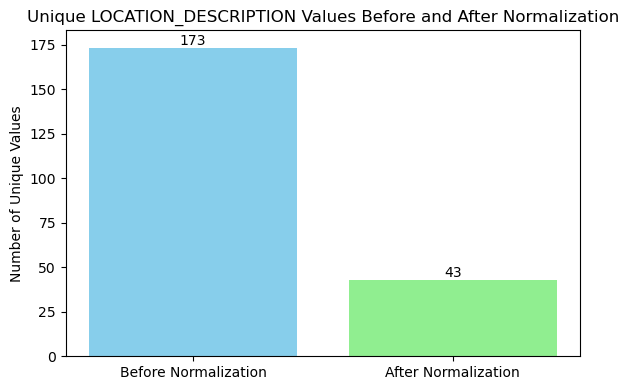

In [50]:
labels = ['Before Normalization', 'After Normalization']
counts = [before_loc_desc, after_loc_desc]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts, color=['skyblue', 'lightgreen'])
plt.title('Unique LOCATION_DESCRIPTION Values Before and After Normalization')
plt.ylabel('Number of Unique Values')
plt.ylim(0, max(counts) + 10)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Clean the data for `PRIMARY_TYPE`

In [52]:
#defining a function that normalized the values for primary type if any non-standardized values are left
def normalize_text(text):
    if pd.isna(text):
        return text
    text = text.upper()
    text = text.replace(' - ', '_')
    text = text.replace('-', '_')
    text = text.replace(' ', '_')
    text = text.replace('NON_CRIMINAL_(SUBJECT_SPECIFIED)', 'NON_CRIMINAL')

    return text.strip()

#using the function
before_primary_type = df['PRIMARY_TYPE'].nunique()
df['PRIMARY_TYPE'] = df['PRIMARY_TYPE'].apply(normalize_text)
after_primary_type = df['PRIMARY_TYPE'].nunique()

In [53]:
np.sort(df['PRIMARY_TYPE'].unique())

array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED_CARRY_LICENSE_VIOLATION', 'CRIMINAL_DAMAGE',
       'CRIMINAL_TRESPASS', 'CRIM_SEXUAL_ASSAULT', 'DECEPTIVE_PRACTICE',
       'DOMESTIC_VIOLENCE', 'GAMBLING', 'HOMICIDE', 'HUMAN_TRAFFICKING',
       'INTERFERENCE_WITH_PUBLIC_OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR_LAW_VIOLATION', 'MOTOR_VEHICLE_THEFT', 'NARCOTICS',
       'NON_CRIMINAL', 'OBSCENITY', 'OFFENSE_INVOLVING_CHILDREN',
       'OTHER_NARCOTIC_VIOLATION', 'OTHER_OFFENSE', 'PROSTITUTION',
       'PUBLIC_INDECENCY', 'PUBLIC_PEACE_VIOLATION', 'RITUALISM',
       'ROBBERY', 'SEX_OFFENSE', 'STALKING', 'THEFT', 'WEAPONS_VIOLATION'],
      dtype=object)

In [54]:
print("Before:", before_primary_type)
print("After:", after_primary_type)

Before: 35
After: 33


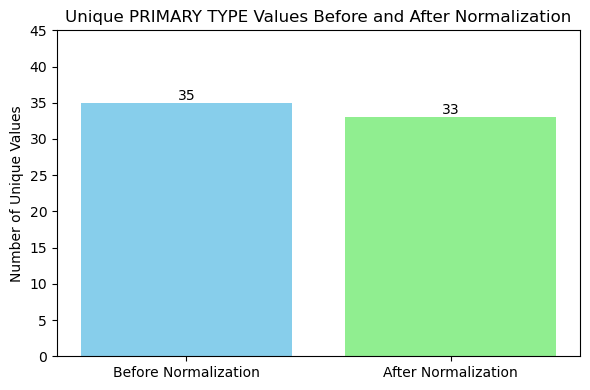

In [55]:
labels = ['Before Normalization', 'After Normalization']
counts = [before_primary_type, after_primary_type]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts, color=['skyblue', 'lightgreen'])
plt.title('Unique PRIMARY TYPE Values Before and After Normalization')
plt.ylabel('Number of Unique Values')
plt.ylim(0, max(counts) + 10)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Clean the data for `DESCRIPTION`

In [63]:
before_desc = df['DESCRIPTION'].nunique()
np.sort(df['DESCRIPTION'].unique())

array(['$300 AND UNDER', '$500 AND UNDER', 'ABUSE/NEGLECT: CARE FACILITY',
       'ADULTRY', 'AGG CRIM SEX ABUSE FAM MEMBER',
       'AGG CRIMINAL SEXUAL ABUSE', 'AGG PO HANDS ETC SERIOUS INJ',
       'AGG PO HANDS NO/MIN INJURY', 'AGG PRO EMP HANDS SERIOUS INJ',
       'AGG PRO.EMP: HANDGUN', 'AGG PRO.EMP: OTHER DANG WEAPON',
       'AGG PRO.EMP: OTHER FIREARM', 'AGG PRO.EMP:KNIFE/CUTTING INST',
       'AGG RIT MUT: HANDS/FIST/FEET NO/MINOR INJURY',
       'AGG RIT MUT: HANDS/FIST/FEET SERIOUS INJURY',
       'AGG RITUAL MUT:HANDGUN', 'AGG RITUAL MUT:KNIFE/CUTTING I',
       'AGG RITUAL MUT:OTH DANG WEAPON', 'AGG SEX ASSLT OF CHILD FAM MBR',
       'AGG: FINANCIAL ID THEFT', 'AGG: HANDS/FIST/FEET NO/MINOR INJURY',
       'AGG: HANDS/FIST/FEET SERIOUS INJURY', 'AGGRAVATED',
       'AGGRAVATED COMPUTER TAMPERING', 'AGGRAVATED DOMESTIC BATTERY',
       'AGGRAVATED DOMESTIC BATTERY: HANDGUN',
       'AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY',
       'AGGRAVATED DOMESTIC

In [64]:
crime_mapping = {
    # MANU/DELIVER related
    'MANU/DEL:CANNABIS 10GM OR LESS': 'MANU_DELIVER_CANNABIS',
    'MANU/DEL:CANNABIS OVER 10 GMS': 'MANU_DELIVER_CANNABIS',
    'MANU/DELIVER: HALLUCINOGEN': 'MANU_DELIVER_DRUGS',
    'MANU/DELIVER: HEROIN (WHITE)': 'MANU_DELIVER_HEROIN',
    'MANU/DELIVER: HEROIN(BRN/TAN)': 'MANU_DELIVER_HEROIN',
    'MANU/DELIVER: METHAMPHETAMINES': 'MANU_DELIVER_DRUGS',
    'MANU/DELIVER:AMPHETAMINES': 'MANU_DELIVER_DRUGS',
    'MANU/DELIVER:BARBITUATES': 'MANU_DELIVER_DRUGS',
    'MANU/DELIVER:COCAINE': 'MANU_DELIVER_COCAINE',
    'MANU/DELIVER:CRACK': 'MANU_DELIVER_CRACK',
    'MANU/DELIVER:HEROIN(BLACK TAR)': 'MANU_DELIVER_HEROIN',
    'MANU/DELIVER:LOOK-ALIKE DRUG': 'MANU_DELIVER_DRUGS',
    'MANU/DELIVER:PCP': 'MANU_DELIVER_DRUGS',
    'MANU/DELIVER:SYNTHETIC DRUGS': 'MANU_DELIVER_DRUGS',
    'MANU/POSS. W/INTENT TO DELIVER: SYNTHETIC MARIJUANA': 'MANU_DELIVER_SYNTHETIC_MARIJUANA',

    # Value-based categories
    '$300 AND UNDER': 'VALUE_300_OR_LESS',
    '$500 AND UNDER': 'VALUE_500_OR_LESS',
    'OVER $300': 'VALUE_OVER_300',
    'OVER $500': 'VALUE_OVER_500',

    # Abuse/Neglect
    'ABUSE/NEGLECT: CARE FACILITY': 'ABUSE_NEGLECT_CARE_FACILITY',
    'ANIMAL ABUSE/NEGLECT': 'ANIMAL_ABUSE_NEGLECT',
    'CHILD ABUSE': 'CHILD_ABUSE',

    # Aggravated crimes
    'AGG CRIM SEX ABUSE FAM MEMBER': 'AGG_CRIMINAL_SEXUAL_ABUSE_FAMILY',
    'AGG CRIMINAL SEXUAL ABUSE': 'AGG_CRIMINAL_SEXUAL_ABUSE',
    'AGG PO HANDS ETC SERIOUS INJ': 'AGG_BATTERY_SERIOUS_INJURY',
    'AGG PO HANDS NO/MIN INJURY': 'AGG_BATTERY_MINOR_INJURY',
    'AGG PRO EMP HANDS SERIOUS INJ': 'AGG_BATTERY_SERIOUS_INJURY',
    'AGG PRO.EMP: HANDGUN': 'AGG_ARMED_HANDGUN',
    'AGG PRO.EMP: OTHER DANG WEAPON': 'AGG_ARMED_OTHER_WEAPON',
    'AGG PRO.EMP: OTHER FIREARM': 'AGG_ARMED_FIREARM',
    'AGG PRO.EMP:KNIFE/CUTTING INST': 'AGG_ARMED_KNIFE',
    'AGG RIT MUT: HANDS/FIST/FEET NO/MINOR INJURY': 'AGG_BATTERY_MINOR_INJURY',
    'AGG RIT MUT: HANDS/FIST/FEET SERIOUS INJURY': 'AGG_BATTERY_SERIOUS_INJURY',
    'AGG RITUAL MUT:HANDGUN': 'AGG_ARMED_HANDGUN',
    'AGG RITUAL MUT:KNIFE/CUTTING I': 'AGG_ARMED_KNIFE',
    'AGG RITUAL MUT:OTH DANG WEAPON': 'AGG_ARMED_OTHER_WEAPON',
    'AGG SEX ASSLT OF CHILD FAM MBR': 'AGG_SEXUAL_ASSAULT_CHILD_FAMILY',
    'AGG: FINANCIAL ID THEFT': 'FINANCIAL_ID_THEFT',
    'AGG: HANDS/FIST/FEET NO/MINOR INJURY': 'AGG_BATTERY_MINOR_INJURY',
    'AGG: HANDS/FIST/FEET SERIOUS INJURY': 'AGG_BATTERY_SERIOUS_INJURY',
    'AGGRAVATED': 'AGGRAVATED_CRIME',
    'AGGRAVATED COMPUTER TAMPERING': 'AGG_COMPUTER_TAMPERING',
    'AGGRAVATED DOMESTIC BATTERY': 'AGG_DOMESTIC_BATTERY',
    'AGGRAVATED DOMESTIC BATTERY: HANDGUN': 'AGG_DOMESTIC_BATTERY_ARMED_HANDGUN',
    'AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY': 'AGG_DOMESTIC_BATTERY_SERIOUS_INJURY',
    'AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST': 'AGG_DOMESTIC_BATTERY_ARMED_KNIFE',
    'AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON': 'AGG_DOMESTIC_BATTERY_ARMED_OTHER_WEAPON',
    'AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM': 'AGG_DOMESTIC_BATTERY_ARMED_FIREARM',
    'AGGRAVATED FINANCIAL IDENTITY THEFT': 'FINANCIAL_ID_THEFT',
    'AGGRAVATED OF A CHILD': 'AGG_CRIME_AGAINST_CHILD',
    'AGGRAVATED OF A SENIOR CITIZEN': 'AGG_CRIME_AGAINST_SENIOR',
    'AGGRAVATED OF A UNBORN CHILD': 'AGG_CRIME_AGAINST_UNBORN',
    'AGGRAVATED PO: HANDGUN': 'AGG_ARMED_HANDGUN',
    'AGGRAVATED PO: KNIFE/CUT INSTR': 'AGG_ARMED_KNIFE',
    'AGGRAVATED PO: OTHER DANG WEAP': 'AGG_ARMED_OTHER_WEAPON',
    'AGGRAVATED PO: OTHER FIREARM': 'AGG_ARMED_FIREARM',
    'AGGRAVATED PO:KNIFE/CUT INSTR': 'AGG_ARMED_KNIFE',
    'AGGRAVATED VEHICULAR HIJACKING': 'AGG_VEHICULAR_HIJACKING',
    'AGGRAVATED: HANDGUN': 'AGG_ARMED_HANDGUN',
    'AGGRAVATED: KNIFE/CUT INSTR': 'AGG_ARMED_KNIFE',
    'AGGRAVATED: OTHER': 'AGG_CRIME',
    'AGGRAVATED: OTHER DANG WEAPON': 'AGG_ARMED_OTHER_WEAPON',
    'AGGRAVATED: OTHER FIREARM': 'AGG_ARMED_FIREARM',
    'AGGRAVATED:KNIFE/CUTTING INSTR': 'AGG_ARMED_KNIFE',

    # Attempt crimes
    'ATT AGG CRIM SEXUAL ABUSE': 'ATTEMPT_AGG_CRIMINAL_SEXUAL_ABUSE',
    'ATT AGG CRIMINAL SEXUAL ABUSE': 'ATTEMPT_AGG_CRIMINAL_SEXUAL_ABUSE',
    'ATT CRIM SEXUAL ABUSE': 'ATTEMPT_CRIMINAL_SEXUAL_ABUSE',
    'ATTEMPT - FINANCIAL IDENTITY THEFT': 'ATTEMPT_FINANCIAL_ID_THEFT',
    'ATTEMPT AGG: HANDGUN': 'ATTEMPT_AGG_ARMED_HANDGUN',
    'ATTEMPT AGG: KNIFE/CUT INSTR': 'ATTEMPT_AGG_ARMED_KNIFE',
    'ATTEMPT AGG: OTHER': 'ATTEMPT_AGG_CRIME',
    'ATTEMPT AGG: OTHER DANG WEAPON': 'ATTEMPT_AGG_ARMED_OTHER_WEAPON',
    'ATTEMPT AGG: OTHER FIREARM': 'ATTEMPT_AGG_ARMED_FIREARM',
    'ATTEMPT ARSON': 'ATTEMPT_ARSON',
    'ATTEMPT FINANCIAL IDENTITY THEFT': 'ATTEMPT_FINANCIAL_ID_THEFT',
    'ATTEMPT FORCIBLE ENTRY': 'ATTEMPT_FORCIBLE_ENTRY',
    'ATTEMPT NON-AGGRAVATED': 'ATTEMPT_CRIME',
    'ATTEMPT POSSESSION CANNABIS': 'ATTEMPT_POSSESSION_CANNABIS',
    'ATTEMPT POSSESSION NARCOTICS': 'ATTEMPT_POSSESSION_DRUGS',
    'ATTEMPT THEFT': 'ATTEMPT_THEFT',
    'ATTEMPT: AGGRAVATED': 'ATTEMPT_AGG_CRIME',
    'ATTEMPT: ARMED-HANDGUN': 'ATTEMPT_ARMED_HANDGUN',
    'ATTEMPT: ARMED-KNIFE/CUT INSTR': 'ATTEMPT_ARMED_KNIFE',
    'ATTEMPT: ARMED-OTHER DANG WEAP': 'ATTEMPT_ARMED_OTHER_WEAPON',
    'ATTEMPT: ARMED-OTHER FIREARM': 'ATTEMPT_ARMED_FIREARM',
    'ATTEMPT: CYCLE, SCOOTER, BIKE NO VIN': 'ATTEMPT_VEHICLE_THEFT',
    'ATTEMPT: CYCLE, SCOOTER, BIKE W-VIN': 'ATTEMPT_VEHICLE_THEFT',
    'ATTEMPT: STRONGARM-NO WEAPON': 'ATTEMPT_STRONGARM_ROBBERY',

    # Other categories (abbreviated for space)
    'ADULTRY': 'ADULTERY',
    'AIDING ARRESTEE ESCAPE': 'AIDING_ESCAPE',
    'ALTER COINS': 'COUNTERFEITING',
    'ALTER/FORGE PRESCRIPTION': 'FORGERY_PRESCRIPTION',
    'ANIMAL FIGHTING': 'ANIMAL_FIGHTING',
    'ARMED VIOLENCE': 'ARMED_VIOLENCE',
    'ARMED WHILE UNDER THE INFLUENCE': 'ARMED_UNDER_INFLUENCE',
    'ARMED: HANDGUN': 'ARMED_HANDGUN',
    'ARMED: OTHER DANGEROUS WEAPON': 'ARMED_OTHER_WEAPON',
    'ARMED: OTHER FIREARM': 'ARMED_FIREARM',
    'ARMED:KNIFE/CUTTING INSTRUMENT': 'ARMED_KNIFE',
    'ARSON THREAT': 'ARSON_THREAT',
    'ARSONIST: ANNUAL REGISTRATION': 'ARSONIST_REGISTRATION',
    'ARSONIST: DUTY TO REGISTER': 'ARSONIST_REGISTRATION',
    'ARSONIST: FAIL TO REGISTER NEW ADDRESS': 'ARSONIST_REGISTRATION',
    'ATT: AUTOMOBILE': 'AUTO_THEFT',
    'ATT: TRUCK, BUS, MOTOR HOME': 'VEHICLE_THEFT',
    'AUTOMOBILE': 'AUTO_THEFT',
    'BIGAMY': 'BIGAMY',
    'BOARD PLANE WITH WEAPON': 'WEAPON_PLANE',
    'BOGUS CHECK': 'BAD_CHECK',
    'BOLITA OR BOLI PUL/OFFICE': 'GAMBLING',
    'BOLITA OR BOLI PUL/RUNNER': 'GAMBLING',
    'BOLITA OR BOLI PUL/WRITER': 'GAMBLING',
    'BOMB THREAT': 'BOMB_THREAT',
    'BOOKMAKING/HORSES': 'GAMBLING',
    'BOOKMAKING/SPORTS': 'GAMBLING',
    'BRIBERY': 'BRIBERY',
    'BY EXPLOSIVE': 'EXPLOSIVE',
    'BY FIRE': 'ARSON',
    'CAB OPERATION': 'ILLEGAL_CAB',
    'CALCULATED CANNABIS CONSPIRACY': 'DRUG_CONSPIRACY',
    'CALL OPERATION': 'ILLEGAL_CALL',
    'CANNABIS PLANT': 'CANNABIS_CULTIVATION',
    'CHILD ABANDONMENT': 'CHILD_ABANDONMENT',
    'CHILD ABDUCTION': 'CHILD_ABDUCTION',
    'CHILD ABDUCTION/STRANGER': 'CHILD_ABDUCTION',
    'CHILD PORNOGRAPHY': 'CHILD_PORNOGRAPHY',
    'COMMERCIAL SEX ACTS': 'COMMERCIAL_SEX',
    'COMPELLING CONFESSION': 'COMPELLING_CONFESSION',
    'COMPELLING ORG MEMBERSHIP': 'COMPELLING_ORG_MEMBERSHIP',
    'COMPOUNDING A CRIME': 'COMPOUNDING_CRIME',
    'COMPUTER FRAUD': 'COMPUTER_FRAUD',
    'CONCEALED CARRY LICENSE REVOCATION': 'CONCEALED_CARRY_VIOLATION',
    'CONCEALING/AIDING A FUGITIVE': 'AIDING_FUGITIVE',
    'CONT SUBS:FAIL TO MAINT RECORD': 'DRUG_RECORD_VIOLATION',
    'CONTRABAND IN PRISON': 'PRISON_CONTRABAND',
    'CONTRIBUTE CRIM DELINQUENCY JUVENILE': 'CONTRIBUTING_DELINQUENCY',
    'CONTRIBUTE DELINQUENCY OF A CHILD': 'CONTRIBUTING_DELINQUENCY',
    'COUNTERFEIT CHECK': 'COUNTERFEITING',
    'COUNTERFEITING DOCUMENT': 'COUNTERFEITING',
    'CREDIT CARD FRAUD': 'CREDIT_CARD_FRAUD',
    'CRIM SEX ABUSE BY FAM MEMBER': 'CRIMINAL_SEXUAL_ABUSE_FAMILY',
    'CRIMINAL DEFACEMENT': 'CRIMINAL_DEFACEMENT',
    'CRIMINAL DRUG CONSPIRACY': 'DRUG_CONSPIRACY',
    'CRIMINAL SEXUAL ABUSE': 'CRIMINAL_SEXUAL_ABUSE',
    'CRIMINAL TRANSMISSION OF HIV': 'HIV_TRANSMISSION',
    'CYBERSTALKING': 'CYBERSTALKING',
    'CYCLE, SCOOTER, BIKE NO VIN': 'BIKE_THEFT',
    'CYCLE, SCOOTER, BIKE W-VIN': 'BIKE_THEFT',
    'DECEPTIVE COLLECTION PRACTICES': 'DECEPTIVE_PRACTICES',
    'DEFACE IDENT MARKS OF FIREARM': 'FIREARM_TAMPERING',
    'DEL CONT SUBS TO PERSON <18': 'DRUG_SALE_TO_MINOR',
    'DELIVER CANNABIS TO PERSON <18': 'DRUG_SALE_TO_MINOR',
    'DELIVERY CONTAINER THEFT': 'CONTAINER_THEFT',
    'DISCLOSE DV VICTIM LOCATION': 'DOMESTIC_VIOLENCE_VIOLATION',
    'DOMESTIC BATTERY SIMPLE': 'DOMESTIC_BATTERY',
    'DOMESTIC VIOLENCE': 'DOMESTIC_VIOLENCE',
    'EAVESDROPPING': 'EAVESDROPPING',
    'EDUCATIONAL INTIMIDAITON': 'EDUCATIONAL_INTIMIDATION',
    'EMBEZZLEMENT': 'EMBEZZLEMENT',
    'EMPLOY MINOR': 'ILLEGAL_MINOR_EMPLOYMENT',
    'ENDANGERING LIFE/HEALTH CHILD': 'CHILD_ENDANGERMENT',
    'ESCAPE': 'ESCAPE',
    'EXTORTION': 'EXTORTION',
    'FAIL REGISTER LIC:CONT SUBS': 'DRUG_LICENSE_VIOLATION',
    'FAILURE TO KEEP HYPO RECORDS': 'DRUG_RECORD_VIOLATION',
    'FALSE FIRE ALARM': 'FALSE_ALARM',
    'FALSE POLICE REPORT': 'FALSE_REPORT',
    'FALSE/STOLEN/ALTERED TRP': 'FORGERY',
    'FINAN EXPLOIT-ELDERLY/DISABLED': 'FINANCIAL_EXPLOITATION',
    'FINANCIAL ID THEFT: OVER $300': 'FINANCIAL_ID_THEFT',
    'FINANCIAL ID THEFT:$300 &UNDER': 'FINANCIAL_ID_THEFT',
    'FINANCIAL IDENTITY THEFT $300 AND UNDER': 'FINANCIAL_ID_THEFT',
    'FINANCIAL IDENTITY THEFT OVER $ 300': 'FINANCIAL_ID_THEFT',
    'FIREARM REGISTRATION VIOLATION': 'FIREARM_VIOLATION',
    'FIRST DEGREE MURDER': 'MURDER_1',
    'FOID - REVOCATION': 'FIREARM_VIOLATION',
    'FORCIBLE DETENTION': 'FORCIBLE_DETENTION',
    'FORCIBLE ENTRY': 'FORCIBLE_ENTRY',
    'FORFEIT PROPERTY': 'FORFEITURE',
    'FORGERY': 'FORGERY',
    'FORNICATION': 'FORNICATION',
    'FOUND PASSPORT': 'LOST_PROPERTY',
    'FOUND SUSPECT NARCOTICS': 'DRUG_POSSESSION',
    'FRAUD OR CONFIDENCE GAME': 'FRAUD',
    'FROM BUILDING': 'THEFT_FROM_BUILDING',
    'FROM COIN-OP MACHINE/DEVICE': 'THEFT_FROM_MACHINE',
    'GAME/AMUSEMENT DEVICE': 'GAMBLING',
    'GAME/CARDS': 'GAMBLING',
    'GAME/DICE': 'GAMBLING',
    'GUN OFFENDER NOTIFICATION-NO CONTACT': 'GUN_OFFENDER_VIOLATION',
    'GUN OFFENDER: ANNUAL REGISTRATION': 'GUN_OFFENDER_REGISTRATION',
    'GUN OFFENDER: DUTY TO REGISTER': 'GUN_OFFENDER_REGISTRATION',
    'GUN OFFENDER: DUTY TO REPORT CHANGE OF INFORMATION': 'GUN_OFFENDER_REGISTRATION',
    'HARASSMENT BY ELECTRONIC MEANS': 'HARASSMENT',
    'HARASSMENT BY TELEPHONE': 'HARASSMENT',
    'HARBOR RUNAWAY': 'HARBORING_RUNAWAY',
    'HAZARDOUS MATERIALS VIOLATION': 'HAZMAT_VIOLATION',
    'HOME INVASION': 'HOME_INVASION',
    'ILLEGAL CONSUMPTION BY MINOR': 'MINOR_ALCOHOL',
    'ILLEGAL ILL LOTTERY': 'ILLEGAL_LOTTERY',
    'ILLEGAL POSSESSION BY MINOR': 'MINOR_ALCOHOL',
    'ILLEGAL POSSESSION CASH CARD': 'ILLEGAL_POSSESSION',
    'ILLEGAL USE CASH CARD': 'ILLEGAL_USE',
    'IMPERSONATION': 'IMPERSONATION',
    'IN TAVERN': 'TAVERN_VIOLATION',
    'INDECENT SOLICITATION/ADULT': 'INDECENT_SOLICITATION',
    'INDECENT SOLICITATION/CHILD': 'INDECENT_SOLICITATION_CHILD',
    'INSTITUTIONAL VANDALISM': 'VANDALISM',
    'INSURANCE FRAUD': 'INSURANCE_FRAUD',
    'INTERFERE W/ EMERGENCY EQUIP': 'INTERFERENCE_EMERGENCY',
    'INTERFERE W/ HIGHER EDUCATION': 'INTERFERENCE_EDUCATION',
    'INTERFERENCE JUDICIAL PROCESS': 'INTERFERENCE_JUDICIAL',
    'INTIMIDATION': 'INTIMIDATION',
    'INTIMIDATION OF LAW ENFORCEMENT OFFICIAL': 'INTIMIDATION_OFFICER',
    'INTOXICATING COMPOUNDS': 'INTOXICATING_COMPOUNDS',
    'INVOLUNTARY MANSLAUGHTER': 'MANSLAUGHTER_INVOLUNTARY',
    'INVOLUNTARY SERVITUDE': 'INVOLUNTARY_SERVITUDE',
    'JUVENILE PIMPING': 'PIMPING',
    'KEEP PLACE OF JUV PROSTITUTION': 'PROSTITUTION',
    'KEEP PLACE OF PROSTITUTION': 'PROSTITUTION',
    'KIDNAPPING': 'KIDNAPPING',
    'LIBRARY THEFT': 'LIBRARY_THEFT',
    'LIBRARY VANDALISM': 'VANDALISM',
    'LICENSE VIOLATION': 'LICENSE_VIOLATION',
    'LICENSED PREMISE': 'LICENSE_VIOLATION',
    'LIQUOR LICENSE VIOLATION': 'LIQUOR_VIOLATION',
    'LOOTING': 'LOOTING',
    'LOST PASSPORT': 'LOST_PROPERTY',
    'LOTTERY/OTHER': 'LOTTERY',
    'LOTTERY/PARI-MUTUEL': 'LOTTERY',
    'LOTTERY/PARLAY CARDS': 'LOTTERY',
    'MARRYING A BIGAMIST': 'BIGAMY',
    'MINOR MISREPRESENT AGE': 'MINOR_MISREPRESENTATION',
    'MOB ACTION': 'MOB_ACTION',
    'MONEY LAUNDERING': 'MONEY_LAUNDERING',
    'NATIONAL LOTTERY': 'LOTTERY',
    'NON-AGGRAVATED': 'CRIME',
    'NOTIFICATION OF CIVIL NO CONTACT ORDER': 'NO_CONTACT_ORDER_VIOLATION',
    'NOTIFICATION OF STALKING - NO CONTACT ORDER': 'NO_CONTACT_ORDER_VIOLATION',
    'OBSCENE MATTER': 'OBSCENITY',
    'OBSCENE TELEPHONE CALLS': 'OBSCENE_CALLS',
    'OBSCENITY': 'OBSCENITY',
    'OBSTRUCTING IDENTIFICATION': 'OBSTRUCTION',
    'OBSTRUCTING JUSTICE': 'OBSTRUCTION_JUSTICE',
    'OBSTRUCTING SERVICE': 'OBSTRUCTION',
    'OF UNBORN CHILD': 'CRIME_AGAINST_UNBORN',
    'OFFICIAL MISCONDUCT': 'OFFICIAL_MISCONDUCT',
    'OTHER': 'OTHER_CRIME',
    'OTHER ARSON/EXPLOSIVE INCIDENT': 'ARSON',
    'OTHER CRIME AGAINST PERSON': 'CRIME_AGAINST_PERSON',
    'OTHER CRIME INVOLVING PROPERTY': 'CRIME_AGAINST_PROPERTY',
    'OTHER OFFENSE': 'OTHER_CRIME',
    'OTHER PROSTITUTION OFFENSE': 'PROSTITUTION',
    'OTHER VEHICLE OFFENSE': 'VEHICLE_OFFENSE',
    'OTHER VIOLATION': 'OTHER_CRIME',
    'OTHER WEAPONS VIOLATION': 'WEAPON_VIOLATION',
    'PANDERING': 'PANDERING',
    'PAROLE VIOLATION': 'PAROLE_VIOLATION',
    'PATRONIZE JUVENILE PROSTITUTE': 'PROSTITUTION',
    'PATRONIZING A PROSTITUTE': 'PROSTITUTION',
    'PAY TV SERVICE OFFENSES': 'CABLE_THEFT',
    'PEEPING TOM': 'PEEPING_TOM',
    'PIMPING': 'PIMPING',
    'POCKET-PICKING': 'PICKPOCKET',
    'POLICY/OTHER': 'INSURANCE_VIOLATION',
    'POS: CHEMICAL/DRY-ICE DEVICE': 'POSSESSION_DANGEROUS_DEVICE',
    'POS: EXPLOSIVE/INCENDIARY DEV': 'POSSESSION_EXPLOSIVE',
    'POS: HYPODERMIC NEEDLE': 'POSSESSION_DRUG_PARAPHERNALIA',
    'POS: PORNOGRAPHIC PRINT': 'POSSESSION_PORNOGRAPHY',
    'POSS FIREARM/AMMO:NO FOID CARD': 'FIREARM_VIOLATION',
    'POSS. KEYS OR DEV.TO COIN MACH': 'POSSESSION_BURGLARY_TOOLS',
    'POSS: AMPHETAMINES': 'POSSESSION_DRUGS',
    'POSS: BARBITUATES': 'POSSESSION_DRUGS',
    'POSS: CANNABIS 30GMS OR LESS': 'POSSESSION_CANNABIS',
    'POSS: CANNABIS MORE THAN 30GMS': 'POSSESSION_CANNABIS',
    'POSS: COCAINE': 'POSSESSION_COCAINE',
    'POSS: CRACK': 'POSSESSION_CRACK',
    'POSS: HALLUCINOGENS': 'POSSESSION_DRUGS',
    'POSS: HEROIN(BLACK TAR)': 'POSSESSION_HEROIN',
    'POSS: HEROIN(BRN/TAN)': 'POSSESSION_HEROIN',
    'POSS: HEROIN(WHITE)': 'POSSESSION_HEROIN',
    'POSS: LOOK-ALIKE DRUGS': 'POSSESSION_DRUGS',
    'POSS: METHAMPHETAMINES': 'POSSESSION_DRUGS',
    'POSS: PCP': 'POSSESSION_DRUGS',
    'POSS: SYNTHETIC DRUGS': 'POSSESSION_DRUGS',
    'POSSESSION OF BURGLARY TOOLS': 'POSSESSION_BURGLARY_TOOLS',
    'POSSESSION OF DRUG EQUIPMENT': 'POSSESSION_DRUG_PARAPHERNALIA',
    'POSSESSION: SYNTHETIC MARIJUANA': 'POSSESSION_SYNTHETIC_MARIJUANA',
    'PREDATORY': 'PREDATORY_CRIME',
    'PRO EMP HANDS NO/MIN INJURY': 'BATTERY',
    'PROBATION VIOLATION': 'PROBATION_VIOLATION',
    'PROHIBITED PLACES': 'PROHIBITED_PLACE',
    'PUBLIC DEMONSTRATION': 'PUBLIC_DEMONSTRATION',
    'PUBLIC INDECENCY': 'PUBLIC_INDECENCY',
    'PURSE-SNATCHING': 'PURSE_SNATCHING',
    'RECKLESS CONDUCT': 'RECKLESS_CONDUCT',
    'RECKLESS FIREARM DISCHARGE': 'RECKLESS_FIREARM_USE',
    'RECKLESS HOMICIDE': 'RECKLESS_HOMICIDE',
    'REFUSING TO AID AN OFFICER': 'REFUSING_AID_OFFICER',
    'REGISTER FED GAMBLING STAMP': 'GAMBLING_VIOLATION',
    'REGISTER OF SALES BY DEALER': 'SALES_VIOLATION',
    'RESIST/OBSTRUCT/DISARM OFFICER': 'RESISTING_OFFICER',
    'RETAIL THEFT': 'RETAIL_THEFT',
    'SALE TOBACCO PRODUCTS TO MINOR': 'TOBACCO_SALE_TO_MINOR',
    'SALE/DEL DRUG PARAPHERNALIA': 'DRUG_PARAPHERNALIA_SALE',
    'SALE/DEL HYPODERMIC NEEDLE': 'DRUG_PARAPHERNALIA_SALE',
    'SALE/DIST OBSCENE MAT TO MINOR': 'OBSCENITY_TO_MINOR',
    'SELL/ADVERTISE FIREWORKS': 'FIREWORKS_VIOLATION',
    'SELL/GIVE/DEL LIQUOR TO MINOR': 'LIQUOR_SALE_TO_MINOR',
    'SEX ASSLT OF CHILD BY FAM MBR': 'SEXUAL_ASSAULT_CHILD_FAMILY',
    'SEX OFFENDER: FAIL REG NEW ADD': 'SEX_OFFENDER_REGISTRATION',
    'SEX OFFENDER: FAIL TO REGISTER': 'SEX_OFFENDER_REGISTRATION',
    'SEX OFFENDER: PROHIBITED ZONE': 'SEX_OFFENDER_VIOLATION',
    'SEX RELATION IN FAMILY': 'INCEST',
    'SEXUAL EXPLOITATION OF A CHILD': 'CHILD_SEXUAL_EXPLOITATION',
    'SIMPLE': 'CRIME',
    'SOLICIT FOR BUSINESS': 'SOLICITATION',
    'SOLICIT FOR PROSTITUTE': 'PROSTITUTION',
    'SOLICIT NARCOTICS ON PUBLICWAY': 'DRUG_SOLICITATION',
    'SOLICIT OFF PUBLIC WAY': 'SOLICITATION',
    'SOLICIT ON PUBLIC WAY': 'SOLICITATION',
    'SPORTS TAMPERING': 'SPORTS_TAMPERING',
    'STOLEN PROP: BUY/RECEIVE/POS.': 'RECEIVING_STOLEN_PROPERTY',
    'STRONGARM - NO WEAPON': 'STRONGARM_ROBBERY',
    'TAMPER WITH MOTOR VEHICLE': 'VEHICLE_TAMPERING',
    'TELEPHONE THREAT': 'THREATS',
    'THEFT BY LESSEE,MOTOR VEH': 'VEHICLE_THEFT',
    'THEFT BY LESSEE,NON-VEH': 'THEFT',
    'THEFT OF LABOR/SERVICES': 'SERVICES_THEFT',
    'THEFT OF LOST/MISLAID PROP': 'THEFT',
    'THEFT RETAIL': 'RETAIL_THEFT',
    'THEFT/RECOVERY: AUTOMOBILE': 'AUTO_THEFT',
    'THEFT/RECOVERY: CYCLE, SCOOTER, BIKE NO VIN': 'BIKE_THEFT',
    'THEFT/RECOVERY: CYCLE, SCOOTER, BIKE W-VIN': 'BIKE_THEFT',
    'THEFT/RECOVERY: TRUCK,BUS,MHOME': 'VEHICLE_THEFT',
    'TO AIRPORT': 'PROPERTY_DAMAGE',
    'TO CITY OF CHICAGO PROPERTY': 'PROPERTY_DAMAGE',
    'TO FIRE FIGHT.APP.EQUIP': 'PROPERTY_DAMAGE',
    'TO LAND': 'PROPERTY_DAMAGE',
    'TO PROPERTY': 'PROPERTY_DAMAGE',
    'TO RESIDENCE': 'PROPERTY_DAMAGE',
    'TO STATE SUP LAND': 'PROPERTY_DAMAGE',
    'TO STATE SUP PROP': 'PROPERTY_DAMAGE',
    'TO VEHICLE': 'PROPERTY_DAMAGE',
    'TRUCK, BUS, MOTOR HOME': 'VEHICLE_THEFT',
    'UNAUTHORIZED VIDEOTAPING': 'UNAUTHORIZED_RECORDING',
    'UNIDENTIFIABLE RECORDING SOUND': 'ILLEGAL_RECORDING',
    'UNLAWFUL ENTRY': 'UNLAWFUL_ENTRY',
    'UNLAWFUL INTERFERE/VISITATION': 'VISITATION_INTERFERENCE',
    'UNLAWFUL POSS AMMUNITION': 'FIREARM_VIOLATION',
    'UNLAWFUL POSS OF HANDGUN': 'FIREARM_VIOLATION',
    'UNLAWFUL POSS OTHER FIREARM': 'FIREARM_VIOLATION',
    'UNLAWFUL RESTRAINT': 'UNLAWFUL_RESTRAINT',
    'UNLAWFUL SALE HANDGUN': 'FIREARM_VIOLATION',
    'UNLAWFUL SALE OTHER FIREARM': 'FIREARM_VIOLATION',
    'UNLAWFUL SALE/DELIVERY OF FIREARM AT SCHOOL': 'FIREARM_VIOLATION',
    'UNLAWFUL USE HANDGUN': 'FIREARM_VIOLATION',
    'UNLAWFUL USE OF A COMPUTER': 'COMPUTER_CRIME',
    'UNLAWFUL USE OF BODY ARMOR': 'BODY_ARMOR_VIOLATION',
    'UNLAWFUL USE OF RECORDED SOUND': 'ILLEGAL_RECORDING',
    'UNLAWFUL USE OTHER DANG WEAPON': 'WEAPON_VIOLATION',
    'UNLAWFUL USE OTHER FIREARM': 'FIREARM_VIOLATION',
    'UNLAWFUL USE/SALE AIR RIFLE': 'FIREARM_VIOLATION',
    'USE OF METAL PIERCING BULLETS': 'FIREARM_VIOLATION',
    'VEHICLE TITLE/REG OFFENSE': 'VEHICLE_REGISTRATION_VIOLATION',
    'VEHICULAR HIJACKING': 'VEHICULAR_HIJACKING',
    'VIO BAIL BOND: DOM VIOLENCE': 'DOMESTIC_VIOLENCE_VIOLATION',
    'VIOL CHARITABLE GAME ACT': 'GAMING_VIOLATION',
    'VIOLATE ORDER OF PROTECTION': 'PROTECTION_ORDER_VIOLATION',
    'VIOLATION GPS MONITORING DEVICE': 'GPS_VIOLATION',
    'VIOLATION OF CIVIL NO CONTACT ORDER': 'NO_CONTACT_ORDER_VIOLATION',
    'VIOLATION OF SMOKING BAN': 'SMOKING_VIOLATION',
    'VIOLATION OF STALKING NO CONTACT ORDER': 'NO_CONTACT_ORDER_VIOLATION',
    'VIOLATION OF SUMMARY CLOSURE': 'CLOSURE_VIOLATION',
    'VIOLENT OFFENDER: ANNUAL REGISTRATION': 'VIOLENT_OFFENDER_REGISTRATION',
    'VIOLENT OFFENDER: DUTY TO REGISTER': 'VIOLENT_OFFENDER_REGISTRATION',
    'VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS': 'VIOLENT_OFFENDER_REGISTRATION',
    'WIREROOM/HORSES': 'GAMBLING',
    'WIREROOM/SPORTS': 'GAMBLING'
}

# Generalise DESCRIPTION by mapping each value to a new value and retain original results if value not in mapping
df["DESCRIPTION"] = df['DESCRIPTION'].map(crime_mapping).fillna(df['DESCRIPTION'])

In [65]:
after_desc = df['DESCRIPTION'].nunique()
np.sort(df['DESCRIPTION'].unique())

array(['ABUSE_NEGLECT_CARE_FACILITY', 'ADULTERY', 'AGGRAVATED_CRIME',
       'AGG_ARMED_FIREARM', 'AGG_ARMED_HANDGUN', 'AGG_ARMED_KNIFE',
       'AGG_ARMED_OTHER_WEAPON', 'AGG_BATTERY_MINOR_INJURY',
       'AGG_BATTERY_SERIOUS_INJURY', 'AGG_COMPUTER_TAMPERING',
       'AGG_CRIME', 'AGG_CRIME_AGAINST_CHILD', 'AGG_CRIME_AGAINST_SENIOR',
       'AGG_CRIME_AGAINST_UNBORN', 'AGG_CRIMINAL_SEXUAL_ABUSE',
       'AGG_CRIMINAL_SEXUAL_ABUSE_FAMILY', 'AGG_DOMESTIC_BATTERY',
       'AGG_DOMESTIC_BATTERY_ARMED_FIREARM',
       'AGG_DOMESTIC_BATTERY_ARMED_HANDGUN',
       'AGG_DOMESTIC_BATTERY_ARMED_KNIFE',
       'AGG_DOMESTIC_BATTERY_ARMED_OTHER_WEAPON',
       'AGG_DOMESTIC_BATTERY_SERIOUS_INJURY',
       'AGG_SEXUAL_ASSAULT_CHILD_FAMILY', 'AGG_VEHICULAR_HIJACKING',
       'AIDING_ESCAPE', 'AIDING_FUGITIVE', 'ANIMAL_ABUSE_NEGLECT',
       'ANIMAL_FIGHTING', 'ARMED_FIREARM', 'ARMED_HANDGUN', 'ARMED_KNIFE',
       'ARMED_OTHER_WEAPON', 'ARMED_UNDER_INFLUENCE', 'ARMED_VIOLENCE',
       'ARSON', 'ARS

In [66]:
print("Before:", before_desc)
print("After:", after_desc)

Before: 379
After: 248


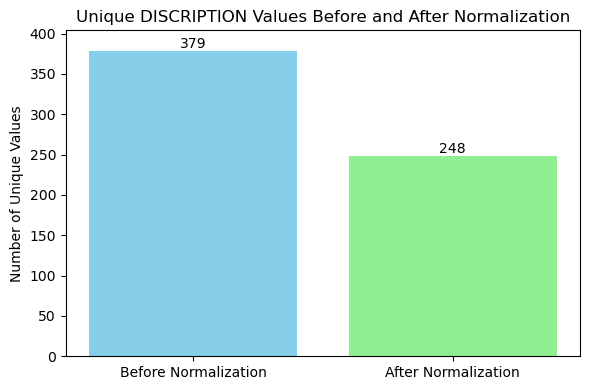

In [67]:
labels = ['Before Normalization', 'After Normalization']
counts = [before_desc, after_desc]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts, color=['skyblue', 'lightgreen'])
plt.title('Unique DISCRIPTION Values Before and After Normalization')
plt.ylabel('Number of Unique Values')
plt.ylim(0, max(counts) + 25)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [68]:
df.dtypes

ID                               int64
CASE_NUMBER                     object
DATE                    datetime64[ns]
BLOCK                           object
IUCR                            object
PRIMARY_TYPE                    object
DESCRIPTION                     object
LOCATION_DESCRIPTION            object
ARREST                            bool
DOMESTIC                          bool
BEAT                             int64
DISTRICT                       float64
WARD                           float64
COMMUNITY_AREA                 float64
FBI_CODE                        object
YEAR                             int64
UPDATED_ON              datetime64[ns]
LATITUDE                       float64
LONGITUDE                      float64
LOCATION                        object
dtype: object

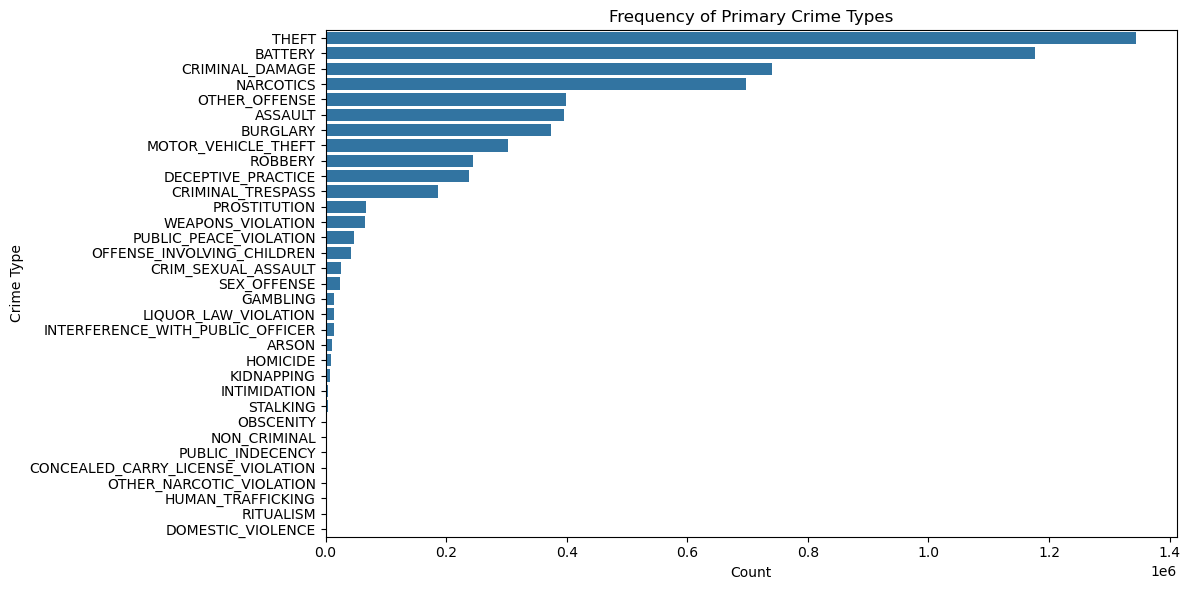

In [69]:
plt.figure(figsize=(12, 6))
sbn.countplot(y='PRIMARY_TYPE', data=df, order=df['PRIMARY_TYPE'].value_counts().index)
plt.title('Frequency of Primary Crime Types')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()

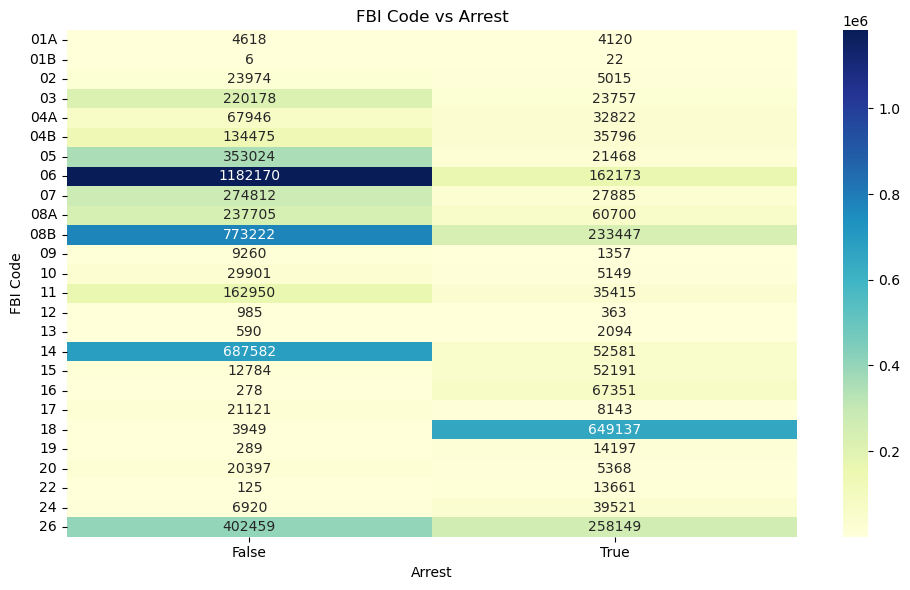

In [70]:
fbi_arrest = pd.crosstab(df['FBI_CODE'], df['ARREST'])
plt.figure(figsize=(10, 6))
sbn.heatmap(fbi_arrest, annot=True, fmt='d', cmap='YlGnBu')
plt.title('FBI Code vs Arrest')
plt.xlabel('Arrest')
plt.ylabel('FBI Code')
plt.tight_layout()
plt.show()

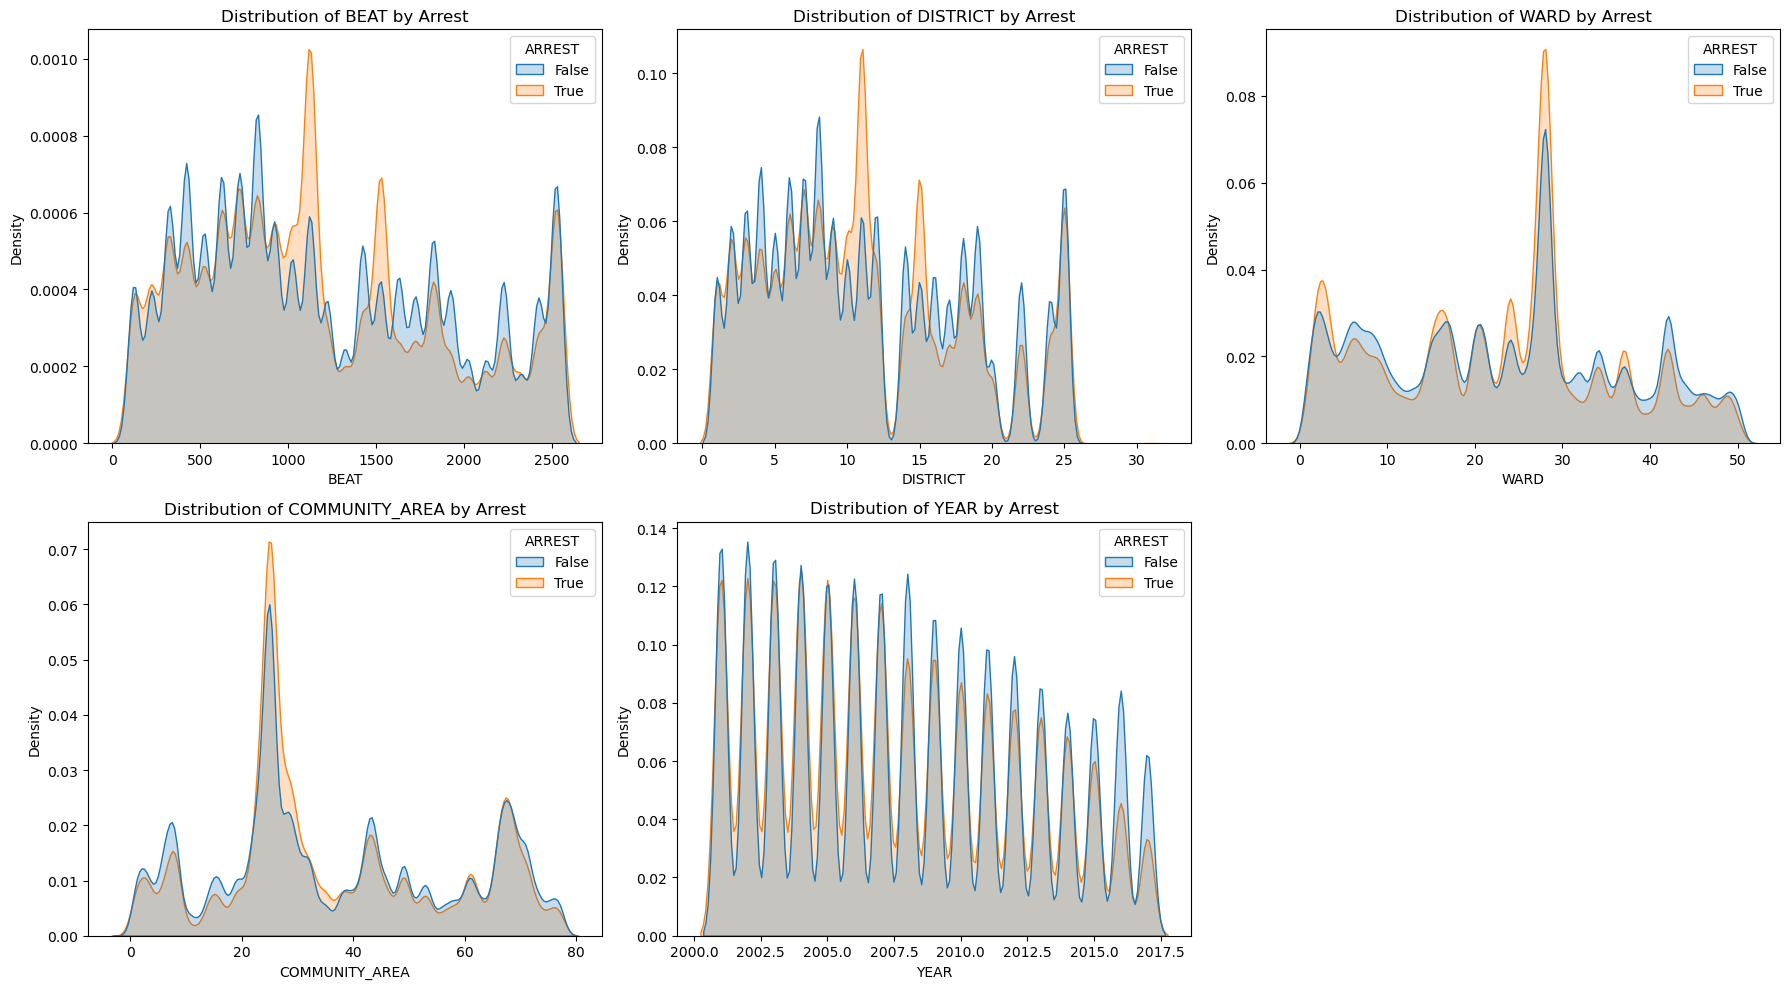

In [71]:
# List of numeric features to plot
features = ['BEAT', 'DISTRICT', 'WARD', 'COMMUNITY_AREA', 'YEAR']
target = 'ARREST'

# Create subplots grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Plot KDE for each feature
for i, col in enumerate(features):
    sbn.kdeplot(data=df, x=col, hue=target, ax=axes[i], fill=True, common_norm=False)
    axes[i].set_title(f'Distribution of {col} by Arrest')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Turn off any unused subplot (if features < grid size)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

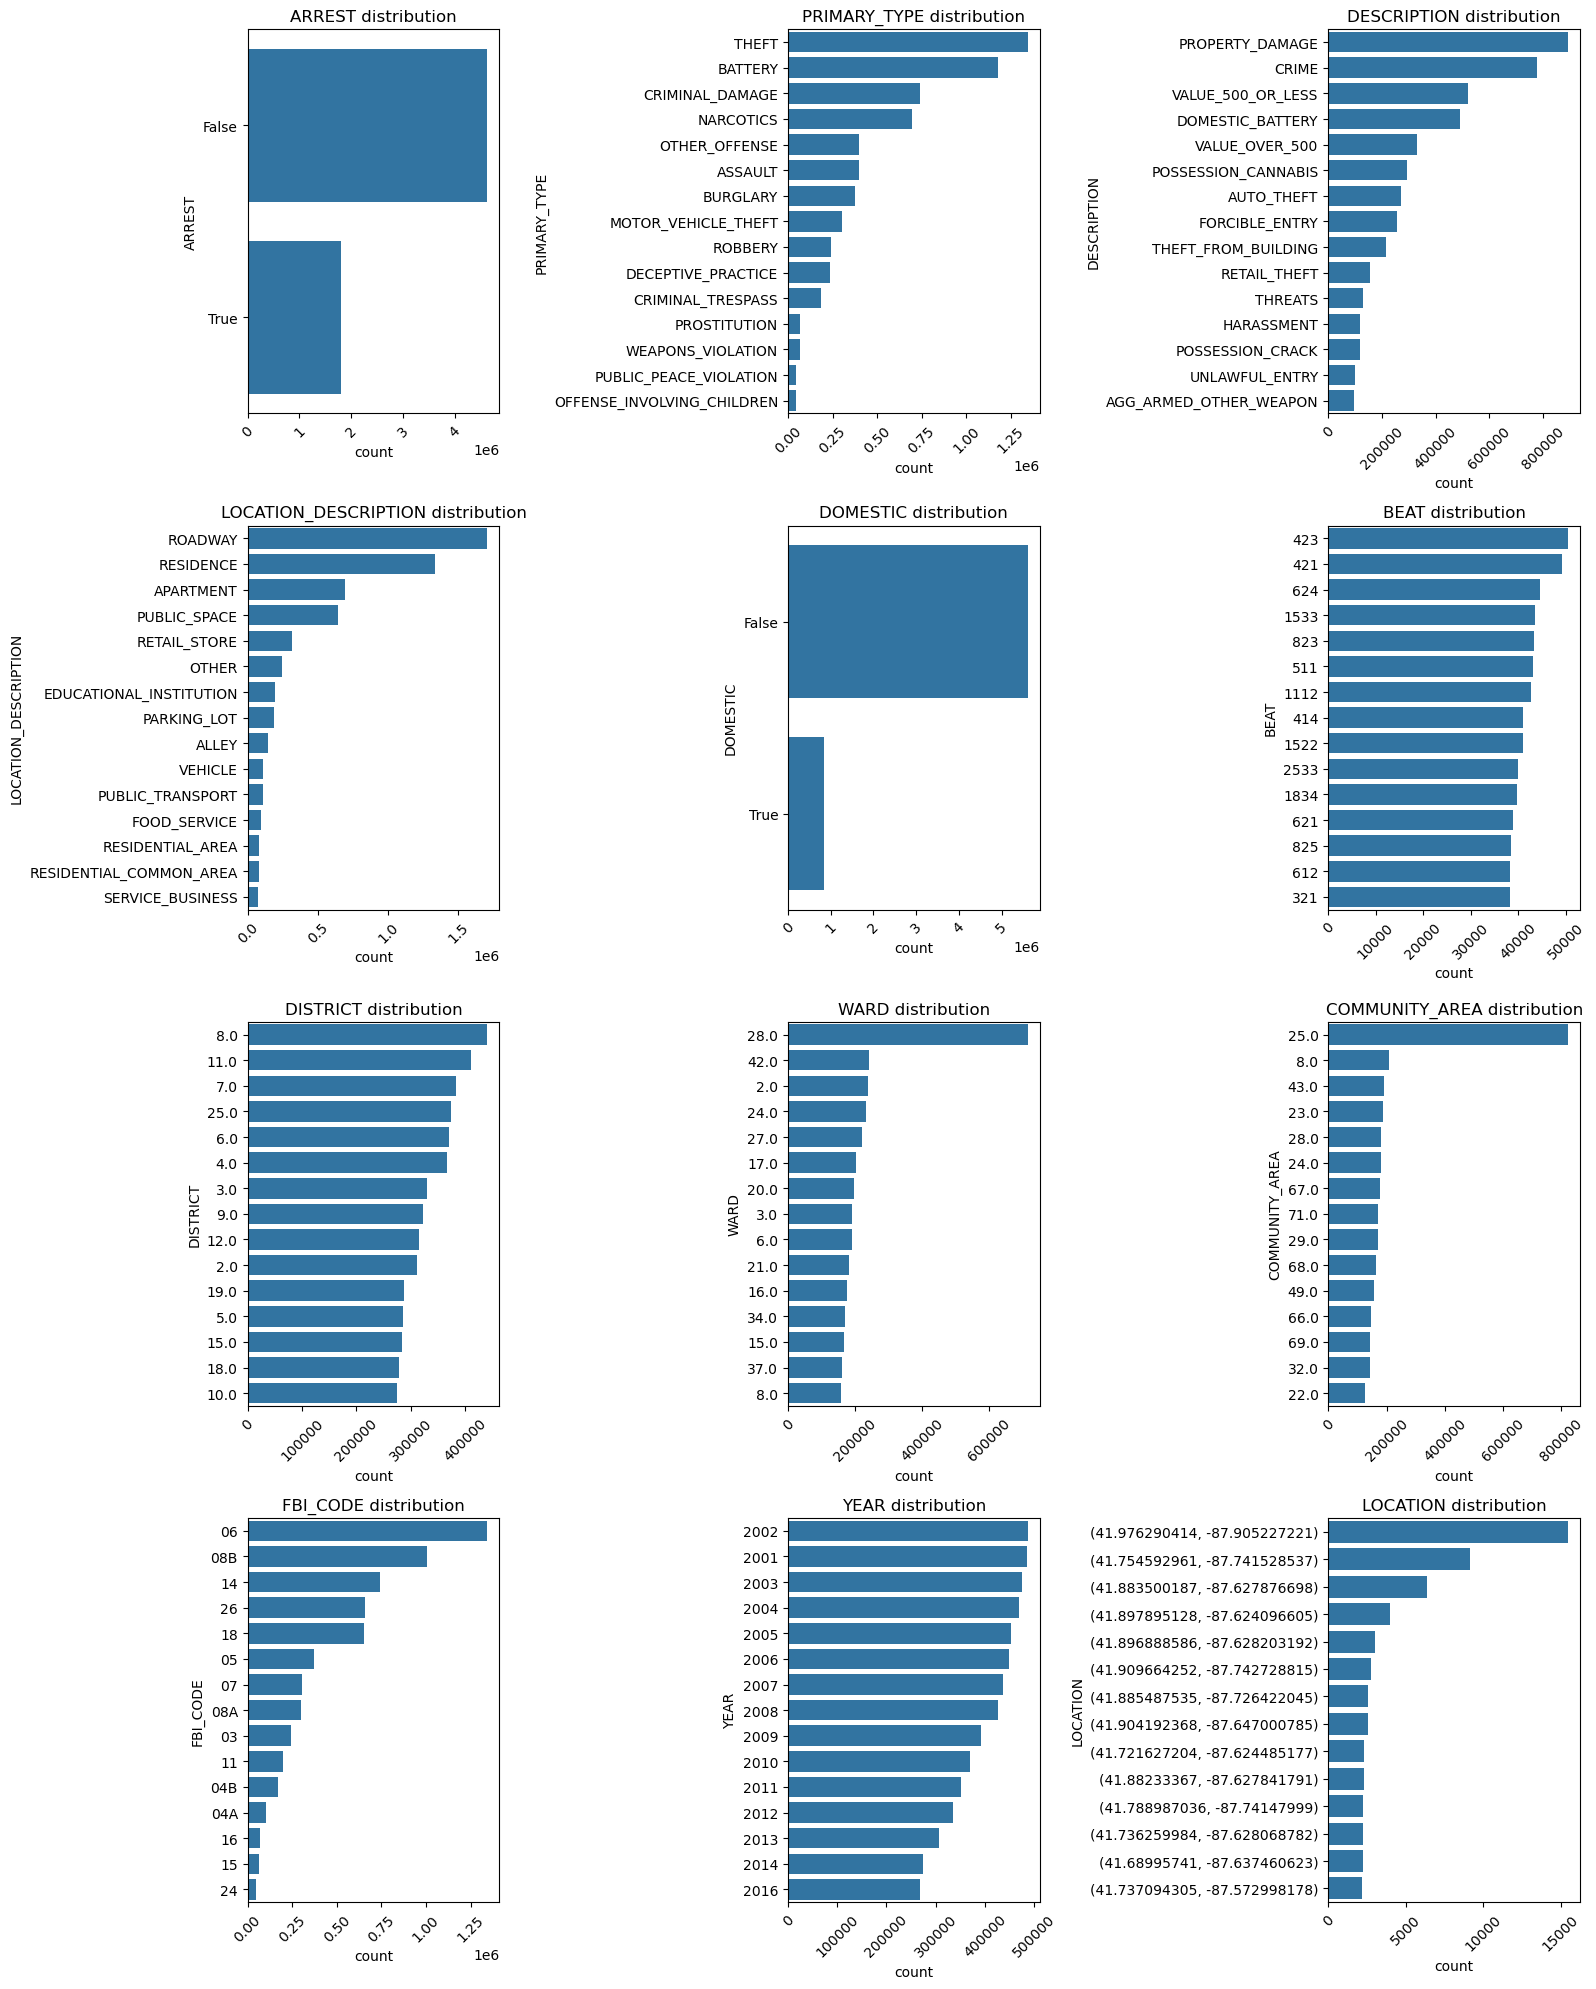

In [72]:
# Understanding categorical distributions
columns = ['ARREST', 'PRIMARY_TYPE', 'DESCRIPTION', 'LOCATION_DESCRIPTION', 'DOMESTIC', 'BEAT', 'DISTRICT', 'WARD', 'COMMUNITY_AREA', 'FBI_CODE', 'YEAR', 'LOCATION']

n_cols = 3  # 3 columns
n_rows = int(np.ceil(len(columns) / n_cols))  # Ensure all features fit in grid

# Create subplots with dynamic sizing
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
ax = ax.flatten()  # Conver to a 1D array for easier indexing

for i, col in enumerate(columns):
    # Extract the top 15 most frequent values in the column
    top15 = df[col].value_counts().head(15).index
    
    # Filter dataset to include only these top 15 values
    df_top15 = df[df[col].isin(top15)]
    
    # Create a count plot using Seaborn
    sbn.countplot(y=col, data=df_top15, order=top15, ax=ax[i])

    # Label the subplot
    ax[i].set_title(f'{col} distribution')
    ax[i].set_xlabel = 'count'
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()  # Adjust subplot spacing for better visualization
plt.show()  # Display the plots

# 4.0 Feature Engineering

Remove columns with cardinality > 30%

In [77]:
# Check cardinality for all columns
for column in df.columns:
    unique_count = df[column].nunique()
    total_count = len(df[column])
    cardinality = unique_count / total_count
    print(f"Column: {column}")
    print(f"Unique values: {unique_count}")
    print(f"Total values: {total_count}")
    print(f"Cardinality ratio: {cardinality:.2%}")
    print("----------")

Column: ID
Unique values: 6443602
Total values: 6443602
Cardinality ratio: 100.00%
----------
Column: CASE_NUMBER
Unique values: 6443229
Total values: 6443602
Cardinality ratio: 99.99%
----------
Column: DATE
Unique values: 2563210
Total values: 6443602
Cardinality ratio: 39.78%
----------
Column: BLOCK
Unique values: 58972
Total values: 6443602
Cardinality ratio: 0.92%
----------
Column: IUCR
Unique values: 401
Total values: 6443602
Cardinality ratio: 0.01%
----------
Column: PRIMARY_TYPE
Unique values: 33
Total values: 6443602
Cardinality ratio: 0.00%
----------
Column: DESCRIPTION
Unique values: 248
Total values: 6443602
Cardinality ratio: 0.00%
----------
Column: LOCATION_DESCRIPTION
Unique values: 43
Total values: 6443602
Cardinality ratio: 0.00%
----------
Column: ARREST
Unique values: 2
Total values: 6443602
Cardinality ratio: 0.00%
----------
Column: DOMESTIC
Unique values: 2
Total values: 6443602
Cardinality ratio: 0.00%
----------
Column: BEAT
Unique values: 304
Total values:

In [78]:
# drop columns with cardinality ratio above 30%
df.drop(columns=['ID', 'CASE_NUMBER', 'DATE', 'LOCATION'], inplace=True)

In [79]:
df.head()  # display first 5 rows

,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA,FBI_CODE,YEAR,UPDATED_ON,LATITUDE,LONGITUDE
0,029XX S STATE ST,2024,NARCOTICS,POSSESSION_HEROIN,RESIDENTIAL_COMMON_AREA,True,False,2113,1.0,3.0,35.0,18,2004,2016-04-15 08:55:02,41.841350,-87.626861
1,111XX S STATE ST,1330,CRIMINAL_TRESPASS,PROPERTY_DAMAGE,SERVICE_BUSINESS,True,False,522,5.0,34.0,49.0,26,2005,2016-04-15 08:55:02,41.692359,-87.623097
2,104XX S WALLACE ST,1320,CRIMINAL_DAMAGE,PROPERTY_DAMAGE,PARKING_LOT,False,False,2233,22.0,34.0,49.0,14,2005,2016-04-15 08:55:02,41.704371,-87.637902
3,037XX W ALTGELD ST,0486,BATTERY,DOMESTIC_BATTERY,APARTMENT,False,True,2524,25.0,35.0,22.0,08B,2005,2016-04-15 08:55:02,41.926378,-87.719964
4,002XX S ALBANY AVE,2024,NARCOTICS,POSSESSION_HEROIN,PUBLIC_SPACE,True,False,1124,11.0,28.0,27.0,18,2004,2016-04-15 08:55:02,41.877933,-87.703580


Temporal feature extraction

In [81]:
# Add temporal features
df['UPDATED_YEAR'] = df['UPDATED_ON'].dt.year
df['UPDATED_MONTH'] = df['UPDATED_ON'].dt.month
df['UPDATED_DAYOFWEEK'] = df['UPDATED_ON'].dt.dayofweek
df['UPDATED_HOUR'] = df['UPDATED_ON'].dt.hour
df['UPDATED_ISWEEKEND'] = df['UPDATED_DAYOFWEEK'].apply(lambda x: 1 if x >= 5 else 0)
df['UPDATED_WEEKOFYEAR'] = df['UPDATED_ON'].dt.isocalendar().week
df['UPDATED_SEASON'] = df['UPDATED_MONTH'].apply(lambda x: (
    1 if x in [12,1,2] else  # Winter
    2 if x in [3,4,5] else  # Spring
    3 if x in [6,7,8] else  # Summer
    4  # Fall
))
df.drop(columns=['UPDATED_ON'], inplace=True)

In [82]:
df.head()  # Display the first 5 rows

,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA,FBI_CODE,YEAR,LATITUDE,LONGITUDE,UPDATED_YEAR,UPDATED_MONTH,UPDATED_DAYOFWEEK,UPDATED_HOUR,UPDATED_ISWEEKEND,UPDATED_WEEKOFYEAR,UPDATED_SEASON
0,029XX S STATE ST,2024,NARCOTICS,POSSESSION_HEROIN,RESIDENTIAL_COMMON_AREA,True,False,2113,1.0,3.0,35.0,18,2004,41.841350,-87.626861,2016,4,4,8,0,15,2
1,111XX S STATE ST,1330,CRIMINAL_TRESPASS,PROPERTY_DAMAGE,SERVICE_BUSINESS,True,False,522,5.0,34.0,49.0,26,2005,41.692359,-87.623097,2016,4,4,8,0,15,2
2,104XX S WALLACE ST,1320,CRIMINAL_DAMAGE,PROPERTY_DAMAGE,PARKING_LOT,False,False,2233,22.0,34.0,49.0,14,2005,41.704371,-87.637902,2016,4,4,8,0,15,2
3,037XX W ALTGELD ST,0486,BATTERY,DOMESTIC_BATTERY,APARTMENT,False,True,2524,25.0,35.0,22.0,08B,2005,41.926378,-87.719964,2016,4,4,8,0,15,2
4,002XX S ALBANY AVE,2024,NARCOTICS,POSSESSION_HEROIN,PUBLIC_SPACE,True,False,1124,11.0,28.0,27.0,18,2004,41.877933,-87.703580,2016,4,4,8,0,15,2


Label encode categorical features

In [84]:
# Convert all categorical values into numeric values by encoding the categories
cat_features = ['BLOCK', 'PRIMARY_TYPE', 'DESCRIPTION', 'LOCATION_DESCRIPTION', 'IUCR', 'FBI_CODE']
le = LabelEncoder()

for col in cat_features:
    df[col] = le.fit_transform(df[col])

In [85]:
df.dtypes  # to make sure the columns data types are not object

BLOCK                     int32
IUCR                      int32
PRIMARY_TYPE              int32
DESCRIPTION               int32
LOCATION_DESCRIPTION      int32
ARREST                     bool
DOMESTIC                   bool
BEAT                      int64
DISTRICT                float64
WARD                    float64
COMMUNITY_AREA          float64
FBI_CODE                  int32
YEAR                      int64
LATITUDE                float64
LONGITUDE               float64
UPDATED_YEAR              int32
UPDATED_MONTH             int32
UPDATED_DAYOFWEEK         int32
UPDATED_HOUR              int32
UPDATED_ISWEEKEND         int64
UPDATED_WEEKOFYEAR       UInt32
UPDATED_SEASON            int64
dtype: object

Use Chi Square test to find the top features with the highest association with `ARREST`

In [87]:
target_col = df['ARREST']  # our target feature
features = df.drop(columns=['ARREST', 'LATITUDE', 'LONGITUDE'])  # drop ARREST, LATITUDE and LONGITUDE columns

best_features = SelectKBest(score_func=chi2, k=10)  # selecting the best 10 features using chi square test
fit = best_features.fit(features, target_col)  # fitting the model
scores = pd.DataFrame(fit.scores_)  # getting the scores
columns = pd.DataFrame(features.columns)  # getting the columns

In [88]:
# fit scores and columns in a dataframe
featureScores = pd.concat([columns, scores], axis=1)  # concatenating the columns and scores
featureScores.columns = ['Feature', 'Score']  # setting the column names
featureScores = featureScores[featureScores["Feature"] != "ARREST"]  # filtering out the "quality" column
featureScores.sort_values(by='Score', ascending=False, inplace=True)  # sorting the features by score
featureScores.reset_index(drop=True, inplace=True)  # resetting the index
featureScores  # displaying the features and their scores

,Feature,Score
0,BLOCK,1.184911e+08
1,IUCR,5.216180e+07
2,FBI_CODE,3.470886e+06
3,DESCRIPTION,6.590206e+05
4,BEAT,6.432871e+05
5,PRIMARY_TYPE,7.540357e+04
6,LOCATION_DESCRIPTION,6.958530e+04
7,DOMESTIC,2.810875e+04
8,WARD,1.196338e+04
9,DISTRICT,6.775703e+03


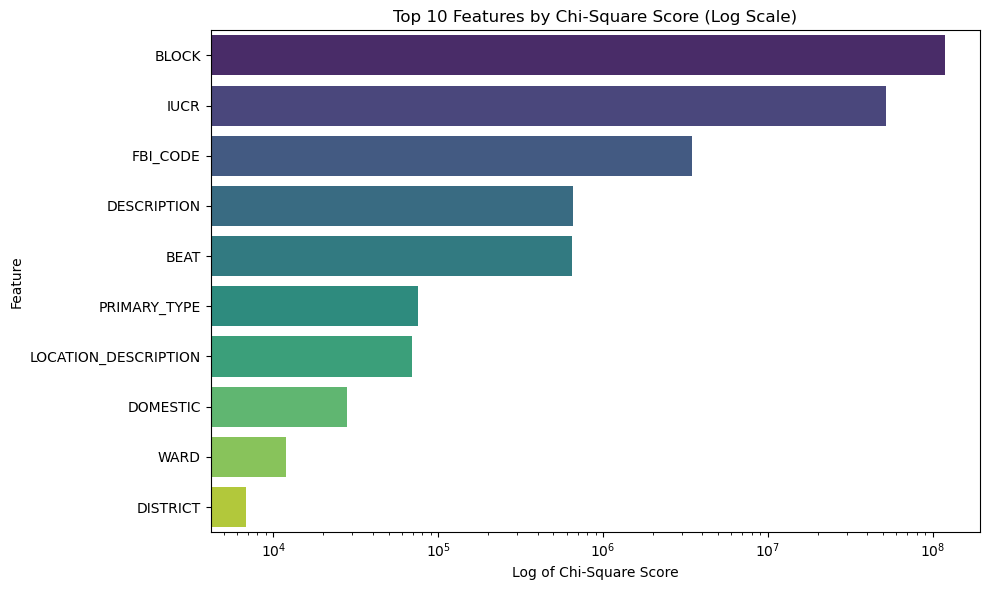

In [89]:
plt.figure(figsize=(10, 6))
sbn.barplot(
    data=featureScores.head(10),
    x='Score',
    y='Feature',
    hue='Feature',
    palette='viridis',
    dodge=False,
    legend=False
)

plt.xscale('log')  #log scale to x-axis
plt.title('Top 10 Features by Chi-Square Score (Log Scale)')
plt.xlabel('Log of Chi-Square Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [90]:
#defining feature set
feature_sets = {
    '10_features': ['BLOCK', 'IUCR', 'FBI_CODE', 'DESCRIPTION', 'BEAT',
                    'PRIMARY_TYPE', 'LOCATION_DESCRIPTION', 'DOMESTIC', 'WARD', 'DISTRICT'],
    '8_features': ['BLOCK', 'IUCR', 'FBI_CODE', 'DESCRIPTION', 'BEAT',
                   'PRIMARY_TYPE', 'LOCATION_DESCRIPTION', 'DOMESTIC'],
    '6_features': ['BLOCK', 'IUCR', 'FBI_CODE', 'DESCRIPTION', 'BEAT',
                   'PRIMARY_TYPE'],
    '2_features': ['BLOCK', 'IUCR']
}

# 5.0 Testing Models

## 5.1 K-Nearest Neighbors (KNN)

### 5.1.1 Split train test sets (60% - 40%)

#### 5.1.1.1 Features Selected = 10

**finding best k value**

In [138]:
#selecting the features
feature_label = '10_features'
selected_features = feature_sets[feature_label]

#defining neighbors and train-test split
neighbors_list = [1, 3, 5, 7, 9]
train_size = 0.6
test_size = 0.4

features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target
)

#scaling the training values to standard normal by calculating z-values
#allows model to make better predictions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#list to store accuracy
k_accuracy = []

#loop through k-values
for k in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    k_accuracy.append((k, acc))

#sort out the accuracy
k_accuracy.sort(key=lambda x: x[1], reverse=True)
best_k, best_acc = k_accuracy[0]

#print sorted accuracies
print("K-values and their accuracies (sorted):")
for k, acc in k_accuracy:
    print(f"k = {k}: Accuracy = {acc:.6f}")


#store the k-value with the best accuracy
bestK_feat10_60_40 = best_k

K-values and their accuracies (sorted):
k = 9: Accuracy = 0.878802
k = 7: Accuracy = 0.876911
k = 5: Accuracy = 0.872256
k = 3: Accuracy = 0.862108
k = 1: Accuracy = 0.830367


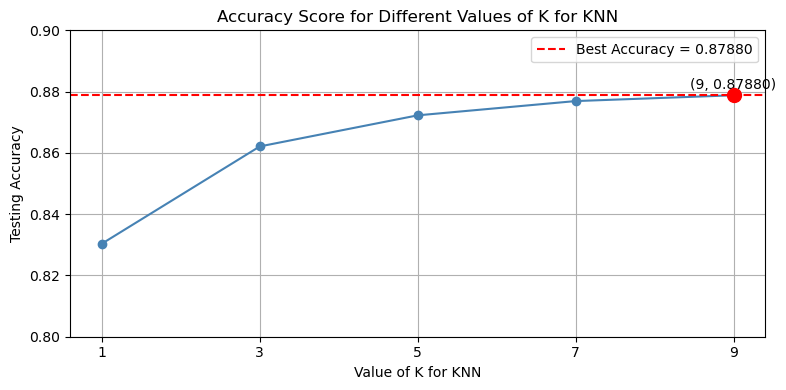

In [163]:
#data
k_vals = [k for k, _ in k_accuracy]
accuracies = [acc for _, acc in k_accuracy]

#best values
best_k, best_acc = max(k_accuracy, key=lambda x: x[1])

#plot
plt.figure(figsize=(8, 4))
plt.plot(k_vals, accuracies, marker='o', linestyle='-', color='steelblue')
plt.axhline(best_acc, color='red', linestyle='--', label=f'Best Accuracy = {best_acc:.5f}')
plt.scatter(best_k, best_acc, color='red', s=100, zorder=5)  # Red dot
plt.text(best_k, best_acc + 0.002, f'({best_k}, {best_acc:.5f})', color='black', ha='center')

#labels and titles
plt.title('Accuracy Score for Different Values of K for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks(k_vals)
plt.ylim(0.8, 0.9)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [165]:
print(f"Best k for {feature_label}: {best_k} with accuracy {best_acc:.4f}")

Best k for 10_features: 9 with accuracy 0.8788


**Evaluating KNN with Best k**

In [127]:
#run the KNN model with best K as the number of neighbors
knn_final = KNeighborsClassifier(n_neighbors=bestK_feat10_60_40)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

#get the required metrics
cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

#store data in a df for later use
KNN_feat10_60_40 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_k': bestK_feat10_60_40,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])

#output
print("\nFinal Evaluation Metrics for Feature Set:", feature_label)
print(KNN_feat10_60_40.drop(columns=['Confusion_Matrix']))

print("\nConfusion Matrix:")
print(cm_final)


Final Evaluation Metrics for Feature Set: 10_features
   Feature_Set  Train_Size  Test_Size  Best_k  Accuracy  Weighted_Precision  \
0  10_features         0.6        0.4       9  0.878802             0.87767   

   Weighted_Recall  Weighted_F1  
0         0.878802     0.873827  

Confusion Matrix:
[[1776030   76658]
 [ 235723  489030]]


#### 5.1.1.2 Features Selected = 8

**Finding best k value**

In [167]:
#selecting the features
feature_label = '8_features'
selected_features = feature_sets[feature_label]

#defining neighbors and train-test split
neighbors_list = [1, 3, 5, 7, 9]
train_size = 0.6
test_size = 0.4

features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target
)

#scaling the training values to standard normal by calculating z-values
#allows model to make better predictions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#list to store accuracy
k_accuracy = []

#loop through k-values
for k in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    k_accuracy.append((k, acc))

#sort out the accuracy
k_accuracy.sort(key=lambda x: x[1], reverse=True)
best_k, best_acc = k_accuracy[0]

#print sorted accuracies
print("K-values and their accuracies (sorted):")
for k, acc in k_accuracy:
    print(f"k = {k}: Accuracy = {acc:.6f}")

#store the k-value with the best accuracy
bestK_feat8_60_40 = best_k

K-values and their accuracies (sorted):
k = 9: Accuracy = 0.879448
k = 7: Accuracy = 0.877247
k = 5: Accuracy = 0.873010
k = 3: Accuracy = 0.862623
k = 1: Accuracy = 0.831631


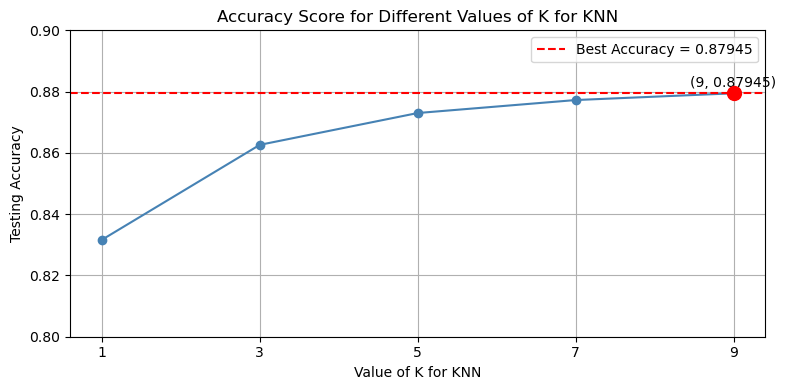

In [169]:
#data
k_vals = [k for k, _ in k_accuracy]
accuracies = [acc for _, acc in k_accuracy]

#best values
best_k, best_acc = max(k_accuracy, key=lambda x: x[1])

#plot
plt.figure(figsize=(8, 4))
plt.plot(k_vals, accuracies, marker='o', linestyle='-', color='steelblue')
plt.axhline(best_acc, color='red', linestyle='--', label=f'Best Accuracy = {best_acc:.5f}')
plt.scatter(best_k, best_acc, color='red', s=100, zorder=5)  # Red dot
plt.text(best_k, best_acc + 0.002, f'({best_k}, {best_acc:.5f})', color='black', ha='center')

#labels and titles
plt.title('Accuracy Score for Different Values of K for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks(k_vals)
plt.ylim(0.8, 0.9)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [172]:
print(f"Best k for {feature_label}: {best_k} with accuracy {best_acc:.4f}")

Best k for 8_features: 9 with accuracy 0.8794


**Evaluating KNN with Best k**

In [133]:
#run the KNN model with best K as the number of neighbors
knn_final = KNeighborsClassifier(n_neighbors=bestK_feat8_60_40)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

#get the required metrics
cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

#store data in a df for later use
KNN_feat8_60_40 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_k': bestK_feat10_60_40,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])

#output
print("\nFinal Evaluation Metrics for Feature Set:", feature_label)
print(KNN_feat8_60_40.drop(columns=['Confusion_Matrix']))

print("\nConfusion Matrix:")
print(cm_final)


Final Evaluation Metrics for Feature Set: 8_features
  Feature_Set  Train_Size  Test_Size  Best_k  Accuracy  Weighted_Precision  \
0  8_features         0.6        0.4       9  0.879448            0.878323   

   Weighted_Recall  Weighted_F1  
0         0.879448     0.874548  

Confusion Matrix:
[[1776208   76480]
 [ 234236  490517]]


#### 5.1.1.3 Features Selected = 6

**Finding best k value**

In [177]:
#selecting the features
feature_label = '6_features'
selected_features = feature_sets[feature_label]

#defining neighbors and train-test split
neighbors_list = [1, 3, 5, 7, 9]
train_size = 0.6
test_size = 0.4

features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target
)

#scaling the training values to standard normal by calculating z-values
#allows model to make better predictions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#list to store accuracy
k_accuracy = []

#loop through k-values
for k in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    k_accuracy.append((k, acc))


#sort out the accuracy
k_accuracy.sort(key=lambda x: x[1], reverse=True)
best_k, best_acc = k_accuracy[0]

#print sorted accuracies
print("K-values and their accuracies (sorted):")
for k, acc in k_accuracy:
    print(f"k = {k}: Accuracy = {acc:.6f}")

#store the k-value with the best accuracy
bestK_feat6_60_40 = best_k

K-values and their accuracies (sorted):
k = 9: Accuracy = 0.878432
k = 7: Accuracy = 0.876031
k = 5: Accuracy = 0.871594
k = 3: Accuracy = 0.860641
k = 1: Accuracy = 0.827244


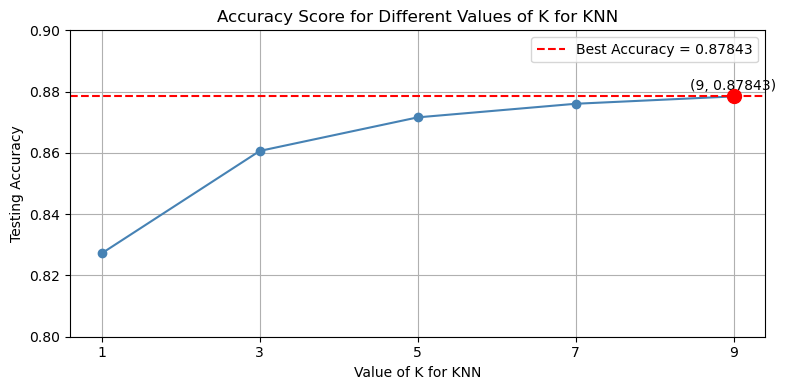

In [179]:
#data
k_vals = [k for k, _ in k_accuracy]
accuracies = [acc for _, acc in k_accuracy]

#best values
best_k, best_acc = max(k_accuracy, key=lambda x: x[1])

#plot
plt.figure(figsize=(8, 4))
plt.plot(k_vals, accuracies, marker='o', linestyle='-', color='steelblue')
plt.axhline(best_acc, color='red', linestyle='--', label=f'Best Accuracy = {best_acc:.5f}')
plt.scatter(best_k, best_acc, color='red', s=100, zorder=5)  # Red dot
plt.text(best_k, best_acc + 0.002, f'({best_k}, {best_acc:.5f})', color='black', ha='center')

#labels and titles
plt.title('Accuracy Score for Different Values of K for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks(k_vals)
plt.ylim(0.8, 0.9)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [181]:
print(f"Best k for {feature_label}: {best_k} with accuracy {best_acc:.4f}")

Best k for 6_features: 9 with accuracy 0.8784


**Evaluating KNN with Best k**

In [146]:
#run the KNN model with best K as the number of neighbors
knn_final = KNeighborsClassifier(n_neighbors=bestK_feat6_60_40)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

#get the required metrics
cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

#store data in a df for later use
KNN_feat6_60_40 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_k': bestK_feat10_60_40,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])

#output
print("\nFinal Evaluation Metrics for Feature Set:", feature_label)
print(KNN_feat6_60_40.drop(columns=['Confusion_Matrix']))

print("\nConfusion Matrix:")
print(cm_final)


Final Evaluation Metrics for Feature Set: 6_features
  Feature_Set  Train_Size  Test_Size  Best_k  Accuracy  Weighted_Precision  \
0  6_features         0.6        0.4       9  0.878432            0.877319   

   Weighted_Recall  Weighted_F1  
0         0.878432     0.873393  

Confusion Matrix:
[[1776187   76501]
 [ 236834  487919]]


#### 5.1.1.4 Features Selected = 2

**Finding best k value**

In [183]:
#selecting the features
feature_label = '2_features'
selected_features = feature_sets[feature_label]

#defining neighbors and train-test split
neighbors_list = [1, 3, 5, 7, 9]
train_size = 0.6
test_size = 0.4

features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target
)

#scaling the training values to standard normal by calculating z-values
#allows model to make better predictions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#list to store accuracy
k_accuracy = []

#loop through k-values
for k in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    k_accuracy.append((k, acc))

#sort out the accuracy
k_accuracy.sort(key=lambda x: x[1], reverse=True)
best_k, best_acc = k_accuracy[0]

#print sorted accuracies
print("K-values and their accuracies (sorted):")
for k, acc in k_accuracy:
    print(f"k = {k}: Accuracy = {acc:.6f}")

#store the k-value with the best accuracy
bestK_feat2_60_40 = best_k

K-values and their accuracies (sorted):
k = 9: Accuracy = 0.878013
k = 7: Accuracy = 0.875631
k = 5: Accuracy = 0.870974
k = 3: Accuracy = 0.860367
k = 1: Accuracy = 0.826039


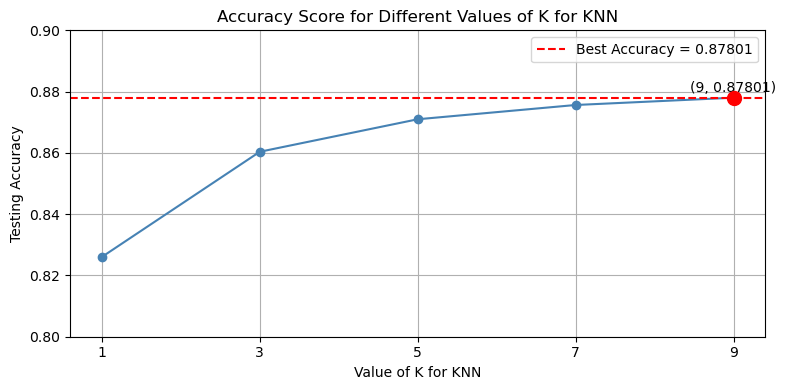

In [187]:
#data
k_vals = [k for k, _ in k_accuracy]
accuracies = [acc for _, acc in k_accuracy]

#best values
best_k, best_acc = max(k_accuracy, key=lambda x: x[1])

#plot
plt.figure(figsize=(8, 4))
plt.plot(k_vals, accuracies, marker='o', linestyle='-', color='steelblue')
plt.axhline(best_acc, color='red', linestyle='--', label=f'Best Accuracy = {best_acc:.5f}')
plt.scatter(best_k, best_acc, color='red', s=100, zorder=5)  # Red dot
plt.text(best_k, best_acc + 0.002, f'({best_k}, {best_acc:.5f})', color='black', ha='center')

#labels and titles
plt.title('Accuracy Score for Different Values of K for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks(k_vals)
plt.ylim(0.8, 0.9)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [189]:
print(f"Best k for {feature_label}: {best_k} with accuracy {best_acc:.4f}")

Best k for 2_features: 9 with accuracy 0.8780


**Evaluating KNN with Best k**

In [154]:
#run the KNN model with best K as the number of neighbors
knn_final = KNeighborsClassifier(n_neighbors=bestK_feat2_60_40)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

#get the required metrics
cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

#store data in a df for later use
KNN_feat2_60_40 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_k': bestK_feat10_60_40,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])

#output
print("\nFinal Evaluation Metrics for Feature Set:", feature_label)
print(KNN_feat2_60_40.drop(columns=['Confusion_Matrix']))

print("\nConfusion Matrix:")
print(cm_final)


Final Evaluation Metrics for Feature Set: 2_features
  Feature_Set  Train_Size  Test_Size  Best_k  Accuracy  Weighted_Precision  \
0  2_features         0.6        0.4       9  0.878013            0.876958   

   Weighted_Recall  Weighted_F1  
0         0.878013     0.872873  

Confusion Matrix:
[[1776751   75937]
 [ 238477  486276]]


### 5.1.2 Split train test sets (80% - 20%)

#### 5.1.2.1 Features Selected = 10

**Finding the best k value**

In [193]:
#selecting the features
feature_label = '10_features'
selected_features = feature_sets[feature_label]

#defining neighbors and train-test split
neighbors_list = [1, 3, 5, 7, 9]
train_size = 0.8
test_size = 0.2

features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target
)

#scaling the training values to standard normal by calculating z-values
#allows model to make better predictions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#list to store accuracy
k_accuracy = []

#loop through k-values
for k in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    k_accuracy.append((k, acc))

#sort out the accuracy
k_accuracy.sort(key=lambda x: x[1], reverse=True)
best_k, best_acc = k_accuracy[0]

#print sorted accuracies
print("K-values and their accuracies (sorted):")
for k, acc in k_accuracy:
    print(f"k = {k}: Accuracy = {acc:.6f}")

#store the k-value with the best accuracy
bestK_feat10_80_20 = best_k

K-values and their accuracies (sorted):
k = 9: Accuracy = 0.879009
k = 7: Accuracy = 0.876949
k = 5: Accuracy = 0.872990
k = 3: Accuracy = 0.863215
k = 1: Accuracy = 0.831345


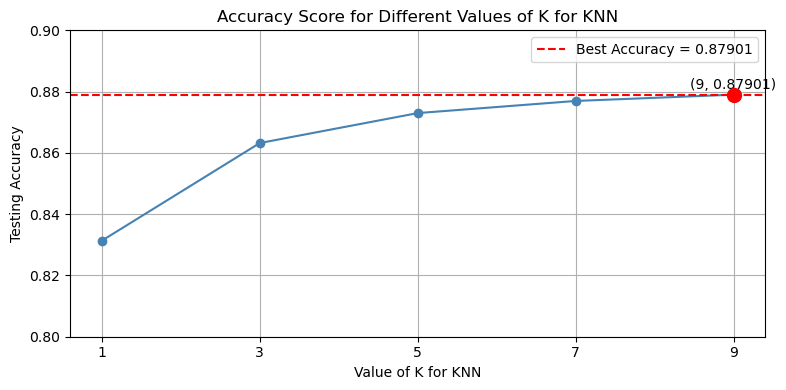

In [195]:
#data
k_vals = [k for k, _ in k_accuracy]
accuracies = [acc for _, acc in k_accuracy]

#best values
best_k, best_acc = max(k_accuracy, key=lambda x: x[1])

#plot
plt.figure(figsize=(8, 4))
plt.plot(k_vals, accuracies, marker='o', linestyle='-', color='steelblue')
plt.axhline(best_acc, color='red', linestyle='--', label=f'Best Accuracy = {best_acc:.5f}')
plt.scatter(best_k, best_acc, color='red', s=100, zorder=5)  # Red dot
plt.text(best_k, best_acc + 0.002, f'({best_k}, {best_acc:.5f})', color='black', ha='center')

#labels and titles
plt.title('Accuracy Score for Different Values of K for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks(k_vals)
plt.ylim(0.8, 0.9)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [197]:
print(f"Best k for {feature_label}: {best_k} with accuracy {best_acc:.4f}")

Best k for 10_features: 9 with accuracy 0.8790


**Evaluating KNN with Best k**

In [166]:
#run the KNN model with best K as the number of neighbors
knn_final = KNeighborsClassifier(n_neighbors=bestK_feat10_80_20)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

#get the required metrics
cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

#store data in a df for later use
KNN_feat10_80_20 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_k': bestK_feat10_60_40,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])

#output
print("\nFinal Evaluation Metrics for Feature Set:", feature_label)
print(KNN_feat10_80_20.drop(columns=['Confusion_Matrix']))

print("\nConfusion Matrix:")
print(cm_final)


Final Evaluation Metrics for Feature Set: 10_features
   Feature_Set  Train_Size  Test_Size  Best_k  Accuracy  Weighted_Precision  \
0  10_features         0.8        0.2       9  0.879009            0.877805   

   Weighted_Recall  Weighted_F1  
0         0.879009     0.874122  

Confusion Matrix:
[[887618  38726]
 [117198 245179]]


#### 5.1.2.2 Features Selected = 8

**Finding the best k value**

In [214]:
#selecting the features
feature_label = '8_features'
selected_features = feature_sets[feature_label]

#defining neighbors and train-test split
neighbors_list = [1, 3, 5, 7, 9]
train_size = 0.8
test_size = 0.2

features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target
)

#scaling the training values to standard normal by calculating z-values
#allows model to make better predictions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#list to store accuracy
k_accuracy = []

#loop through k-values
for k in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    k_accuracy.append((k, acc))

#sort out the accuracy
k_accuracy.sort(key=lambda x: x[1], reverse=True)
best_k, best_acc = k_accuracy[0]

#print sorted accuracies
print("K-values and their accuracies (sorted):")
for k, acc in k_accuracy:
    print(f"k = {k}: Accuracy = {acc:.6f}")

#store the k-value with the best accuracy
bestK_feat8_80_20 = best_k

K-values and their accuracies (sorted):
k = 9: Accuracy = 0.879667
k = 7: Accuracy = 0.877280
k = 5: Accuracy = 0.873284
k = 3: Accuracy = 0.863460
k = 1: Accuracy = 0.831396


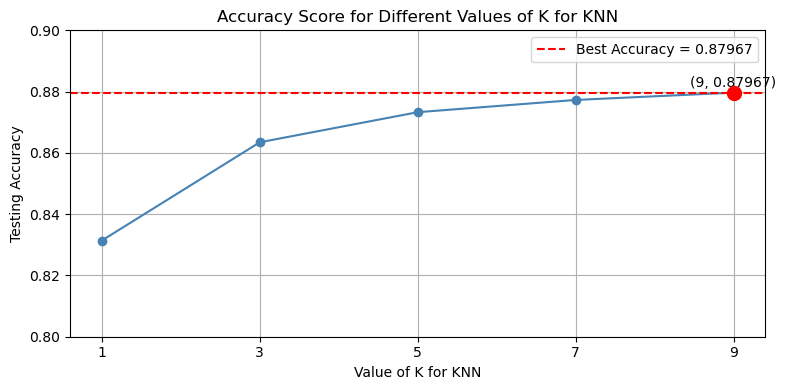

In [221]:
#data
k_vals = [k for k, _ in k_accuracy]
accuracies = [acc for _, acc in k_accuracy]

#best values
best_k, best_acc = max(k_accuracy, key=lambda x: x[1])

#plot
plt.figure(figsize=(8, 4))
plt.plot(k_vals, accuracies, marker='o', linestyle='-', color='steelblue')
plt.axhline(best_acc, color='red', linestyle='--', label=f'Best Accuracy = {best_acc:.5f}')
plt.scatter(best_k, best_acc, color='red', s=100, zorder=5)  # Red dot
plt.text(best_k, best_acc + 0.002, f'({best_k}, {best_acc:.5f})', color='black', ha='center')

#labels and titles
plt.title('Accuracy Score for Different Values of K for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks(k_vals)
plt.ylim(0.8, 0.9)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [223]:
print(f"Best k for {feature_label}: {best_k} with accuracy {best_acc:.4f}")

Best k for 8_features: 9 with accuracy 0.8797


**Evaluating KNN with Best k**

In [182]:
#run the KNN model with best K as the number of neighbors
knn_final = KNeighborsClassifier(n_neighbors=bestK_feat8_80_20)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

#get the required metrics
cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

#store data in a df for later use
KNN_feat8_80_20 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_k': bestK_feat10_60_40,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])

#output
print("\nFinal Evaluation Metrics for Feature Set:", feature_label)
print(KNN_feat8_80_20.drop(columns=['Confusion_Matrix']))

print("\nConfusion Matrix:")
print(cm_final)


Final Evaluation Metrics for Feature Set: 8_features
  Feature_Set  Train_Size  Test_Size  Best_k  Accuracy  Weighted_Precision  \
0  8_features         0.8        0.2       9  0.879667            0.878476   

   Weighted_Recall  Weighted_F1  
0         0.879667     0.874852  

Confusion Matrix:
[[887737  38607]
 [116469 245908]]


#### 5.1.2.3 Features Selected = 6

**Finding the best k value**

In [225]:
#selecting the features
feature_label = '6_features'
selected_features = feature_sets[feature_label]

#defining neighbors and train-test split
neighbors_list = [1, 3, 5, 7, 9]
train_size = 0.8
test_size = 0.2

features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target
)

#scaling the training values to standard normal by calculating z-values
#allows model to make better predictions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#list to store accuracy
k_accuracy = []

#loop through k-values
for k in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    k_accuracy.append((k, acc))

#sort out the accuracy
k_accuracy.sort(key=lambda x: x[1], reverse=True)
best_k, best_acc = k_accuracy[0]

#print sorted accuracies
print("K-values and their accuracies (sorted):")
for k, acc in k_accuracy:
    print(f"k = {k}: Accuracy = {acc:.6f}")

#store the k-value with the best accuracy
bestK_feat6_80_20 = best_k

K-values and their accuracies (sorted):
k = 9: Accuracy = 0.878924
k = 7: Accuracy = 0.876578
k = 5: Accuracy = 0.872034
k = 3: Accuracy = 0.862280
k = 1: Accuracy = 0.828345


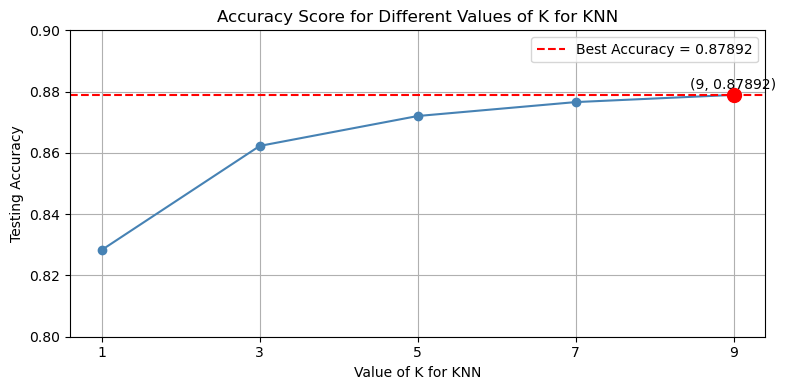

In [227]:
#data
k_vals = [k for k, _ in k_accuracy]
accuracies = [acc for _, acc in k_accuracy]

#best values
best_k, best_acc = max(k_accuracy, key=lambda x: x[1])

#plot
plt.figure(figsize=(8, 4))
plt.plot(k_vals, accuracies, marker='o', linestyle='-', color='steelblue')
plt.axhline(best_acc, color='red', linestyle='--', label=f'Best Accuracy = {best_acc:.5f}')
plt.scatter(best_k, best_acc, color='red', s=100, zorder=5)  # Red dot
plt.text(best_k, best_acc + 0.002, f'({best_k}, {best_acc:.5f})', color='black', ha='center')

#labels and titles
plt.title('Accuracy Score for Different Values of K for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks(k_vals)
plt.ylim(0.8, 0.9)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [229]:
print(f"Best k for {feature_label}: {best_k} with accuracy {best_acc:.4f}")

Best k for 6_features: 9 with accuracy 0.8789


**Evaluating KNN with Best k**

In [186]:
#run the KNN model with best K as the number of neighbors
knn_final = KNeighborsClassifier(n_neighbors=bestK_feat6_80_20)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

#get the required metrics
cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

#store data in a df for later use
KNN_feat6_80_20 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_k': bestK_feat10_60_40,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])

#output
print("\nFinal Evaluation Metrics for Feature Set:", feature_label)
print(KNN_feat6_80_20.drop(columns=['Confusion_Matrix']))

print("\nConfusion Matrix:")
print(cm_final)


Final Evaluation Metrics for Feature Set: 6_features
  Feature_Set  Train_Size  Test_Size  Best_k  Accuracy  Weighted_Precision  \
0  6_features         0.8        0.2       9  0.878924            0.877884   

   Weighted_Recall  Weighted_F1  
0         0.878924     0.873887  

Confusion Matrix:
[[888535  37809]
 [118224 244153]]


#### 5.1.2.4 Features Selected = 2

**Finding the best k value**

In [231]:
#selecting the features
feature_label = '2_features'
selected_features = feature_sets[feature_label]

#defining neighbors and train-test split
neighbors_list = [1, 3, 5, 7, 9]
train_size = 0.8
test_size = 0.2

features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target
)

#scaling the training values to standard normal by calculating z-values
#allows model to make better predictions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#list to store accuracy
k_accuracy = []

#loop through k-values
for k in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    k_accuracy.append((k, acc))

#sort out the accuracy
k_accuracy.sort(key=lambda x: x[1], reverse=True)
best_k, best_acc = k_accuracy[0]

#print sorted accuracies
print("K-values and their accuracies (sorted):")
for k, acc in k_accuracy:
    print(f"k = {k}: Accuracy = {acc:.6f}")

#store the k-value with the best accuracy
bestK_feat2_80_20 = best_k

K-values and their accuracies (sorted):
k = 9: Accuracy = 0.878179
k = 7: Accuracy = 0.875878
k = 5: Accuracy = 0.871558
k = 3: Accuracy = 0.861714
k = 1: Accuracy = 0.826688


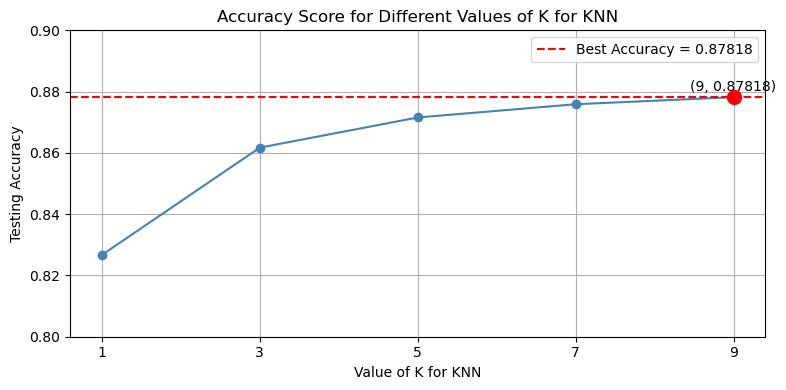

In [237]:
#data
k_vals = [k for k, _ in k_accuracy]
accuracies = [acc for _, acc in k_accuracy]

#best values
best_k, best_acc = max(k_accuracy, key=lambda x: x[1])

#plot
plt.figure(figsize=(8, 4))
plt.plot(k_vals, accuracies, marker='o', linestyle='-', color='steelblue')
plt.axhline(best_acc, color='red', linestyle='--', label=f'Best Accuracy = {best_acc:.5f}')
plt.scatter(best_k, best_acc, color='red', s=100, zorder=5)  # Red dot
plt.text(best_k, best_acc + 0.002, f'({best_k}, {best_acc:.5f})', color='black', ha='center')

#labels and titles
plt.title('Accuracy Score for Different Values of K for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks(k_vals)
plt.ylim(0.8, 0.9)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [239]:
print(f"Best k for {feature_label}: {best_k} with accuracy {best_acc:.4f}")

Best k for 2_features: 9 with accuracy 0.8782


**Evaluating KNN with Best k**

In [191]:
#run the KNN model with best K as the number of neighbors
knn_final = KNeighborsClassifier(n_neighbors=bestK_feat2_80_20)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

#get the required metrics
cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

#store data in a df for later use
KNN_feat2_80_20 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_k': bestK_feat10_60_40,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])

#output
print("\nFinal Evaluation Metrics for Feature Set:", feature_label)
print(KNN_feat2_80_20.drop(columns=['Confusion_Matrix']))

print("\nConfusion Matrix:")
print(cm_final)


Final Evaluation Metrics for Feature Set: 2_features
  Feature_Set  Train_Size  Test_Size  Best_k  Accuracy  Weighted_Precision  \
0  2_features         0.8        0.2       9  0.878179            0.877081   

   Weighted_Recall  Weighted_F1  
0         0.878179     0.873096  

Confusion Matrix:
[[888155  38189]
 [118804 243573]]


### 5.1.3 Split train test sets (70% - 30%)

#### 5.1.3.1 Features Selected = 10

**Selecting the best k value**

In [241]:
#selecting the features
feature_label = '10_features'
selected_features = feature_sets[feature_label]

#defining neighbors and train-test split
neighbors_list = [1, 3, 5, 7, 9]
train_size = 0.7
test_size = 0.3

features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target
)

#scaling the training values to standard normal by calculating z-values
#allows model to make better predictions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#list to store accuracy
k_accuracy = []

#loop through k-values
for k in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    k_accuracy.append((k, acc))

#sort out the accuracy
k_accuracy.sort(key=lambda x: x[1], reverse=True)
best_k, best_acc = k_accuracy[0]

#print sorted accuracies
print("K-values and their accuracies (sorted):")
for k, acc in k_accuracy:
    print(f"k = {k}: Accuracy = {acc:.6f}")


#store the k-value with the best accuracy
bestK_feat10_70_30 = best_k

K-values and their accuracies (sorted):
k = 9: Accuracy = 0.879106
k = 7: Accuracy = 0.876579
k = 5: Accuracy = 0.872583
k = 3: Accuracy = 0.862898
k = 1: Accuracy = 0.830843


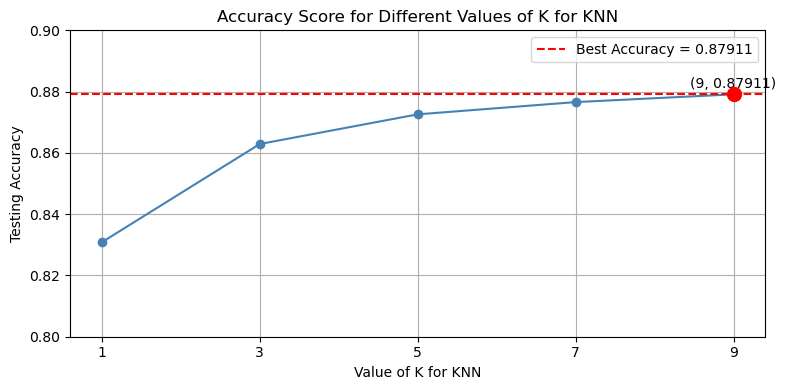

In [243]:
#data
k_vals = [k for k, _ in k_accuracy]
accuracies = [acc for _, acc in k_accuracy]

#best values
best_k, best_acc = max(k_accuracy, key=lambda x: x[1])

#plot
plt.figure(figsize=(8, 4))
plt.plot(k_vals, accuracies, marker='o', linestyle='-', color='steelblue')
plt.axhline(best_acc, color='red', linestyle='--', label=f'Best Accuracy = {best_acc:.5f}')
plt.scatter(best_k, best_acc, color='red', s=100, zorder=5)  # Red dot
plt.text(best_k, best_acc + 0.002, f'({best_k}, {best_acc:.5f})', color='black', ha='center')

#labels and titles
plt.title('Accuracy Score for Different Values of K for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks(k_vals)
plt.ylim(0.8, 0.9)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [245]:
print(f"Best k for {feature_label}: {best_k} with accuracy {best_acc:.4f}")

Best k for 10_features: 9 with accuracy 0.8791


**Evaluating KNN with Best k**

In [213]:
#run the KNN model with best K as the number of neighbors
knn_final = KNeighborsClassifier(n_neighbors=bestK_feat10_70_30)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

#get the required metrics
cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

#store data in a df for later use
KNN_feat10_70_30 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_k': bestK_feat10_60_40,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])

#output
print("\nFinal Evaluation Metrics for Feature Set:", feature_label)
print(KNN_feat10_70_30.drop(columns=['Confusion_Matrix']))

print("\nConfusion Matrix:")
print(cm_final)


Final Evaluation Metrics for Feature Set: 10_features
   Feature_Set  Train_Size  Test_Size  Best_k  Accuracy  Weighted_Precision  \
0  10_features         0.7        0.3       9  0.879106            0.877988   

   Weighted_Recall  Weighted_F1  
0         0.879106     0.874157  

Confusion Matrix:
[[1332174   57342]
 [ 176356  367209]]


#### 5.1.3.2 Features Selected = 8

**Selecting the best k value**

In [247]:
#selecting the features
feature_label = '8_features'
selected_features = feature_sets[feature_label]

#defining neighbors and train-test split
neighbors_list = [1, 3, 5, 7, 9]
train_size = 0.7
test_size = 0.3

features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target
)

#scaling the training values to standard normal by calculating z-values
#allows model to make better predictions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#list to store accuracy
k_accuracy = []

#loop through k-values
for k in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    k_accuracy.append((k, acc))

#sort out the accuracy
k_accuracy.sort(key=lambda x: x[1], reverse=True)
best_k, best_acc = k_accuracy[0]

#print sorted accuracies
print("K-values and their accuracies (sorted):")
for k, acc in k_accuracy:
    print(f"k = {k}: Accuracy = {acc:.6f}")

#store the k-value with the best accuracy
bestK_feat8_70_30 = best_k

K-values and their accuracies (sorted):
k = 9: Accuracy = 0.879940
k = 7: Accuracy = 0.877443
k = 5: Accuracy = 0.873025
k = 3: Accuracy = 0.862933
k = 1: Accuracy = 0.831226


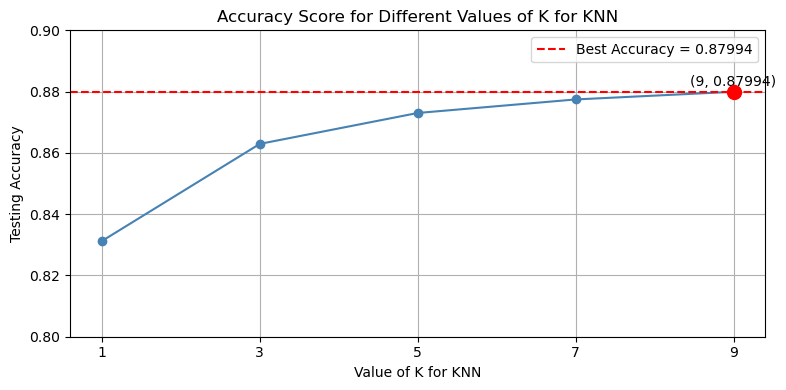

In [249]:
#data
k_vals = [k for k, _ in k_accuracy]
accuracies = [acc for _, acc in k_accuracy]

#best values
best_k, best_acc = max(k_accuracy, key=lambda x: x[1])

#plot
plt.figure(figsize=(8, 4))
plt.plot(k_vals, accuracies, marker='o', linestyle='-', color='steelblue')
plt.axhline(best_acc, color='red', linestyle='--', label=f'Best Accuracy = {best_acc:.5f}')
plt.scatter(best_k, best_acc, color='red', s=100, zorder=5)  # Red dot
plt.text(best_k, best_acc + 0.002, f'({best_k}, {best_acc:.5f})', color='black', ha='center')

#labels and titles
plt.title('Accuracy Score for Different Values of K for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks(k_vals)
plt.ylim(0.8, 0.9)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [251]:
print(f"Best k for {feature_label}: {best_k} with accuracy {best_acc:.4f}")

Best k for 8_features: 9 with accuracy 0.8799


**Evaluating KNN with best K**

In [244]:
#run the KNN model with best K as the number of neighbors
knn_final = KNeighborsClassifier(n_neighbors=bestK_feat8_70_30)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

#get the required metrics
cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

#store data in a df for later use
KNN_feat8_70_30 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_k': bestK_feat10_60_40,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])

#output
print("\nFinal Evaluation Metrics for Feature Set:", feature_label)
print(KNN_feat8_70_30.drop(columns=['Confusion_Matrix']))

print("\nConfusion Matrix:")
print(cm_final)


Final Evaluation Metrics for Feature Set: 8_features
  Feature_Set  Train_Size  Test_Size  Best_k  Accuracy  Weighted_Precision  \
0  8_features         0.7        0.3       9   0.87994            0.878814   

   Weighted_Recall  Weighted_F1  
0          0.87994     0.875104  

Confusion Matrix:
[[1332195   57321]
 [ 174764  368801]]


#### 5.1.3.3 Features Selected = 6

**Selecting the best k value**

In [253]:
#selecting the features
feature_label = '6_features'
selected_features = feature_sets[feature_label]

#defining neighbors and train-test split
neighbors_list = [1, 3, 5, 7, 9]
train_size = 0.7
test_size = 0.3

features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target
)

#scaling the training values to standard normal by calculating z-values
#allows model to make better predictions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#list to store accuracy
k_accuracy = []

#loop through k-values
for k in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    k_accuracy.append((k, acc))

#sort out the accuracy
k_accuracy.sort(key=lambda x: x[1], reverse=True)
best_k, best_acc = k_accuracy[0]

#print sorted accuracies
print("K-values and their accuracies (sorted):")
for k, acc in k_accuracy:
    print(f"k = {k}: Accuracy = {acc:.6f}")


#store the k-value with the best accuracy
bestK_feat6_70_30 = best_k

K-values and their accuracies (sorted):
k = 9: Accuracy = 0.878802
k = 7: Accuracy = 0.876231
k = 5: Accuracy = 0.871588
k = 3: Accuracy = 0.861397
k = 1: Accuracy = 0.827362


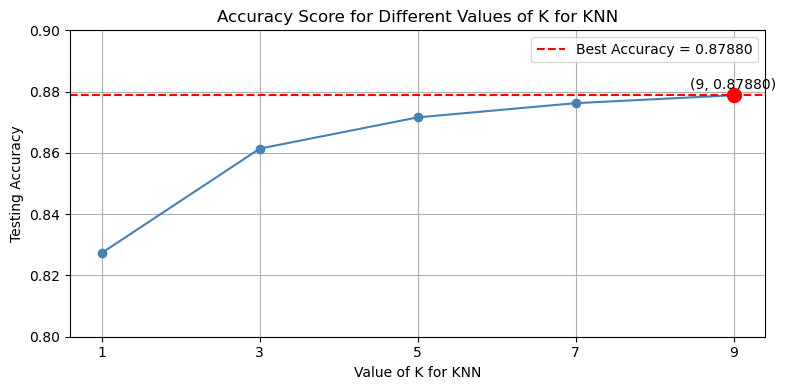

In [255]:
#data
k_vals = [k for k, _ in k_accuracy]
accuracies = [acc for _, acc in k_accuracy]

#best values
best_k, best_acc = max(k_accuracy, key=lambda x: x[1])

#plot
plt.figure(figsize=(8, 4))
plt.plot(k_vals, accuracies, marker='o', linestyle='-', color='steelblue')
plt.axhline(best_acc, color='red', linestyle='--', label=f'Best Accuracy = {best_acc:.5f}')
plt.scatter(best_k, best_acc, color='red', s=100, zorder=5)  # Red dot
plt.text(best_k, best_acc + 0.002, f'({best_k}, {best_acc:.5f})', color='black', ha='center')

#labels and titles
plt.title('Accuracy Score for Different Values of K for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks(k_vals)
plt.ylim(0.8, 0.9)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [257]:
print(f"Best k for {feature_label}: {best_k} with accuracy {best_acc:.4f}")

Best k for 6_features: 9 with accuracy 0.8788


**Evaluating KNN with Best k**

In [248]:
#run the KNN model with best K as the number of neighbors
knn_final = KNeighborsClassifier(n_neighbors=bestK_feat6_70_30)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

#get the required metrics
cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

#store data in a df for later use
KNN_feat6_70_30 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_k': bestK_feat10_60_40,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])

#output
print("\nFinal Evaluation Metrics for Feature Set:", feature_label)
print(KNN_feat6_70_30.drop(columns=['Confusion_Matrix']))

print("\nConfusion Matrix:")
print(cm_final)


Final Evaluation Metrics for Feature Set: 6_features
  Feature_Set  Train_Size  Test_Size  Best_k  Accuracy  Weighted_Precision  \
0  6_features         0.7        0.3       9  0.878802            0.877876   

   Weighted_Recall  Weighted_F1  
0         0.878802     0.873657  

Confusion Matrix:
[[1333695   55821]
 [ 178465  365100]]


#### 5.1.3.4 Features Selected = 2

**Selecting the best k value**

In [259]:
#selecting the features
feature_label = '2_features'
selected_features = feature_sets[feature_label]

#defining neighbors and train-test split
neighbors_list = [1, 3, 5, 7, 9]
train_size = 0.7
test_size = 0.3

features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target
)

#scaling the training values to standard normal by calculating z-values
#allows model to make better predictions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#list to store accuracy
k_accuracy = []

#loop through k-values
for k in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    k_accuracy.append((k, acc))

#sort out the accuracy
k_accuracy.sort(key=lambda x: x[1], reverse=True)
best_k, best_acc = k_accuracy[0]

#print sorted accuracies
print("K-values and their accuracies (sorted):")
for k, acc in k_accuracy:
    print(f"k = {k}: Accuracy = {acc:.6f}")

#store the k-value with the best accuracy
bestK_feat2_70_30 = best_k

K-values and their accuracies (sorted):
k = 9: Accuracy = 0.877951
k = 7: Accuracy = 0.875168
k = 5: Accuracy = 0.871143
k = 3: Accuracy = 0.861092
k = 1: Accuracy = 0.826595


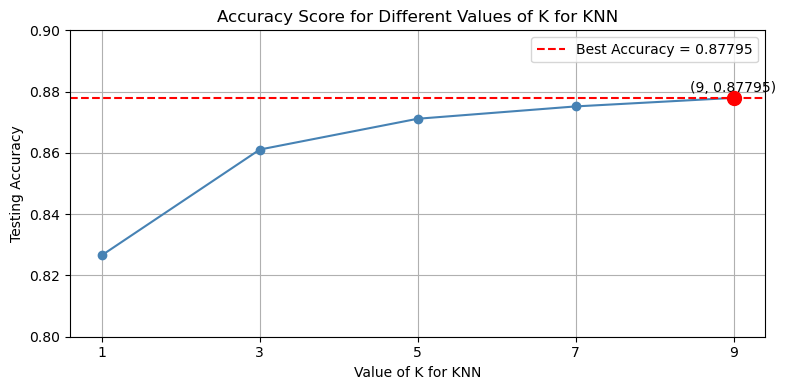

In [261]:
#data
k_vals = [k for k, _ in k_accuracy]
accuracies = [acc for _, acc in k_accuracy]

#best values
best_k, best_acc = max(k_accuracy, key=lambda x: x[1])

#plot
plt.figure(figsize=(8, 4))
plt.plot(k_vals, accuracies, marker='o', linestyle='-', color='steelblue')
plt.axhline(best_acc, color='red', linestyle='--', label=f'Best Accuracy = {best_acc:.5f}')
plt.scatter(best_k, best_acc, color='red', s=100, zorder=5)  # Red dot
plt.text(best_k, best_acc + 0.002, f'({best_k}, {best_acc:.5f})', color='black', ha='center')

#labels and titles
plt.title('Accuracy Score for Different Values of K for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks(k_vals)
plt.ylim(0.8, 0.9)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [263]:
print(f"Best k for {feature_label}: {best_k} with accuracy {best_acc:.4f}")

Best k for 2_features: 9 with accuracy 0.8780


**Evaluating KNN with Best k**

In [252]:
#run the KNN model with best K as the number of neighbors
knn_final = KNeighborsClassifier(n_neighbors=bestK_feat2_70_30)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

#get the required metrics
cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

#store data in a df for later use
KNN_feat2_70_30 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_k': bestK_feat10_60_40,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])

#output
print("\nFinal Evaluation Metrics for Feature Set:", feature_label)
print(KNN_feat2_70_30.drop(columns=['Confusion_Matrix']))

print("\nConfusion Matrix:")
print(cm_final)


Final Evaluation Metrics for Feature Set: 2_features
  Feature_Set  Train_Size  Test_Size  Best_k  Accuracy  Weighted_Precision  \
0  2_features         0.7        0.3       9  0.877951            0.877046   

   Weighted_Recall  Weighted_F1  
0         0.877951     0.872682  

Confusion Matrix:
[[1333733   55783]
 [ 180147  363418]]


## 5.2 Support Vector Machine (SVM)

In [ ]:
#C values
c_values = [0.01, 0.1, 1, 10, 100]

#Store results
svm_results = []

### 5.2.1 Split 60/40 with 6 features

In [45]:
feature_label = '6_features'
test_size = 0.4
selected_features = feature_sets[feature_label]
train_size = 1 - test_size

df_model = df[selected_features + ['ARREST']].dropna()
df_model['ARREST'] = df_model['ARREST'].astype(int)

X = pd.get_dummies(df_model[selected_features])
y = df_model['ARREST']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_score = 0
for c in c_values:
    model = LinearSVC(C=c, class_weight='balanced', max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    if acc > best_score:
        best_score = acc
        best_c = c
        best_metrics = {
            'accuracy': acc,
            'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'f1': f1_score(y_test, y_pred, average='weighted', zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

svm_results.append({
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_C': best_c,
    'Accuracy': best_metrics['accuracy'],
    'Weighted_Precision': best_metrics['precision'],
    'Weighted_Recall': best_metrics['recall'],
    'Weighted_F1': best_metrics['f1'],
    'Confusion_Matrix': best_metrics['confusion_matrix']
})

print(f"\n{feature_label} | Split 60/40 | Best C={best_c}")
print("Accuracy:", best_metrics['accuracy'])
print("Confusion Matrix:\n", best_metrics['confusion_matrix'])



6_features | Split 60/40 | Best C=0.1
Accuracy: 0.7620702083966229
Confusion Matrix:
 [[1506670  346447]
 [ 266803  457521]]


### 5.2.2 Split 60/40 with 8 features

In [47]:
feature_label = '8_features'
test_size = 0.4
selected_features = feature_sets[feature_label]
train_size = 1 - test_size

df_model = df[selected_features + ['ARREST']].dropna()
df_model['ARREST'] = df_model['ARREST'].astype(int)

X = pd.get_dummies(df_model[selected_features])
y = df_model['ARREST']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_score = 0
for c in c_values:
    model = LinearSVC(C=c, class_weight='balanced', max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    if acc > best_score:
        best_score = acc
        best_c = c
        best_metrics = {
            'accuracy': acc,
            'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'f1': f1_score(y_test, y_pred, average='weighted', zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

svm_results.append({
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_C': best_c,
    'Accuracy': best_metrics['accuracy'],
    'Weighted_Precision': best_metrics['precision'],
    'Weighted_Recall': best_metrics['recall'],
    'Weighted_F1': best_metrics['f1'],
    'Confusion_Matrix': best_metrics['confusion_matrix']
})

print(f"\n{feature_label} | Split 60/40 | Best C={best_c}")
print("Accuracy:", best_metrics['accuracy'])
print("Confusion Matrix:\n", best_metrics['confusion_matrix'])



8_features | Split 60/40 | Best C=0.1
Accuracy: 0.7400452619478002
Confusion Matrix:
 [[1446111  407006]
 [ 263012  461312]]


### 5.2.3 Split 60/40 with 10 features

In [49]:
feature_label = '10_features'
test_size = 0.4
selected_features = feature_sets[feature_label]
train_size = 1 - test_size

df_model = df[selected_features + ['ARREST']].dropna()
df_model['ARREST'] = df_model['ARREST'].astype(int)

X = pd.get_dummies(df_model[selected_features])
y = df_model['ARREST']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_score = 0
for c in c_values:
    model = LinearSVC(C=c, class_weight='balanced', max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    if acc > best_score:
        best_score = acc
        best_c = c
        best_metrics = {
            'accuracy': acc,
            'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'f1': f1_score(y_test, y_pred, average='weighted', zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

svm_results.append({
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_C': best_c,
    'Accuracy': best_metrics['accuracy'],
    'Weighted_Precision': best_metrics['precision'],
    'Weighted_Recall': best_metrics['recall'],
    'Weighted_F1': best_metrics['f1'],
    'Confusion_Matrix': best_metrics['confusion_matrix']
})

print(f"\n{feature_label} | Split 60/40 | Best C={best_c}")
print("Accuracy:", best_metrics['accuracy'])
print("Confusion Matrix:\n", best_metrics['confusion_matrix'])



10_features | Split 60/40 | Best C=0.1
Accuracy: 0.7399152880706096
Confusion Matrix:
 [[1445725  407392]
 [ 262961  461363]]


### 5.2.4 Split 70/30 with 6 features

In [51]:
feature_label = '6_features'
test_size = 0.3
selected_features = feature_sets[feature_label]
train_size = 1 - test_size

df_model = df[selected_features + ['ARREST']].dropna()
df_model['ARREST'] = df_model['ARREST'].astype(int)

X = pd.get_dummies(df_model[selected_features])
y = df_model['ARREST']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_score = 0
for c in c_values:
    model = LinearSVC(C=c, class_weight='balanced', max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    if acc > best_score:
        best_score = acc
        best_c = c
        best_metrics = {
            'accuracy': acc,
            'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'f1': f1_score(y_test, y_pred, average='weighted', zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

svm_results.append({
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_C': best_c,
    'Accuracy': best_metrics['accuracy'],
    'Weighted_Precision': best_metrics['precision'],
    'Weighted_Recall': best_metrics['recall'],
    'Weighted_F1': best_metrics['f1'],
    'Confusion_Matrix': best_metrics['confusion_matrix']
})

print(f"\n{feature_label} | Split 60/40 | Best C={best_c}")
print("Accuracy:", best_metrics['accuracy'])
print("Confusion Matrix:\n", best_metrics['confusion_matrix'])



6_features | Split 60/40 | Best C=0.1
Accuracy: 0.762059634335033
Confusion Matrix:
 [[1130267  259458]
 [ 200500  342856]]


### 5.2.5 Split 70/30 with 8 features

In [53]:
feature_label = '8_features'
test_size = 0.3
selected_features = feature_sets[feature_label]
train_size = 1 - test_size

df_model = df[selected_features + ['ARREST']].dropna()
df_model['ARREST'] = df_model['ARREST'].astype(int)

X = pd.get_dummies(df_model[selected_features])
y = df_model['ARREST']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_score = 0
for c in c_values:
    model = LinearSVC(C=c, class_weight='balanced', max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    if acc > best_score:
        best_score = acc
        best_c = c
        best_metrics = {
            'accuracy': acc,
            'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'f1': f1_score(y_test, y_pred, average='weighted', zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

svm_results.append({
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_C': best_c,
    'Accuracy': best_metrics['accuracy'],
    'Weighted_Precision': best_metrics['precision'],
    'Weighted_Recall': best_metrics['recall'],
    'Weighted_F1': best_metrics['f1'],
    'Confusion_Matrix': best_metrics['confusion_matrix']
})

print(f"\n{feature_label} | Split 60/40 | Best C={best_c}")
print("Accuracy:", best_metrics['accuracy'])
print("Confusion Matrix:\n", best_metrics['confusion_matrix'])



8_features | Split 60/40 | Best C=0.1
Accuracy: 0.739645674444061
Confusion Matrix:
 [[1084076  305649]
 [ 197637  345719]]


### 5.2.6 Split 70/30 with 10 features

In [55]:
feature_label = '10_features'
test_size = 0.3
selected_features = feature_sets[feature_label]
train_size = 1 - test_size

df_model = df[selected_features + ['ARREST']].dropna()
df_model['ARREST'] = df_model['ARREST'].astype(int)

X = pd.get_dummies(df_model[selected_features])
y = df_model['ARREST']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_score = 0
for c in c_values:
    model = LinearSVC(C=c, class_weight='balanced', max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    if acc > best_score:
        best_score = acc
        best_c = c
        best_metrics = {
            'accuracy': acc,
            'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'f1': f1_score(y_test, y_pred, average='weighted', zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

svm_results.append({
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_C': best_c,
    'Accuracy': best_metrics['accuracy'],
    'Weighted_Precision': best_metrics['precision'],
    'Weighted_Recall': best_metrics['recall'],
    'Weighted_F1': best_metrics['f1'],
    'Confusion_Matrix': best_metrics['confusion_matrix']
})

print(f"\n{feature_label} | Split 60/40 | Best C={best_c}")
print("Accuracy:", best_metrics['accuracy'])
print("Confusion Matrix:\n", best_metrics['confusion_matrix'])



10_features | Split 60/40 | Best C=10
Accuracy: 0.7395344530311974
Confusion Matrix:
 [[1083843  305882]
 [ 197619  345737]]


### 5.2.7 Split 80/20 with 6 features

In [57]:
feature_label = '6_features'
test_size = 0.2
selected_features = feature_sets[feature_label]
train_size = 1 - test_size

df_model = df[selected_features + ['ARREST']].dropna()
df_model['ARREST'] = df_model['ARREST'].astype(int)

X = pd.get_dummies(df_model[selected_features])
y = df_model['ARREST']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_score = 0
for c in c_values:
    model = LinearSVC(C=c, class_weight='balanced', max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    if acc > best_score:
        best_score = acc
        best_c = c
        best_metrics = {
            'accuracy': acc,
            'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'f1': f1_score(y_test, y_pred, average='weighted', zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

svm_results.append({
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_C': best_c,
    'Accuracy': best_metrics['accuracy'],
    'Weighted_Precision': best_metrics['precision'],
    'Weighted_Recall': best_metrics['recall'],
    'Weighted_F1': best_metrics['f1'],
    'Confusion_Matrix': best_metrics['confusion_matrix']
})

print(f"\n{feature_label} | Split 60/40 | Best C={best_c}")
print("Accuracy:", best_metrics['accuracy'])
print("Confusion Matrix:\n", best_metrics['confusion_matrix'])



6_features | Split 60/40 | Best C=0.01
Accuracy: 0.761689302804874
Confusion Matrix:
 [[752941 173495]
 [133621 228664]]


### 5.2.8 Split 80/20 with 8 features

In [59]:
feature_label = '8_features'
test_size = 0.2
selected_features = feature_sets[feature_label]
train_size = 1 - test_size

df_model = df[selected_features + ['ARREST']].dropna()
df_model['ARREST'] = df_model['ARREST'].astype(int)

X = pd.get_dummies(df_model[selected_features])
y = df_model['ARREST']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_score = 0
for c in c_values:
    model = LinearSVC(C=c, class_weight='balanced', max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    if acc > best_score:
        best_score = acc
        best_c = c
        best_metrics = {
            'accuracy': acc,
            'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'f1': f1_score(y_test, y_pred, average='weighted', zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

svm_results.append({
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_C': best_c,
    'Accuracy': best_metrics['accuracy'],
    'Weighted_Precision': best_metrics['precision'],
    'Weighted_Recall': best_metrics['recall'],
    'Weighted_F1': best_metrics['f1'],
    'Confusion_Matrix': best_metrics['confusion_matrix']
})

print(f"\n{feature_label} | Split 60/40 | Best C={best_c}")
print("Accuracy:", best_metrics['accuracy'])
print("Confusion Matrix:\n", best_metrics['confusion_matrix'])



8_features | Split 60/40 | Best C=1
Accuracy: 0.738937287434596
Confusion Matrix:
 [[721811 204625]
 [131812 230473]]


### 5.2.9 Split 80/20 with 10 features

In [61]:
feature_label = '10_features'
test_size = 0.2
selected_features = feature_sets[feature_label]
train_size = 1 - test_size

df_model = df[selected_features + ['ARREST']].dropna()
df_model['ARREST'] = df_model['ARREST'].astype(int)

X = pd.get_dummies(df_model[selected_features])
y = df_model['ARREST']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_score = 0
for c in c_values:
    model = LinearSVC(C=c, class_weight='balanced', max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    if acc > best_score:
        best_score = acc
        best_c = c
        best_metrics = {
            'accuracy': acc,
            'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'f1': f1_score(y_test, y_pred, average='weighted', zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

svm_results.append({
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_C': best_c,
    'Accuracy': best_metrics['accuracy'],
    'Weighted_Precision': best_metrics['precision'],
    'Weighted_Recall': best_metrics['recall'],
    'Weighted_F1': best_metrics['f1'],
    'Confusion_Matrix': best_metrics['confusion_matrix']
})

print(f"\n{feature_label} | Split 60/40 | Best C={best_c}")
print("Accuracy:", best_metrics['accuracy'])
print("Confusion Matrix:\n", best_metrics['confusion_matrix'])



10_features | Split 60/40 | Best C=0.1
Accuracy: 0.7388224448891575
Confusion Matrix:
 [[721638 204798]
 [131787 230498]]


In [70]:
svm_summary_df = pd.DataFrame(svm_results)
print("\nFinal SVM Summary:")
print(svm_summary_df.drop(columns='Confusion_Matrix'))



Final SVM Summary:
   Feature_Set  Train_Size  Test_Size  Best_C  Accuracy  Weighted_Precision  \
0   6_features         0.6        0.4    0.10  0.762070            0.770737   
1   8_features         0.6        0.4    0.10  0.740045            0.757635   
2  10_features         0.6        0.4    0.10  0.739915            0.757569   
3   6_features         0.7        0.3    0.10  0.762060            0.770603   
4   8_features         0.7        0.3    0.10  0.739646            0.757249   
5  10_features         0.7        0.3   10.00  0.739534            0.757188   
6   6_features         0.8        0.2    0.01  0.761689            0.770374   
7   8_features         0.8        0.2    1.00  0.738937            0.756785   
8  10_features         0.8        0.2    0.10  0.738822            0.756728   

   Weighted_Recall  Weighted_F1  
0         0.762070     0.765657  
1         0.740045     0.746543  
2         0.739915     0.746432  
3         0.762060     0.765604  
4         0.739646 

In [72]:
svm_summary_df.to_csv('svm_results_summary.csv', index=False)


## 5.3 Decision Tree

### 5.3.1 60/40 split with 6 features (decision tree)

In [130]:
# Config for 6 features, 60/40 split
feature_label = '6_features'
train_size = 0.6
test_size = 0.4

selected_features = feature_sets[feature_label]
features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target)


In [131]:
print(df.columns.tolist())

['BLOCK', 'IUCR', 'PRIMARY_TYPE', 'DESCRIPTION', 'LOCATION_DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'DISTRICT', 'WARD', 'COMMUNITY_AREA', 'FBI_CODE', 'YEAR', 'LATITUDE', 'LONGITUDE', 'UPDATED_YEAR', 'UPDATED_MONTH', 'UPDATED_DAYOFWEEK', 'UPDATED_HOUR', 'UPDATED_ISWEEKEND', 'UPDATED_WEEKOFYEAR', 'UPDATED_SEASON']


In [132]:
#Evaluate best max_depth
depth_list = [3, 5, 10, None]
depth_accuracy = []

for depth in depth_list:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    depth_accuracy.append((depth, acc))

depth_accuracy.sort(key=lambda x: x[1], reverse=True)
best_depth, best_acc = depth_accuracy[0]

print("Depth ranking (best → worst):")
for d, a in depth_accuracy:
    d_str = str(d) if d is not None else "None"
    if isinstance(a, (int, float)):
        print(f"  depth={d_str:<4} | accuracy={a:.4f}")
    else:
        print(f"  depth={d_str:<4} | accuracy=Invalid or missing")

# Print best depth safely
if best_depth is not None and best_acc is not None:
    print(f"\n✅ Best depth: {best_depth}  (accuracy={best_acc:.4f})")
else:
    print("\n❌ No valid depth found.")


Depth ranking (best → worst):
  depth=10   | accuracy=0.8797
  depth=5    | accuracy=0.8754
  depth=None | accuracy=0.8692
  depth=3    | accuracy=0.8581

✅ Best depth: 10  (accuracy=0.8797)


In [133]:
# Final model and evaluation
dt_final = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_final.fit(X_train, y_train)
y_pred_final = dt_final.predict(X_test)

cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

DT_feat6_60_40 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_max_depth': best_depth,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])

In [134]:
# Show results
print(f"\nFinal Evaluation Metrics for Feature Set: {feature_label}")
print(DT_feat6_60_40.drop(columns=['Confusion_Matrix']))
print("\nConfusion Matrix:")
print(cm_final)



Final Evaluation Metrics for Feature Set: 6_features
  Feature_Set  Train_Size  Test_Size  Best_max_depth  Accuracy  \
0  6_features         0.6        0.4              10  0.879678   

   Weighted_Precision  Weighted_Recall  Weighted_F1  
0            0.880313         0.879678       0.8736  

Confusion Matrix:
[[1791842   60846]
 [ 249276  475477]]


### 5.3.2 60/40 split with 8 features (decision tree)

In [136]:
# Set configuration and split data
feature_label = '8_features'   # ← n = 8 features
train_size = 0.6               # ← 60% train
test_size = 0.4                # ← 40% test

selected_features = feature_sets[feature_label]
features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target)


In [137]:
# Evaluate best max_depth
depth_list = [3, 5, 10, None]
depth_accuracy = []

for depth in depth_list:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    depth_accuracy.append((depth, acc))

depth_accuracy.sort(key=lambda x: x[1], reverse=True)
best_depth, best_acc = depth_accuracy[0]

print("Depth ranking (best → worst):")
for d, a in depth_accuracy:
    d_str = str(d) if d is not None else "None"
    if isinstance(a, (int, float)):
        print(f"  depth={d_str:<4} | accuracy={a:.4f}")
    else:
        print(f"  depth={d_str:<4} | accuracy=Invalid or missing")

# Print best depth safely
if best_depth is not None and best_acc is not None:
    print(f"\n✅ Best depth: {best_depth}  (accuracy={best_acc:.4f})")
else:
    print("\n❌ No valid depth found.")


Depth ranking (best → worst):
  depth=10   | accuracy=0.8807
  depth=5    | accuracy=0.8754
  depth=3    | accuracy=0.8581
  depth=None | accuracy=0.8562

✅ Best depth: 10  (accuracy=0.8807)


In [138]:
# Final model and evaluation
dt_final = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_final.fit(X_train, y_train)
y_pred_final = dt_final.predict(X_test)

cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

# Store results
DT_feat8_60_40 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_max_depth': best_depth,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])


In [141]:
# Show results
print(f"\nFinal Evaluation Metrics for Feature Set: {feature_label}")
print(DT_feat8_60_40.drop(columns=['Confusion_Matrix']))
print("\nConfusion Matrix:")
print(cm_final)



Final Evaluation Metrics for Feature Set: 8_features
  Feature_Set  Train_Size  Test_Size  Best_max_depth  Accuracy  \
0  8_features         0.6        0.4              10  0.880743   

   Weighted_Precision  Weighted_Recall  Weighted_F1  
0            0.881911         0.880743     0.874501  

Confusion Matrix:
[[1795923   56765]
 [ 250614  474139]]


### 5.3.3 60/40 split with 10 features (decision tree)

In [143]:
# Config for 10 features, 60/40 split
feature_label = '10_features'
train_size = 0.6
test_size = 0.4

selected_features = feature_sets[feature_label]
features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target)



In [144]:
# Evaluate best max_depth
depth_list = [3, 5, 10, None]
depth_accuracy = []

for depth in depth_list:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    depth_accuracy.append((depth, acc))

depth_accuracy.sort(key=lambda x: x[1], reverse=True)
best_depth, best_acc = depth_accuracy[0]

print("Depth ranking (best → worst):")
for d, a in depth_accuracy:
    d_str = str(d) if d is not None else "None"
    if isinstance(a, (int, float)):
        print(f"  depth={d_str:<4} | accuracy={a:.4f}")
    else:
        print(f"  depth={d_str:<4} | accuracy=Invalid or missing")

# Print best depth safely
if best_depth is not None and best_acc is not None:
    print(f"\n✅ Best depth: {best_depth}  (accuracy={best_acc:.4f})")
else:
    print("\n❌ No valid depth found.")


Depth ranking (best → worst):
  depth=10   | accuracy=0.8811
  depth=5    | accuracy=0.8754
  depth=3    | accuracy=0.8581
  depth=None | accuracy=0.8554

✅ Best depth: 10  (accuracy=0.8811)


**Evaluating the best depth**

In [146]:
# Final model and evaluation
dt_final = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_final.fit(X_train, y_train)
y_pred_final = dt_final.predict(X_test)

cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

DT_feat10_60_40 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_max_depth': best_depth,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])

In [147]:
# Show results
print(f"\nFinal Evaluation Metrics for Feature Set: {feature_label}")
print(DT_feat10_60_40.drop(columns=['Confusion_Matrix']))
print("\nConfusion Matrix:")
print(cm_final)



Final Evaluation Metrics for Feature Set: 10_features
   Feature_Set  Train_Size  Test_Size  Best_max_depth  Accuracy  \
0  10_features         0.6        0.4              10  0.881058   

   Weighted_Precision  Weighted_Recall  Weighted_F1  
0            0.882176         0.881058     0.874883  

Confusion Matrix:
[[1795712   56976]
 [ 249589  475164]]


### 5.3.4 70/30 split with 6 features (decision tree)

In [149]:
# Config for 6 features, 70/30 split
feature_label = '6_features'
train_size = 0.7
test_size = 0.3

selected_features = feature_sets[feature_label]
features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target)


In [150]:
# Evaluate best max_depth
depth_list = [3, 5, 10, None]
depth_accuracy = []

for depth in depth_list:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    depth_accuracy.append((depth, acc))

depth_accuracy.sort(key=lambda x: x[1], reverse=True)
best_depth, best_acc = depth_accuracy[0]

print("Depth ranking (best → worst):")
for d, a in depth_accuracy:
    d_str = str(d) if d is not None else "None"
    if isinstance(a, (int, float)):
        print(f"  depth={d_str:<4} | accuracy={a:.4f}")
    else:
        print(f"  depth={d_str:<4} | accuracy=Invalid or missing")

# Print best depth safely
if best_depth is not None and best_acc is not None:
    print(f"\n✅ Best depth: {best_depth}  (accuracy={best_acc:.4f})")
else:
    print("\n❌ No valid depth found.")


Depth ranking (best → worst):
  depth=10   | accuracy=0.8794
  depth=5    | accuracy=0.8753
  depth=None | accuracy=0.8707
  depth=3    | accuracy=0.8581

✅ Best depth: 10  (accuracy=0.8794)


**Evaluating the best depth**

In [152]:
# Final model and evaluation
dt_final = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_final.fit(X_train, y_train)
y_pred_final = dt_final.predict(X_test)

cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

DT_feat6_70_30 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_max_depth': best_depth,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])


In [153]:
# Show results
print(f"\nFinal Evaluation Metrics for Feature Set: {feature_label}")
print(DT_feat6_70_30.drop(columns=['Confusion_Matrix']))
print("\nConfusion Matrix:")
print(cm_final)



Final Evaluation Metrics for Feature Set: 6_features
  Feature_Set  Train_Size  Test_Size  Best_max_depth  Accuracy  \
0  6_features         0.7        0.3              10  0.879412   

   Weighted_Precision  Weighted_Recall  Weighted_F1  
0            0.879874         0.879412     0.873401  

Confusion Matrix:
[[1342869   46647]
 [ 186460  357105]]


### 5.3.5 70/30 split with 8 features (decision tree)

In [155]:
# Config for 8 features, 70/30 split
feature_label = '8_features'
train_size = 0.7
test_size = 0.3

selected_features = feature_sets[feature_label]
features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target)


In [156]:
# Evaluate best max_depth
depth_list = [3, 5, 10, None]
depth_accuracy = []

for depth in depth_list:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    depth_accuracy.append((depth, acc))

depth_accuracy.sort(key=lambda x: x[1], reverse=True)
best_depth, best_acc = depth_accuracy[0]

print("Depth ranking (best → worst):")
for d, a in depth_accuracy:
    d_str = str(d) if d is not None else "None"
    if isinstance(a, (int, float)):
        print(f"  depth={d_str:<4} | accuracy={a:.4f}")
    else:
        print(f"  depth={d_str:<4} | accuracy=Invalid or missing")

# Print best depth safely
if best_depth is not None and best_acc is not None:
    print(f"\n✅ Best depth: {best_depth}  (accuracy={best_acc:.4f})")
else:
    print("\n❌ No valid depth found.")


Depth ranking (best → worst):
  depth=10   | accuracy=0.8804
  depth=5    | accuracy=0.8753
  depth=3    | accuracy=0.8581
  depth=None | accuracy=0.8579

✅ Best depth: 10  (accuracy=0.8804)


**Evaluating the best depth**

In [158]:
# Final model and evaluation
dt_final = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_final.fit(X_train, y_train)
y_pred_final = dt_final.predict(X_test)

cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

DT_feat8_70_30 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_max_depth': best_depth,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])

In [159]:
# Show results
print(f"\nFinal Evaluation Metrics for Feature Set: {feature_label}")
print(DT_feat8_70_30.drop(columns=['Confusion_Matrix']))
print("\nConfusion Matrix:")
print(cm_final)



Final Evaluation Metrics for Feature Set: 8_features
  Feature_Set  Train_Size  Test_Size  Best_max_depth  Accuracy  \
0  8_features         0.7        0.3              10  0.880354   

   Weighted_Precision  Weighted_Recall  Weighted_F1  
0             0.88089         0.880354     0.874417  

Confusion Matrix:
[[1343525   45991]
 [ 185295  358270]]


### 5.3.6 70/30 split with 10 features (decision tree)

In [161]:
# Config for 10 features, 70/30 split
feature_label = '10_features'
train_size = 0.7
test_size = 0.3

selected_features = feature_sets[feature_label]
features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target)


In [162]:
# Evaluate best max_depth
depth_list = [3, 5, 10, None]
depth_accuracy = []

for depth in depth_list:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    depth_accuracy.append((depth, acc))

depth_accuracy.sort(key=lambda x: x[1], reverse=True)
best_depth, best_acc = depth_accuracy[0]

print("Depth ranking (best → worst):")
for d, a in depth_accuracy:
    d_str = str(d) if d is not None else "None"
    if isinstance(a, (int, float)):
        print(f"  depth={d_str:<4} | accuracy={a:.4f}")
    else:
        print(f"  depth={d_str:<4} | accuracy=Invalid or missing")

# Print best depth safely
if best_depth is not None and best_acc is not None:
    print(f"\n✅ Best depth: {best_depth}  (accuracy={best_acc:.4f})")
else:
    print("\n❌ No valid depth found.")

Depth ranking (best → worst):
  depth=10   | accuracy=0.8807
  depth=5    | accuracy=0.8753
  depth=3    | accuracy=0.8581
  depth=None | accuracy=0.8573

✅ Best depth: 10  (accuracy=0.8807)


**Evaluating the best depth**

In [164]:
# Final model and evaluation
dt_final = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_final.fit(X_train, y_train)
y_pred_final = dt_final.predict(X_test)

cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

DT_feat10_70_30 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_max_depth': best_depth,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])

In [165]:
# Show results
print(f"\nFinal Evaluation Metrics for Feature Set: {feature_label}")
print(DT_feat10_70_30.drop(columns=['Confusion_Matrix']))
print("\nConfusion Matrix:")
print(cm_final)



Final Evaluation Metrics for Feature Set: 10_features
   Feature_Set  Train_Size  Test_Size  Best_max_depth  Accuracy  \
0  10_features         0.7        0.3              10  0.880746   

   Weighted_Precision  Weighted_Recall  Weighted_F1  
0             0.88178         0.880746     0.874577  

Confusion Matrix:
[[1346269   43247]
 [ 187281  356284]]


### 5.3.7 80/20 split with 6 features (decision tree)

In [167]:
# Config for 6 features, 80/20 split
feature_label = '6_features'
train_size = 0.8
test_size = 0.2

selected_features = feature_sets[feature_label]
features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target)


In [168]:
# Evaluate best max_depth
depth_list = [3, 5, 10, None]
depth_accuracy = []

for depth in depth_list:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    depth_accuracy.append((depth, acc))

depth_accuracy.sort(key=lambda x: x[1], reverse=True)
best_depth, best_acc = depth_accuracy[0]

print("Depth ranking (best → worst):")
for d, a in depth_accuracy:
    d_str = str(d) if d is not None else "None"
    if isinstance(a, (int, float)):
        print(f"  depth={d_str:<4} | accuracy={a:.4f}")
    else:
        print(f"  depth={d_str:<4} | accuracy=Invalid or missing")

# Print best depth safely
if best_depth is not None and best_acc is not None:
    print(f"\n✅ Best depth: {best_depth}  (accuracy={best_acc:.4f})")
else:
    print("\n❌ No valid depth found.")


Depth ranking (best → worst):
  depth=10   | accuracy=0.8795
  depth=5    | accuracy=0.8753
  depth=None | accuracy=0.8716
  depth=3    | accuracy=0.8581

✅ Best depth: 10  (accuracy=0.8795)


**Evaluating the best depth**

In [170]:
# Final model and evaluation
dt_final = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_final.fit(X_train, y_train)
y_pred_final = dt_final.predict(X_test)

cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

DT_feat6_80_20 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_max_depth': best_depth,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])


In [171]:
# Show results
print(f"\nFinal Evaluation Metrics for Feature Set: {feature_label}")
print(DT_feat6_80_20.drop(columns=['Confusion_Matrix']))
print("\nConfusion Matrix:")
print(cm_final)



Final Evaluation Metrics for Feature Set: 6_features
  Feature_Set  Train_Size  Test_Size  Best_max_depth  Accuracy  \
0  6_features         0.8        0.2              10  0.879519   

   Weighted_Precision  Weighted_Recall  Weighted_F1  
0            0.879967         0.879519      0.87353  

Confusion Matrix:
[[895213  31131]
 [124136 238241]]


### 5.3.8 80/20 split with 8 features (decision tree)

In [173]:
# Config for 8 features, 80/20 split
feature_label = '8_features'
train_size = 0.8
test_size = 0.2

selected_features = feature_sets[feature_label]
features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target)


In [174]:
# Evaluate best max_depth
depth_list = [3, 5, 10, None]
depth_accuracy = []

for depth in depth_list:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    depth_accuracy.append((depth, acc))

depth_accuracy.sort(key=lambda x: x[1], reverse=True)
best_depth, best_acc = depth_accuracy[0]

print("Depth ranking (best → worst):")
for d, a in depth_accuracy:
    d_str = str(d) if d is not None else "None"
    if isinstance(a, (int, float)):
        print(f"  depth={d_str:<4} | accuracy={a:.4f}")
    else:
        print(f"  depth={d_str:<4} | accuracy=Invalid or missing")

# Print best depth safely
if best_depth is not None and best_acc is not None:
    print(f"\n✅ Best depth: {best_depth}  (accuracy={best_acc:.4f})")
else:
    print("\n❌ No valid depth found.")


Depth ranking (best → worst):
  depth=10   | accuracy=0.8804
  depth=5    | accuracy=0.8753
  depth=None | accuracy=0.8592
  depth=3    | accuracy=0.8581

✅ Best depth: 10  (accuracy=0.8804)


**Evaluating th best depth**

In [176]:
# Final model and evaluation
dt_final = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_final.fit(X_train, y_train)
y_pred_final = dt_final.predict(X_test)

cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

DT_feat8_80_20 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_max_depth': best_depth,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])


In [177]:
# Show results
print(f"\nFinal Evaluation Metrics for Feature Set: {feature_label}")
print(DT_feat8_80_20.drop(columns=['Confusion_Matrix']))
print("\nConfusion Matrix:")
print(cm_final)



Final Evaluation Metrics for Feature Set: 8_features
  Feature_Set  Train_Size  Test_Size  Best_max_depth  Accuracy  \
0  8_features         0.8        0.2              10  0.880364   

   Weighted_Precision  Weighted_Recall  Weighted_F1  
0            0.880864         0.880364      0.87445  

Confusion Matrix:
[[895552  30792]
 [123385 238992]]


### 5.3.9 80/20 split with 10 features (decision tree)

In [179]:
# Config for 10 features, 80/20 split
feature_label = '10_features'
train_size = 0.8
test_size = 0.2

selected_features = feature_sets[feature_label]
features = df[selected_features]
target = df['ARREST']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=train_size, random_state=42, stratify=target)


In [180]:
# Evaluate best max_depth
depth_list = [3, 5, 10, None]
depth_accuracy = []

for depth in depth_list:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    depth_accuracy.append((depth, acc))

depth_accuracy.sort(key=lambda x: x[1], reverse=True)
best_depth, best_acc = depth_accuracy[0]

print("Depth ranking (best → worst):")
for d, a in depth_accuracy:
    d_str = str(d) if d is not None else "None"
    if isinstance(a, (int, float)):
        print(f"  depth={d_str:<4} | accuracy={a:.4f}")
    else:
        print(f"  depth={d_str:<4} | accuracy=Invalid or missing")

# Print best depth safely
if best_depth is not None and best_acc is not None:
    print(f"\n✅ Best depth: {best_depth}  (accuracy={best_acc:.4f})")
else:
    print("\n❌ No valid depth found.")


Depth ranking (best → worst):
  depth=10   | accuracy=0.8808
  depth=5    | accuracy=0.8753
  depth=None | accuracy=0.8589
  depth=3    | accuracy=0.8581

✅ Best depth: 10  (accuracy=0.8808)


**Evaluating the best depth**

In [182]:
# Final model and evaluation
dt_final = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_final.fit(X_train, y_train)
y_pred_final = dt_final.predict(X_test)

cm_final = confusion_matrix(y_test, y_pred_final)
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

DT_feat10_80_20 = pd.DataFrame([{
    'Feature_Set': feature_label,
    'Train_Size': train_size,
    'Test_Size': test_size,
    'Best_max_depth': best_depth,
    'Accuracy': acc_final,
    'Weighted_Precision': prec_final,
    'Weighted_Recall': rec_final,
    'Weighted_F1': f1_final,
    'Confusion_Matrix': cm_final
}])

In [183]:
# Show results
print(f"\nFinal Evaluation Metrics for Feature Set: {feature_label}")
print(DT_feat10_80_20.drop(columns=['Confusion_Matrix']))
print("\nConfusion Matrix:")
print(cm_final)



Final Evaluation Metrics for Feature Set: 10_features
   Feature_Set  Train_Size  Test_Size  Best_max_depth  Accuracy  \
0  10_features         0.8        0.2              10  0.880792   

   Weighted_Precision  Weighted_Recall  Weighted_F1  
0             0.88184         0.880792     0.874622  

Confusion Matrix:
[[897568  28776]
 [124850 237527]]


# 6.0 Summary

### 6.1 KNN

In [267]:
metrics_knn_split6040_feat2 = {
    "Confusion Matrix": [[1776751, 75937], [238477, 486276]],
    "Accuracy": 0.878013,
    "Weighted_Precision": 0.876958,
    "Weighted_Recall": 0.878013,
    "Weighted_F1": 0.872873,
    "Best K": 9
}
metrics_knn_split6040_feat6 = {
    "Confusion Matrix": [[1776187, 76501], [236834, 487919]],
    "Accuracy": 0.878432,
    "Weighted_Precision": 0.877319,
    "Weighted_Recall": 0.878432,
    "Weighted_F1": 0.873393,
    "Best K": 9
}
metrics_knn_split6040_feat8 = {
    "Confusion Matrix": [[1776208, 76480], [234236, 490517]],
    "Accuracy": 0.879448,
    "Weighted_Precision": 0.878323,
    "Weighted_Recall": 0.879448,
    "Weighted_F1": 0.874548,
    "Best K": 9
}
metrics_knn_split6040_feat10 = {
    "Confusion Matrix": [[1776030, 76658], [235723, 489030]],
    "Accuracy": 0.878802,
    "Weighted_Precision": 0.87767,
    "Weighted_Recall": 0.878802,
    "Weighted_F1": 0.873827,
    "Best K": 9
}


metrics_knn_split7030_feat2 = {
    "Confusion Matrix": [[1333733, 55783], [180147, 363418]],
    "Accuracy": 0.877951,
    "Weighted_Precision": 0.877046,
    "Weighted_Recall": 0.877951,
    "Weighted_F1": 0.872682,
    "Best K": 9
}
metrics_knn_split7030_feat6 = {
    "Confusion Matrix": [[1333695, 55821], [178465, 365100]],
    "Accuracy": 0.878802,
    "Weighted_Precision": 0.877876,
    "Weighted_Recall": 0.878802,
    "Weighted_F1": 0.873657,
    "Best K": 9
}
metrics_knn_split7030_feat8 = {
    "Confusion Matrix": [[1332195, 57321], [174764, 368801]],
    "Accuracy": 0.87994,
    "Weighted_Precision": 0.878814,
    "Weighted_Recall": 0.87994,
    "Weighted_F1": 0.875104,
    "Best K": 9
}
metrics_knn_split7030_feat10 = {
    "Confusion Matrix": [[1332174, 57342], [176356, 367209]],
    "Accuracy": 0.879106,
    "Weighted_Precision": 0.877988,
    "Weighted_Recall": 0.879106,
    "Weighted_F1": 0.874157,
    "Best K": 9
}


metrics_knn_split8020_feat2 = {
    "Confusion Matrix": [[888155, 38189], [118804, 243573]],
    "Accuracy": 0.878179,
    "Weighted_Precision": 0.877081,
    "Weighted_Recall": 0.878179,
    "Weighted_F1": 0.873096,
    "Best K": 9
}
metrics_knn_split8020_feat6 = {
    "Confusion Matrix": [[888535, 37809], [118224, 244153]],
    "Accuracy": 0.878924,
    "Weighted_Precision": 0.877884,
    "Weighted_Recall": 0.878924,
    "Weighted_F1": 0.873887,
    "Best K": 9
}
metrics_knn_split8020_feat8 = {
    "Confusion Matrix": [[887737, 38607], [116469, 245908]],
    "Accuracy": 0.879667,
    "Weighted_Precision": 0.878476,
    "Weighted_Recall": 0.879667,
    "Weighted_F1": 0.874852,
    "Best K": 9
}
metrics_knn_split8020_feat10 = {
    "Confusion Matrix": [[887618, 38726], [117198, 245179]],
    "Accuracy": 0.879009,
    "Weighted_Precision": 0.877805,
    "Weighted_Recall": 0.879009,
    "Weighted_F1": 0.874122,
    "Best K": 9
}

model_knn_df = pd.DataFrame({
    "Top 2 features of 60/40 split": metrics_knn_split6040_feat2,
    "Top 6 features of 60/40 split": metrics_knn_split6040_feat2,
    "Top 8 features of 60/40 split": metrics_knn_split6040_feat2,
    "Top 10 features of 60/40 split": metrics_knn_split6040_feat2,
    "Top 2 features of 70/30 split": metrics_knn_split7030_feat2,
    "Top 6 features of 70/30 split": metrics_knn_split7030_feat6,
    "Top 8 features of 70/30 split": metrics_knn_split7030_feat8,
    "Top 10 features of 70/30 split": metrics_knn_split7030_feat10,
    "Top 2 features of 80/20 split": metrics_knn_split8020_feat2,
    "Top 6 features of 80/20 split": metrics_knn_split8020_feat6,
    "Top 8 features of 80/20 split": metrics_knn_split8020_feat8,
    "Top 10 features of 80/20 split": metrics_knn_split8020_feat10
})

print("--- KNN Model Summary ---")
print(model_knn_df)

--- KNN Model Summary ---
                           Top 2 features of 60/40 split  \
Confusion Matrix    [[1776751, 75937], [238477, 486276]]   
Accuracy                                        0.878013   
Weighted_Precision                              0.876958   
Weighted_Recall                                 0.878013   
Weighted_F1                                     0.872873   
Best K                                                 9   

                           Top 6 features of 60/40 split  \
Confusion Matrix    [[1776751, 75937], [238477, 486276]]   
Accuracy                                        0.878013   
Weighted_Precision                              0.876958   
Weighted_Recall                                 0.878013   
Weighted_F1                                     0.872873   
Best K                                                 9   

                           Top 8 features of 60/40 split  \
Confusion Matrix    [[1776751, 75937], [238477, 486276]]   
Accuracy    

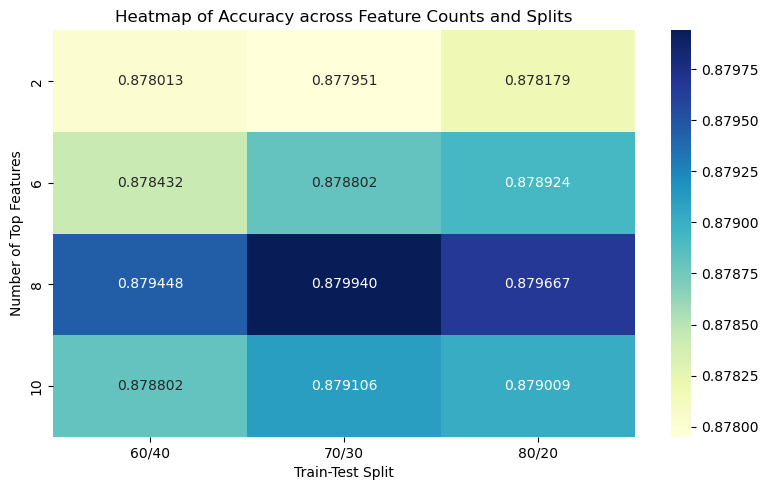

In [291]:
#heatmap plot for accuracy by feature count and Train-Test split
heatmap_data = pd.DataFrame({
    '60/40': acc_6040,
    '70/30': acc_7030,
    '80/20': acc_8020
}, index=feature_counts)

plt.figure(figsize=(8, 5))
sbn.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.6f')
plt.title('Heatmap of Accuracy across Feature Counts and Splits')
plt.xlabel('Train-Test Split')
plt.ylabel('Number of Top Features')
plt.tight_layout()
plt.show()

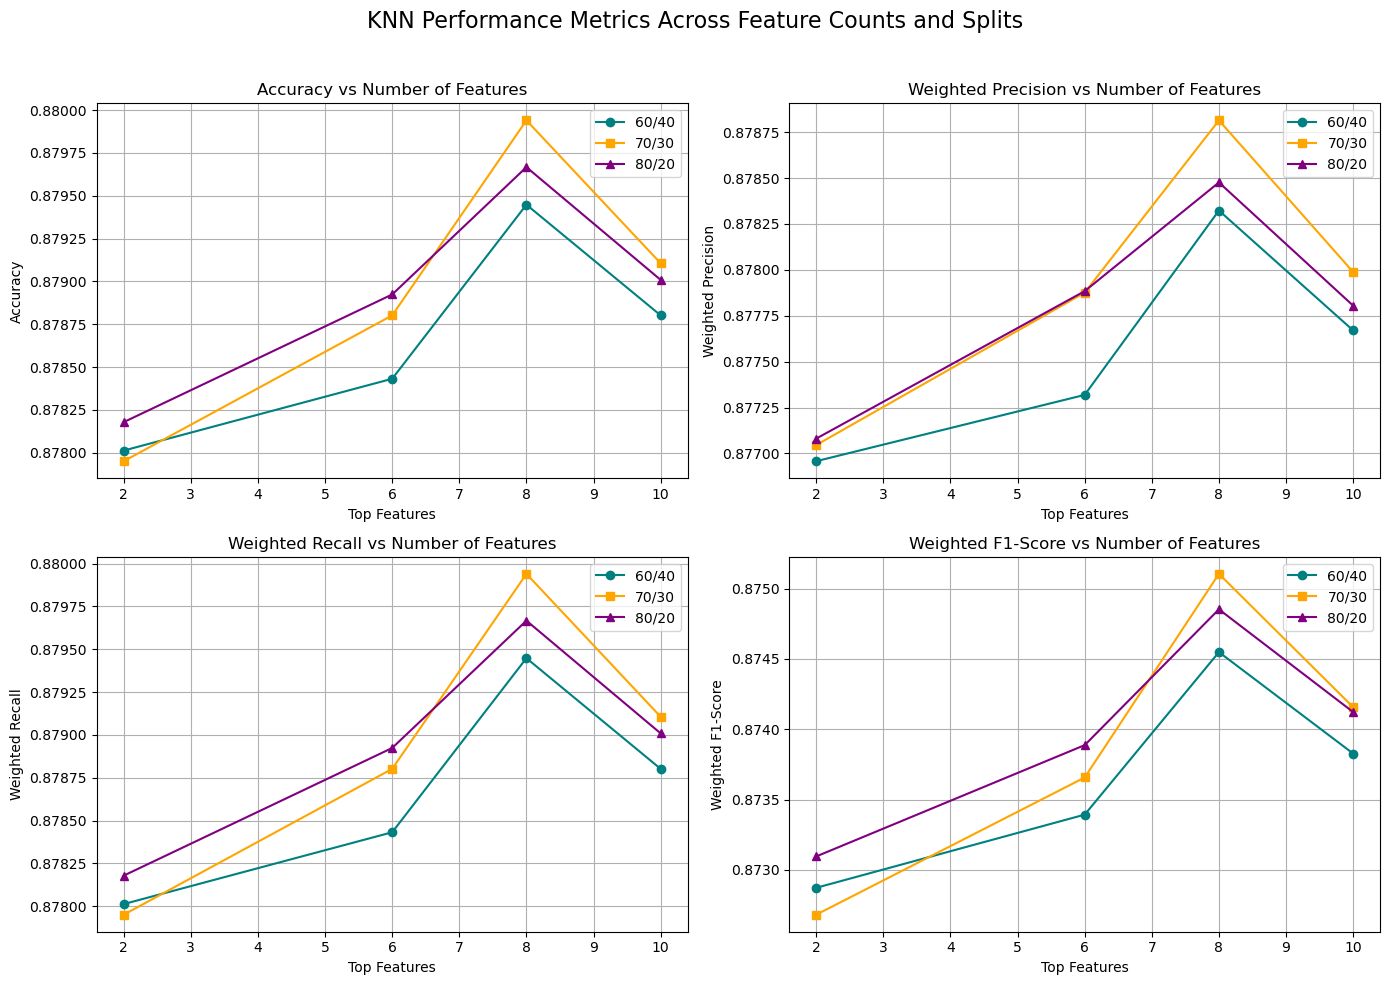

In [285]:
#X-axis values
feature_counts = [2, 6, 8, 10]

#metric values for all splits from the above defined dictionary
accuracy_6040 = [metrics_knn_split6040_feat2['Accuracy'], metrics_knn_split6040_feat6['Accuracy'],
                 metrics_knn_split6040_feat8['Accuracy'], metrics_knn_split6040_feat10['Accuracy']]
accuracy_7030 = [metrics_knn_split7030_feat2['Accuracy'], metrics_knn_split7030_feat6['Accuracy'],
                 metrics_knn_split7030_feat8['Accuracy'], metrics_knn_split7030_feat10['Accuracy']]
accuracy_8020 = [metrics_knn_split8020_feat2['Accuracy'], metrics_knn_split8020_feat6['Accuracy'],
                 metrics_knn_split8020_feat8['Accuracy'], metrics_knn_split8020_feat10['Accuracy']]

precision_6040 = [metrics_knn_split6040_feat2['Weighted_Precision'], metrics_knn_split6040_feat6['Weighted_Precision'],
                  metrics_knn_split6040_feat8['Weighted_Precision'], metrics_knn_split6040_feat10['Weighted_Precision']]
precision_7030 = [metrics_knn_split7030_feat2['Weighted_Precision'], metrics_knn_split7030_feat6['Weighted_Precision'],
                  metrics_knn_split7030_feat8['Weighted_Precision'], metrics_knn_split7030_feat10['Weighted_Precision']]
precision_8020 = [metrics_knn_split8020_feat2['Weighted_Precision'], metrics_knn_split8020_feat6['Weighted_Precision'],
                  metrics_knn_split8020_feat8['Weighted_Precision'], metrics_knn_split8020_feat10['Weighted_Precision']]

recall_6040 = [metrics_knn_split6040_feat2['Weighted_Recall'], metrics_knn_split6040_feat6['Weighted_Recall'],
               metrics_knn_split6040_feat8['Weighted_Recall'], metrics_knn_split6040_feat10['Weighted_Recall']]
recall_7030 = [metrics_knn_split7030_feat2['Weighted_Recall'], metrics_knn_split7030_feat6['Weighted_Recall'],
               metrics_knn_split7030_feat8['Weighted_Recall'], metrics_knn_split7030_feat10['Weighted_Recall']]
recall_8020 = [metrics_knn_split8020_feat2['Weighted_Recall'], metrics_knn_split8020_feat6['Weighted_Recall'],
               metrics_knn_split8020_feat8['Weighted_Recall'], metrics_knn_split8020_feat10['Weighted_Recall']]

f1_6040 = [metrics_knn_split6040_feat2['Weighted_F1'], metrics_knn_split6040_feat6['Weighted_F1'],
           metrics_knn_split6040_feat8['Weighted_F1'], metrics_knn_split6040_feat10['Weighted_F1']]
f1_7030 = [metrics_knn_split7030_feat2['Weighted_F1'], metrics_knn_split7030_feat6['Weighted_F1'],
           metrics_knn_split7030_feat8['Weighted_F1'], metrics_knn_split7030_feat10['Weighted_F1']]
f1_8020 = [metrics_knn_split8020_feat2['Weighted_F1'], metrics_knn_split8020_feat6['Weighted_F1'],
           metrics_knn_split8020_feat8['Weighted_F1'], metrics_knn_split8020_feat10['Weighted_F1']]

#plotting in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

#accuracy plot
axs[0, 0].plot(feature_counts, accuracy_6040, marker='o', label='60/40', color='teal')
axs[0, 0].plot(feature_counts, accuracy_7030, marker='s', label='70/30', color='orange')
axs[0, 0].plot(feature_counts, accuracy_8020, marker='^', label='80/20', color='purple')
axs[0, 0].set_title('Accuracy vs Number of Features')
axs[0, 0].set_xlabel('Top Features')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()
axs[0, 0].grid(True)

#precision plot
axs[0, 1].plot(feature_counts, precision_6040, marker='o', label='60/40', color='teal')
axs[0, 1].plot(feature_counts, precision_7030, marker='s', label='70/30', color='orange')
axs[0, 1].plot(feature_counts, precision_8020, marker='^', label='80/20', color='purple')
axs[0, 1].set_title('Weighted Precision vs Number of Features')
axs[0, 1].set_xlabel('Top Features')
axs[0, 1].set_ylabel('Weighted Precision')
axs[0, 1].legend()
axs[0, 1].grid(True)

#recall plot
axs[1, 0].plot(feature_counts, recall_6040, marker='o', label='60/40', color='teal')
axs[1, 0].plot(feature_counts, recall_7030, marker='s', label='70/30', color='orange')
axs[1, 0].plot(feature_counts, recall_8020, marker='^', label='80/20', color='purple')
axs[1, 0].set_title('Weighted Recall vs Number of Features')
axs[1, 0].set_xlabel('Top Features')
axs[1, 0].set_ylabel('Weighted Recall')
axs[1, 0].legend()
axs[1, 0].grid(True)

#F1 plot
axs[1, 1].plot(feature_counts, f1_6040, marker='o', label='60/40', color='teal')
axs[1, 1].plot(feature_counts, f1_7030, marker='s', label='70/30', color='orange')
axs[1, 1].plot(feature_counts, f1_8020, marker='^', label='80/20', color='purple')
axs[1, 1].set_title('Weighted F1-Score vs Number of Features')
axs[1, 1].set_xlabel('Top Features')
axs[1, 1].set_ylabel('Weighted F1-Score')
axs[1, 1].legend()
axs[1, 1].grid(True)

#adjusting layout
plt.suptitle('KNN Performance Metrics Across Feature Counts and Splits', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 6.2 SVM

In [293]:
metrics_svm_split6040_feat6 = {
    "Confusion Matrix": [[1506670, 346447], [266803, 457521]],
    "Accuracy": 0.762070,
    "Weighted_Precision": 0.770737,
    "Weighted_Recall": 0.762070,
    "Weighted_F1": 0.765657,
    "Best_C": 0.1
}
metrics_svm_split6040_feat8 = {
    "Confusion Matrix": [[1446111, 407006], [263012, 461312]],
    "Accuracy": 0.740045,
    "Weighted_Precision": 0.757635,
    "Weighted_Recall": 0.740045,
    "Weighted_F1": 0.746432,
    "Best_C": 0.1
}
metrics_svm_split6040_feat10 = {
    "Confusion Matrix": [[1445725, 407392], [262961, 461363]],
    "Accuracy": 0.739915,
    "Weighted_Precision": 0.757569,
    "Weighted_Recall": 0.739915,
    "Weighted_F1": 0.746432,
    "Best_C": 0.1
}


metrics_svm_split7030_feat6 = {
    "Confusion Matrix": [[1130267, 259458], [200500, 342856]],
    "Accuracy":  0.762060,
    "Weighted_Precision": 0.770603,
    "Weighted_Recall": 0.762060,
    "Weighted_F1": 0.765604,
    "Best_C": 0.1
}
metrics_svm_split7030_feat8 = {
    "Confusion Matrix": [[1084076, 305649], [197637, 345719]],
    "Accuracy": 0.739646,
    "Weighted_Precision": 0.757249,
    "Weighted_Recall": 0.739646,
    "Weighted_F1": 0.746151,
    "Best_C": 0.1
}
metrics_svm_split7030_feat10 = {
    "Confusion Matrix": [[1083843, 305882], [197619, 345737]],
    "Accuracy": 0.739534,
    "Weighted_Precision": 0.757188,
    "Weighted_Recall": 0.739534,
    "Weighted_F1": 0.746055,
    "Best_C": 10.0
}


metrics_svm_split8020_feat6 = {
    "Confusion Matrix": [[752941, 173495], [133621, 228664]],
    "Accuracy": 0.761689,
    "Weighted_Precision": 0.770374,
    "Weighted_Recall": 0.761689,
    "Weighted_F1": 0.765284,
    "Best_C": 0.01
}
metrics_svm_split8020_feat8 = {
    "Confusion Matrix": [[721811, 204625], [131812, 230473]],
    "Accuracy": 0.738937,
    "Weighted_Precision": 0.756785,
    "Weighted_Recall": 0.738937,
    "Weighted_F1": 0.745517,
    "Best_C": 1.0
}
metrics_svm_split8020_feat10 = {
    "Confusion Matrix": [[721638, 204798], [131787, 230498]],
    "Accuracy": 0.738822,
    "Weighted_Precision": 0.756728,
    "Weighted_Recall": 0.738822,
    "Weighted_F1": 0.754420,
    "Best_C": 0.1
}

model_svm_df = pd.DataFrame({
    "Top 6 features of 60/40 split": metrics_svm_split6040_feat6,
    "Top 8 features of 60/40 split": metrics_svm_split6040_feat8,
    "Top 10 features of 60/40 split": metrics_svm_split6040_feat10,
    "Top 6 features of 70/30 split": metrics_svm_split7030_feat6,
    "Top 8 features of 70/30 split": metrics_svm_split7030_feat8,
    "Top 10 features of 70/30 split": metrics_svm_split7030_feat10,
    "Top 6 features of 80/20 split": metrics_svm_split8020_feat6,
    "Top 8 features of 80/20 split": metrics_svm_split8020_feat8,
    "Top 10 features of 80/20 split": metrics_svm_split8020_feat10
})
print("--- SVM Model Summary ---")
print(model_svm_df)

--- SVM Model Summary ---
                            Top 6 features of 60/40 split  \
Confusion Matrix    [[1506670, 346447], [266803, 457521]]   
Accuracy                                          0.76207   
Weighted_Precision                               0.770737   
Weighted_Recall                                   0.76207   
Weighted_F1                                      0.765657   
Best_C                                                0.1   

                            Top 8 features of 60/40 split  \
Confusion Matrix    [[1446111, 407006], [263012, 461312]]   
Accuracy                                         0.740045   
Weighted_Precision                               0.757635   
Weighted_Recall                                  0.740045   
Weighted_F1                                      0.746432   
Best_C                                                0.1   

                           Top 10 features of 60/40 split  \
Confusion Matrix    [[1445725, 407392], [262961, 461363]]

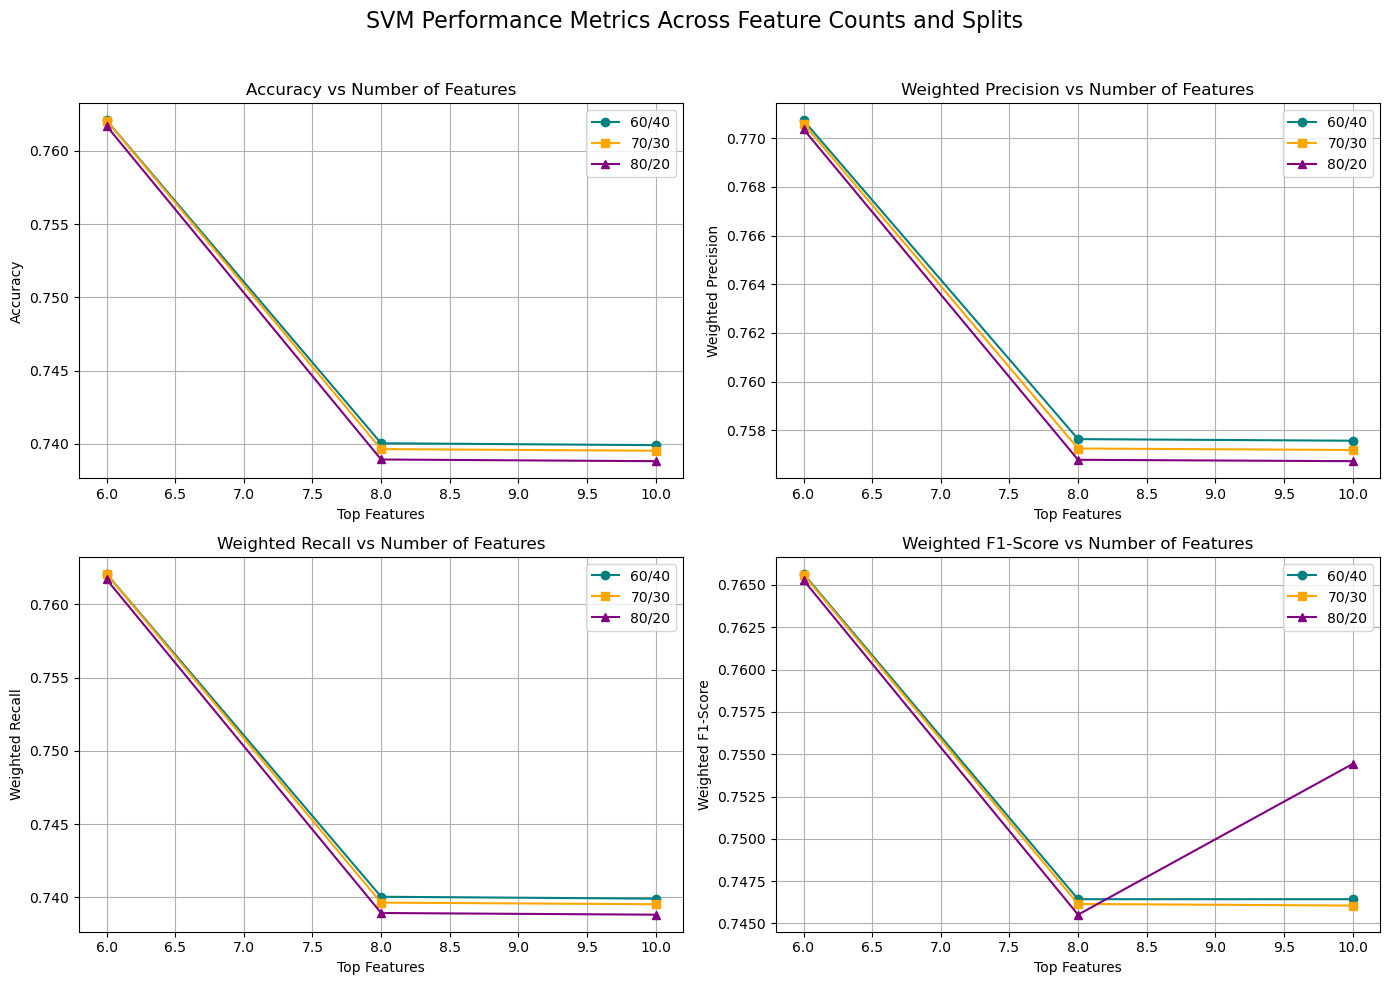

In [295]:
#X-axis values
feature_counts = [6, 8, 10]

#metric values for all splits from the above defined dictionary
accuracy_6040 = [metrics_svm_split6040_feat6['Accuracy'], metrics_svm_split6040_feat8['Accuracy'], metrics_svm_split6040_feat10['Accuracy']]
accuracy_7030 = [metrics_svm_split7030_feat6['Accuracy'], metrics_svm_split7030_feat8['Accuracy'], metrics_svm_split7030_feat10['Accuracy']]
accuracy_8020 = [metrics_svm_split8020_feat6['Accuracy'], metrics_svm_split8020_feat8['Accuracy'], metrics_svm_split8020_feat10['Accuracy']]

precision_6040 = [metrics_svm_split6040_feat6['Weighted_Precision'], metrics_svm_split6040_feat8['Weighted_Precision'], metrics_svm_split6040_feat10['Weighted_Precision']]
precision_7030 = [metrics_svm_split7030_feat6['Weighted_Precision'], metrics_svm_split7030_feat8['Weighted_Precision'], metrics_svm_split7030_feat10['Weighted_Precision']]
precision_8020 = [metrics_svm_split8020_feat6['Weighted_Precision'], metrics_svm_split8020_feat8['Weighted_Precision'], metrics_svm_split8020_feat10['Weighted_Precision']]

recall_6040 = [metrics_svm_split6040_feat6['Weighted_Recall'], metrics_svm_split6040_feat8['Weighted_Recall'], metrics_svm_split6040_feat10['Weighted_Recall']]
recall_7030 = [metrics_svm_split7030_feat6['Weighted_Recall'], metrics_svm_split7030_feat8['Weighted_Recall'], metrics_svm_split7030_feat10['Weighted_Recall']]
recall_8020 = [metrics_svm_split8020_feat6['Weighted_Recall'], metrics_svm_split8020_feat8['Weighted_Recall'], metrics_svm_split8020_feat10['Weighted_Recall']]

f1_6040 = [metrics_svm_split6040_feat6['Weighted_F1'], metrics_svm_split6040_feat8['Weighted_F1'], metrics_svm_split6040_feat10['Weighted_F1']]
f1_7030 = [metrics_svm_split7030_feat6['Weighted_F1'], metrics_svm_split7030_feat8['Weighted_F1'], metrics_svm_split7030_feat10['Weighted_F1']]
f1_8020 = [metrics_svm_split8020_feat6['Weighted_F1'], metrics_svm_split8020_feat8['Weighted_F1'], metrics_svm_split8020_feat10['Weighted_F1']]

#plotting in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

#accuracy plot
axs[0, 0].plot(feature_counts, accuracy_6040, marker='o', label='60/40', color='teal')
axs[0, 0].plot(feature_counts, accuracy_7030, marker='s', label='70/30', color='orange')
axs[0, 0].plot(feature_counts, accuracy_8020, marker='^', label='80/20', color='purple')
axs[0, 0].set_title('Accuracy vs Number of Features')
axs[0, 0].set_xlabel('Top Features')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()
axs[0, 0].grid(True)

#precision plot
axs[0, 1].plot(feature_counts, precision_6040, marker='o', label='60/40', color='teal')
axs[0, 1].plot(feature_counts, precision_7030, marker='s', label='70/30', color='orange')
axs[0, 1].plot(feature_counts, precision_8020, marker='^', label='80/20', color='purple')
axs[0, 1].set_title('Weighted Precision vs Number of Features')
axs[0, 1].set_xlabel('Top Features')
axs[0, 1].set_ylabel('Weighted Precision')
axs[0, 1].legend()
axs[0, 1].grid(True)

#recall plot
axs[1, 0].plot(feature_counts, recall_6040, marker='o', label='60/40', color='teal')
axs[1, 0].plot(feature_counts, recall_7030, marker='s', label='70/30', color='orange')
axs[1, 0].plot(feature_counts, recall_8020, marker='^', label='80/20', color='purple')
axs[1, 0].set_title('Weighted Recall vs Number of Features')
axs[1, 0].set_xlabel('Top Features')
axs[1, 0].set_ylabel('Weighted Recall')
axs[1, 0].legend()
axs[1, 0].grid(True)

#F1 plot
axs[1, 1].plot(feature_counts, f1_6040, marker='o', label='60/40', color='teal')
axs[1, 1].plot(feature_counts, f1_7030, marker='s', label='70/30', color='orange')
axs[1, 1].plot(feature_counts, f1_8020, marker='^', label='80/20', color='purple')
axs[1, 1].set_title('Weighted F1-Score vs Number of Features')
axs[1, 1].set_xlabel('Top Features')
axs[1, 1].set_ylabel('Weighted F1-Score')
axs[1, 1].legend()
axs[1, 1].grid(True)

#adjusting layout
plt.suptitle('SVM Performance Metrics Across Feature Counts and Splits', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

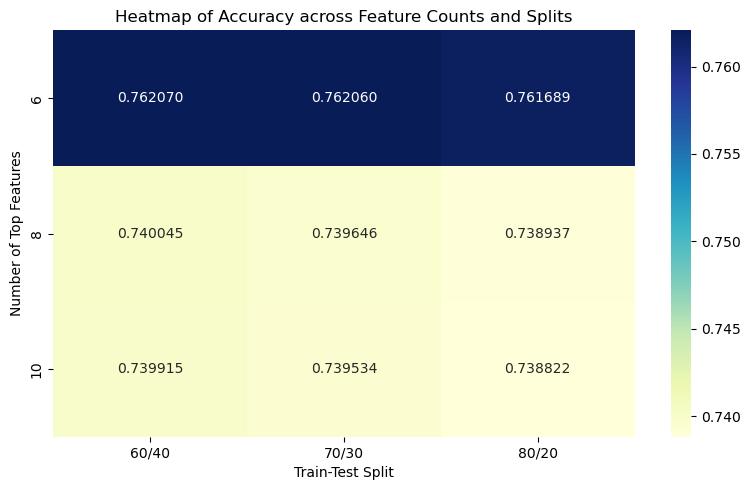

In [297]:
#heatmap plot for accuracy by feature count and Train-Test split
heatmap_data = pd.DataFrame({
    '60/40': accuracy_6040,
    '70/30': accuracy_7030,
    '80/20': accuracy_8020
}, index=feature_counts)

plt.figure(figsize=(8, 5))
sbn.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.6f')
plt.title('Heatmap of Accuracy across Feature Counts and Splits')
plt.xlabel('Train-Test Split')
plt.ylabel('Number of Top Features')
plt.tight_layout()
plt.show()

### 6.3 Decision Tree

In [305]:
metrics_dt_split6040_feat6 = {
    "Confusion Matrix": [[1791842, 60846], [249276, 475477]],
    "Accuracy": 0.879678,
    "Weighted_Precision": 0.880313,
    "Weighted_Recall": 0.879678,
    "Weighted_F1": 0.8736,
    "Best_Depth": 10
}
metrics_dt_split6040_feat8 = {
    "Confusion Matrix": [[1795923, 56765], [250614, 474139]],
    "Accuracy": 0.880743,
    "Weighted_Precision": 0.881911,
    "Weighted_Recall": 0.880743,
    "Weighted_F1": 0.874501,
    "Best_Depth": 10
}
metrics_dt_split6040_feat10 = {
    "Confusion Matrix": [[1795712, 56976], [249589, 475164]],
    "Accuracy": 0.881058,
    "Weighted_Precision": 0.882176,
    "Weighted_Recall": 0.881058,
    "Weighted_F1": 0.874883,
    "Best_Depth": 10
}


metrics_dt_split7030_feat6 = {
    "Confusion Matrix": [[1342869, 46647], [186460, 357105]],
    "Accuracy":  0.879412,
    "Weighted_Precision": 0.879874,
    "Weighted_Recall": 0.879412,
    "Weighted_F1": 0.873401,
    "Best_Depth": 10
}
metrics_dt_split7030_feat8 = {
    "Confusion Matrix": [[1343525, 45991], [185295, 358270]],
    "Accuracy": 0.880354,
    "Weighted_Precision": 0.88089,
    "Weighted_Recall": 0.880354,
    "Weighted_F1": 0.874417,
    "Best_Depth": 10
}
metrics_dt_split7030_feat10 = {
    "Confusion Matrix": [[1346269, 43247], [187281, 356284]],
    "Accuracy": 0.880746,
    "Weighted_Precision": 0.88178,
    "Weighted_Recall": 0.880746,
    "Weighted_F1": 0.874577,
    "Best_Depth": 10
}


metrics_dt_split8020_feat6 = {
    "Confusion Matrix": [[895213, 31131], [124136, 238241]],
    "Accuracy": 0.879519,
    "Weighted_Precision": 0.879967,
    "Weighted_Recall": 0.879619,
    "Weighted_F1": 0.87353,
    "Best_Depth": 10
}
metrics_dt_split8020_feat8 = {
    "Confusion Matrix": [[895552, 30792], [123385, 238992]],
    "Accuracy": 0.880364,
    "Weighted_Precision": 0.880864,
    "Weighted_Recall": 0.880364,
    "Weighted_F1": 0.87445,
    "Best_Depth": 10
}
metrics_dt_split8020_feat10 = {
    "Confusion Matrix": [[897568, 28776], [124850, 237527]],
    "Accuracy": 0.880792,
    "Weighted_Precision": 0.88184,
    "Weighted_Recall": 0.880792,
    "Weighted_F1": 0.874622,
    "Best_Depth": 10
}

model_dt_df = pd.DataFrame({
    "Top 6 features of 60/40 split": metrics_dt_split6040_feat6,
    "Top 8 features of 60/40 split": metrics_dt_split6040_feat8,
    "Top 10 features of 60/40 split": metrics_dt_split6040_feat10,
    "Top 6 features of 70/30 split": metrics_dt_split7030_feat6,
    "Top 8 features of 70/30 split": metrics_dt_split7030_feat8,
    "Top 10 features of 70/30 split": metrics_dt_split7030_feat10,
    "Top 6 features of 80/20 split": metrics_dt_split8020_feat6,
    "Top 8 features of 80/20 split": metrics_dt_split8020_feat8,
    "Top 10 features of 80/20 split": metrics_dt_split8020_feat10
})
print("--- Decision Tree Model Summary ---")
print(model_dt_df)

--- Decision Tree Model Summary ---
                           Top 6 features of 60/40 split  \
Confusion Matrix    [[1791842, 60846], [249276, 475477]]   
Accuracy                                        0.879678   
Weighted_Precision                              0.880313   
Weighted_Recall                                 0.879678   
Weighted_F1                                       0.8736   
Best_Depth                                            10   

                           Top 8 features of 60/40 split  \
Confusion Matrix    [[1795923, 56765], [250614, 474139]]   
Accuracy                                        0.880743   
Weighted_Precision                              0.881911   
Weighted_Recall                                 0.880743   
Weighted_F1                                     0.874501   
Best_Depth                                            10   

                          Top 10 features of 60/40 split  \
Confusion Matrix    [[1795712, 56976], [249589, 475164]]   
Ac

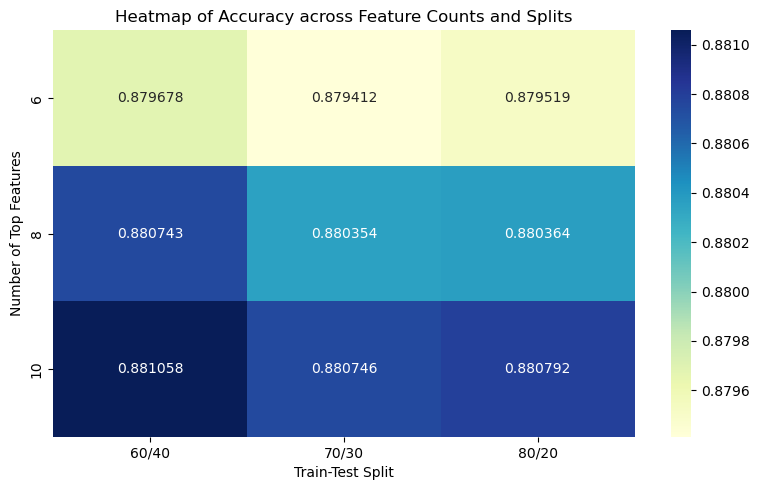

In [307]:
#heatmap plot for accuracy by feature count and Train-Test split
heatmap_data = pd.DataFrame({
    '60/40': accuracy_6040,
    '70/30': accuracy_7030,
    '80/20': accuracy_8020
}, index=feature_counts)

plt.figure(figsize=(8, 5))
sbn.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.6f')
plt.title('Heatmap of Accuracy across Feature Counts and Splits')
plt.xlabel('Train-Test Split')
plt.ylabel('Number of Top Features')
plt.tight_layout()
plt.show()

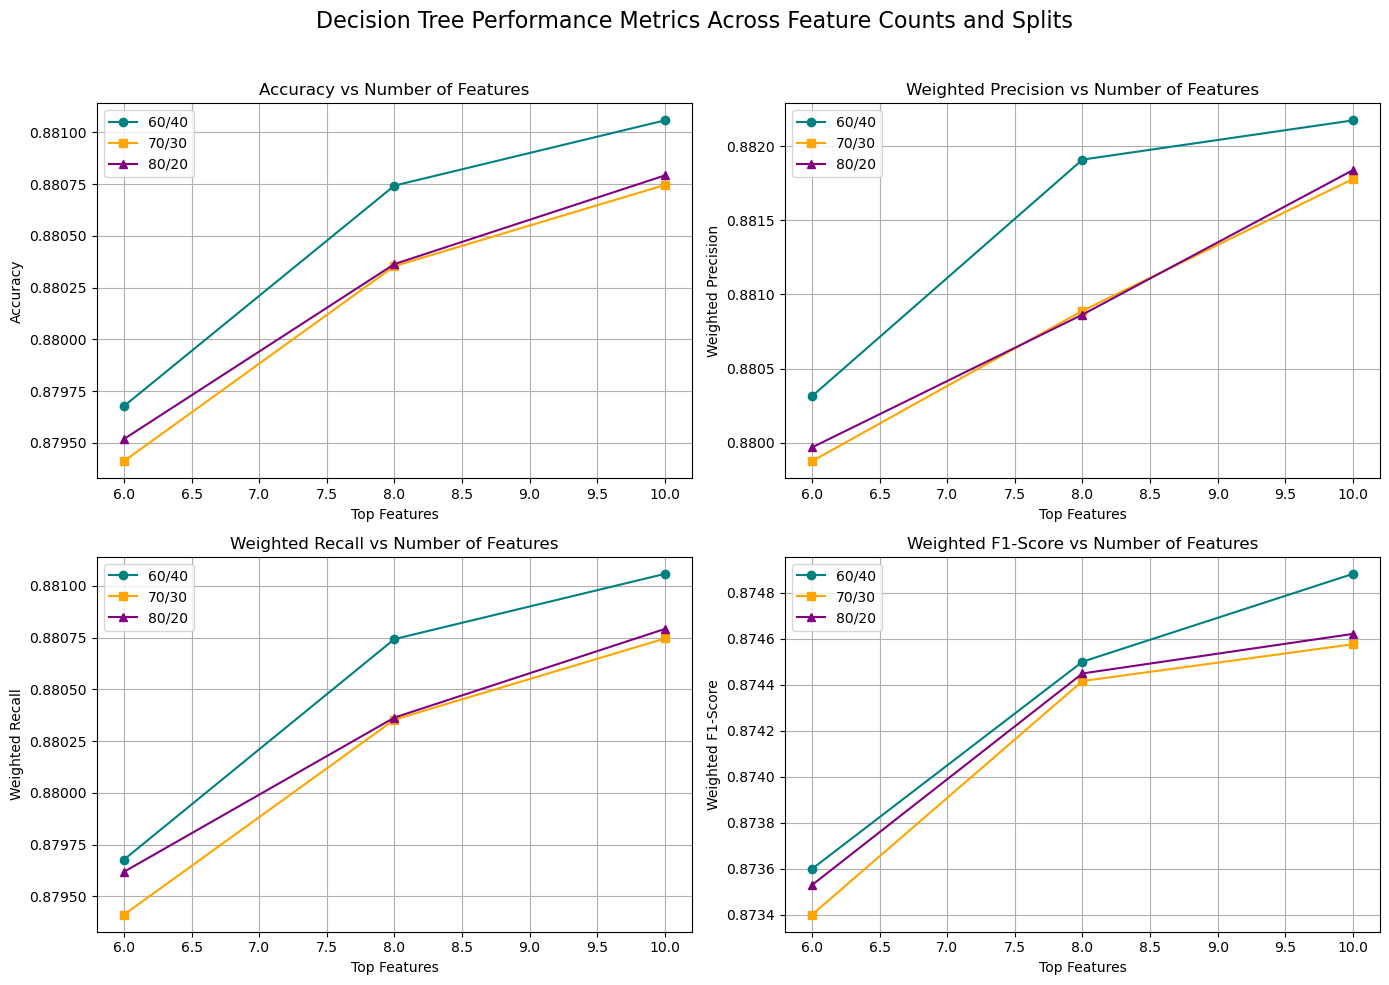

In [303]:
#X-axis values
feature_counts = [6, 8, 10]

#metric values for all splits from the above defined dictionary
accuracy_6040 = [metrics_dt_split6040_feat6['Accuracy'], metrics_dt_split6040_feat8['Accuracy'], metrics_dt_split6040_feat10['Accuracy']]
accuracy_7030 = [metrics_dt_split7030_feat6['Accuracy'], metrics_dt_split7030_feat8['Accuracy'], metrics_dt_split7030_feat10['Accuracy']]
accuracy_8020 = [metrics_dt_split8020_feat6['Accuracy'], metrics_dt_split8020_feat8['Accuracy'], metrics_dt_split8020_feat10['Accuracy']]

precision_6040 = [metrics_dt_split6040_feat6['Weighted_Precision'], metrics_dt_split6040_feat8['Weighted_Precision'], metrics_dt_split6040_feat10['Weighted_Precision']]
precision_7030 = [metrics_dt_split7030_feat6['Weighted_Precision'], metrics_dt_split7030_feat8['Weighted_Precision'], metrics_dt_split7030_feat10['Weighted_Precision']]
precision_8020 = [metrics_dt_split8020_feat6['Weighted_Precision'], metrics_dt_split8020_feat8['Weighted_Precision'], metrics_dt_split8020_feat10['Weighted_Precision']]

recall_6040 = [metrics_dt_split6040_feat6['Weighted_Recall'], metrics_dt_split6040_feat8['Weighted_Recall'], metrics_dt_split6040_feat10['Weighted_Recall']]
recall_7030 = [metrics_dt_split7030_feat6['Weighted_Recall'], metrics_dt_split7030_feat8['Weighted_Recall'], metrics_dt_split7030_feat10['Weighted_Recall']]
recall_8020 = [metrics_dt_split8020_feat6['Weighted_Recall'], metrics_dt_split8020_feat8['Weighted_Recall'], metrics_dt_split8020_feat10['Weighted_Recall']]

f1_6040 = [metrics_dt_split6040_feat6['Weighted_F1'], metrics_dt_split6040_feat8['Weighted_F1'], metrics_dt_split6040_feat10['Weighted_F1']]
f1_7030 = [metrics_dt_split7030_feat6['Weighted_F1'], metrics_dt_split7030_feat8['Weighted_F1'], metrics_dt_split7030_feat10['Weighted_F1']]
f1_8020 = [metrics_dt_split8020_feat6['Weighted_F1'], metrics_dt_split8020_feat8['Weighted_F1'], metrics_dt_split8020_feat10['Weighted_F1']]

#plotting in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

#accuracy plot
axs[0, 0].plot(feature_counts, accuracy_6040, marker='o', label='60/40', color='teal')
axs[0, 0].plot(feature_counts, accuracy_7030, marker='s', label='70/30', color='orange')
axs[0, 0].plot(feature_counts, accuracy_8020, marker='^', label='80/20', color='purple')
axs[0, 0].set_title('Accuracy vs Number of Features')
axs[0, 0].set_xlabel('Top Features')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()
axs[0, 0].grid(True)

#precision plot
axs[0, 1].plot(feature_counts, precision_6040, marker='o', label='60/40', color='teal')
axs[0, 1].plot(feature_counts, precision_7030, marker='s', label='70/30', color='orange')
axs[0, 1].plot(feature_counts, precision_8020, marker='^', label='80/20', color='purple')
axs[0, 1].set_title('Weighted Precision vs Number of Features')
axs[0, 1].set_xlabel('Top Features')
axs[0, 1].set_ylabel('Weighted Precision')
axs[0, 1].legend()
axs[0, 1].grid(True)

#recall plot
axs[1, 0].plot(feature_counts, recall_6040, marker='o', label='60/40', color='teal')
axs[1, 0].plot(feature_counts, recall_7030, marker='s', label='70/30', color='orange')
axs[1, 0].plot(feature_counts, recall_8020, marker='^', label='80/20', color='purple')
axs[1, 0].set_title('Weighted Recall vs Number of Features')
axs[1, 0].set_xlabel('Top Features')
axs[1, 0].set_ylabel('Weighted Recall')
axs[1, 0].legend()
axs[1, 0].grid(True)

#F1 plot
axs[1, 1].plot(feature_counts, f1_6040, marker='o', label='60/40', color='teal')
axs[1, 1].plot(feature_counts, f1_7030, marker='s', label='70/30', color='orange')
axs[1, 1].plot(feature_counts, f1_8020, marker='^', label='80/20', color='purple')
axs[1, 1].set_title('Weighted F1-Score vs Number of Features')
axs[1, 1].set_xlabel('Top Features')
axs[1, 1].set_ylabel('Weighted F1-Score')
axs[1, 1].legend()
axs[1, 1].grid(True)

#adjusting layout
plt.suptitle('Decision Tree Performance Metrics Across Feature Counts and Splits', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 6.4 Model Comparisons

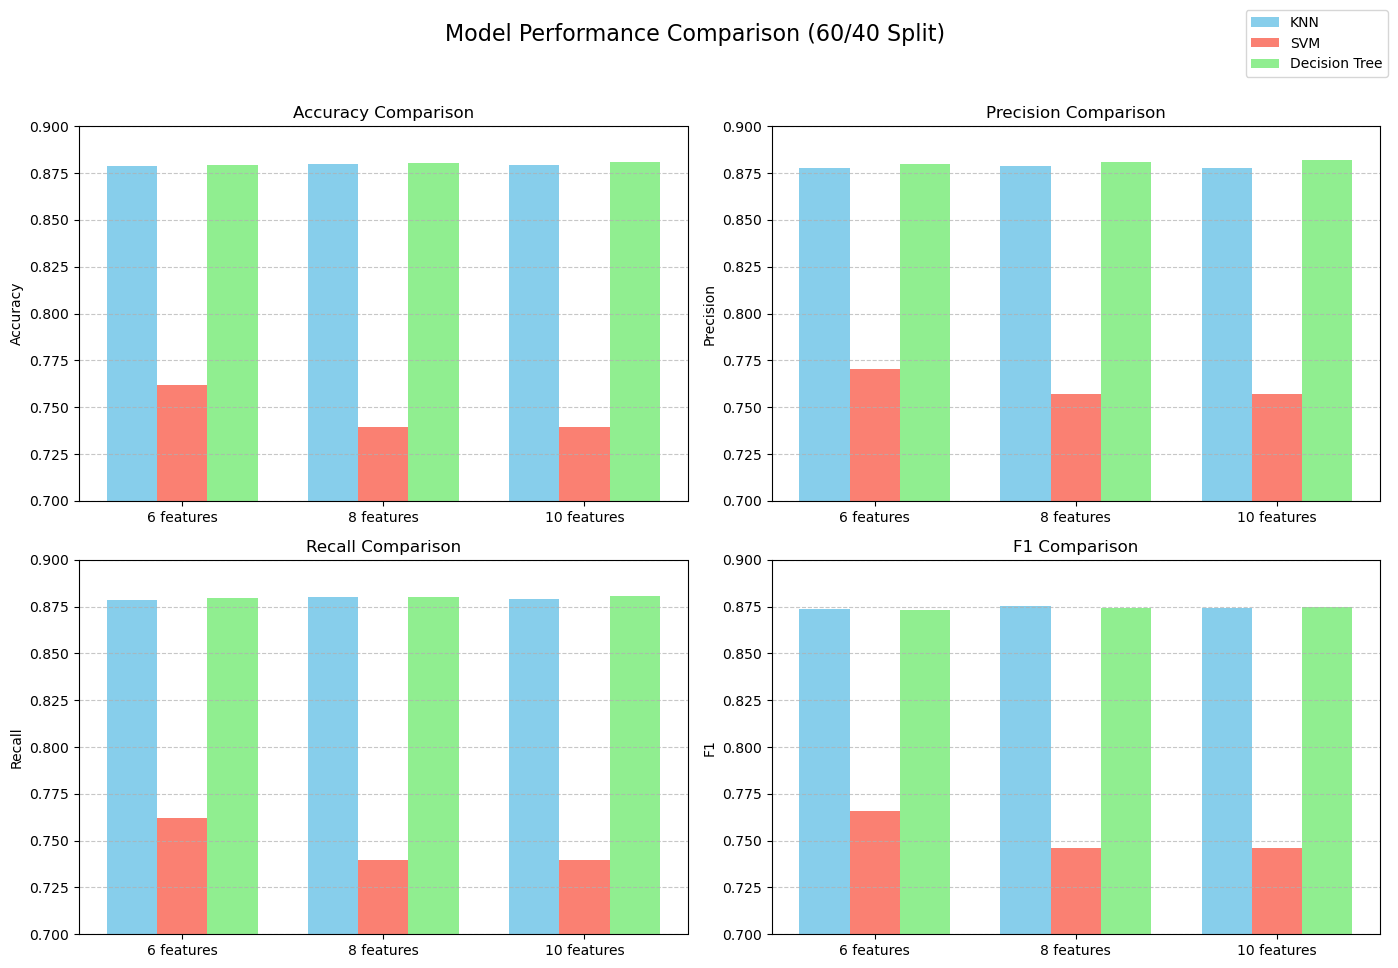

In [331]:
#Graphs to compare metrics of all model across 60/40 split
#feature counts
feature_counts = [6, 8, 10]
x = np.arange(len(feature_counts))
width = 0.25

#model metrics for 60/40 split
knn_metrics_60 = {
    6: {"Accuracy": 0.878734, "Precision": 0.877678, "Recall": 0.878734, "F1": 0.873507},
    8: {"Accuracy": 0.878588, "Precision": 0.877603, "Recall": 0.878588, "F1": 0.873275},
    10: {"Accuracy": 0.878843, "Precision": 0.877799, "Recall": 0.878843, "F1": 0.873603}
}

svm_metrics_60 = {
    6: {"Accuracy": 0.765362, "Precision": 0.773108, "Recall": 0.765362, "F1": 0.768975},
    8: {"Accuracy": 0.740679, "Precision": 0.758170, "Recall": 0.740679, "F1": 0.747093},
    10: {"Accuracy": 0.740899, "Precision": 0.758175, "Recall": 0.740899, "F1": 0.747270}
}

dt_metrics_60 = {
    6: {"Accuracy": 0.879168, "Precision": 0.879463, "Recall": 0.879168, "F1": 0.872989},
    8: {"Accuracy": 0.880070, "Precision": 0.880520, "Recall": 0.880070, "F1": 0.874026},
    10: {"Accuracy": 0.880319, "Precision": 0.881112, "Recall": 0.880319, "F1": 0.874299}
}



metrics = ["Accuracy", "Precision", "Recall", "F1"]
colors = ['skyblue', 'salmon', 'lightgreen']

#set up 2x2 plot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel()

#create each subplot
for i, metric in enumerate(metrics):
    knn_values = [knn_metrics[f][metric] for f in feature_counts]
    svm_values = [svm_metrics[f][metric] for f in feature_counts]
    dt_values = [dt_metrics[f][metric] for f in feature_counts]

    axs[i].bar(x - width, knn_values, width, label='KNN', color=colors[0])
    axs[i].bar(x, svm_values, width, label='SVM', color=colors[1])
    axs[i].bar(x + width, dt_values, width, label='Decision Tree', color=colors[2])

    axs[i].set_xticks(x)
    axs[i].set_xticklabels([f"{f} features" for f in feature_counts])
    axs[i].set_title(f"{metric} Comparison")
    axs[i].set_ylim(0.7, 0.9)
    axs[i].set_ylabel(metric)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

#add legend
fig.legend(
    labels=['KNN', 'SVM', 'Decision Tree'],
    loc='upper right',
    bbox_to_anchor=(1, 1),
    bbox_transform=fig.transFigure
)

fig.suptitle("Model Performance Comparison (60/40 Split)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

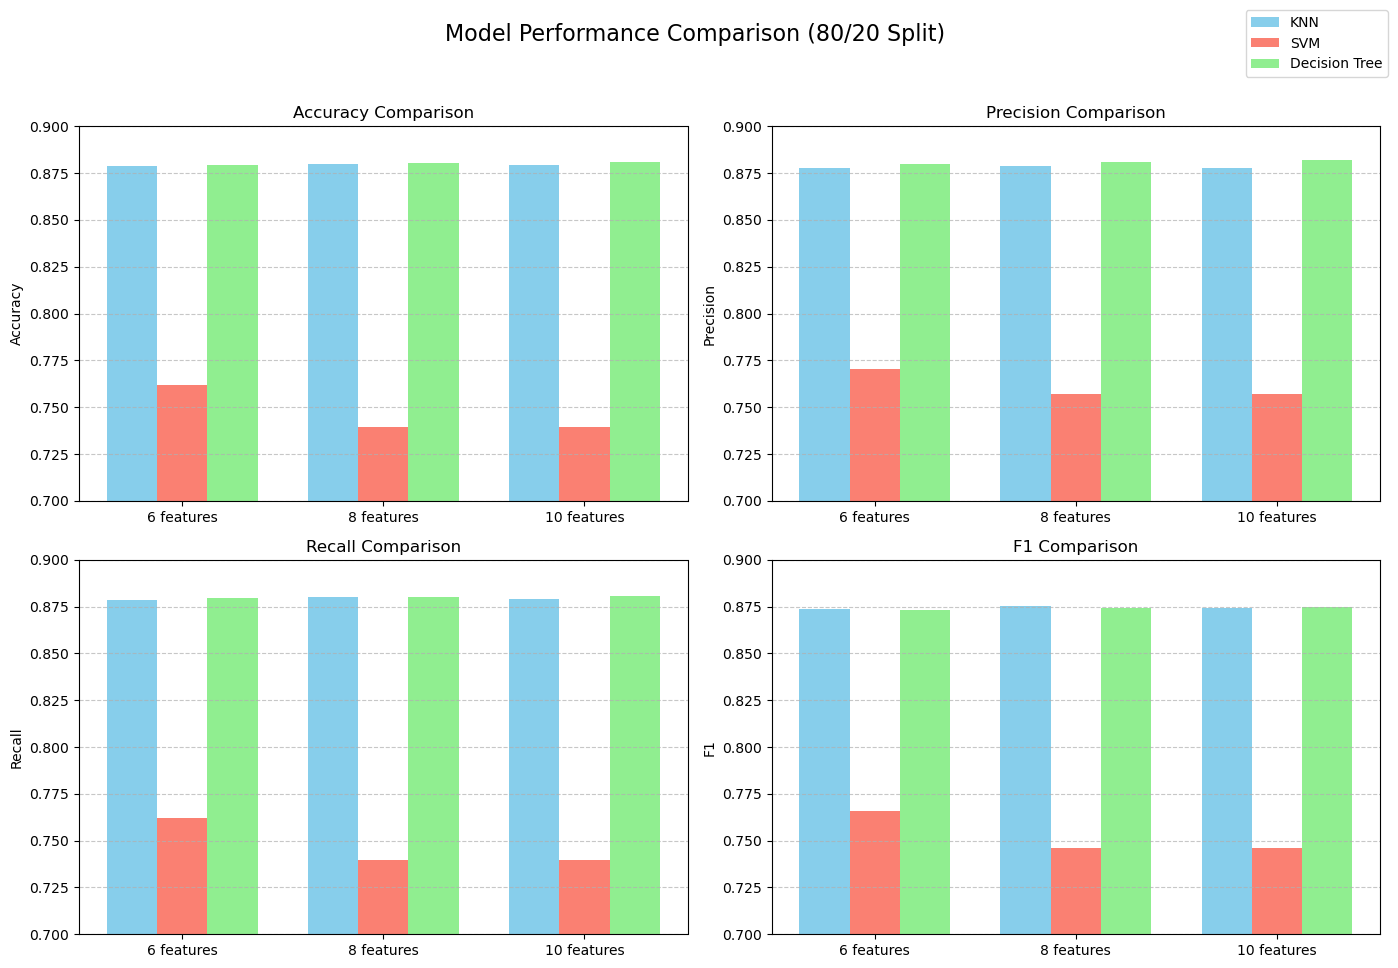

In [325]:
#Graphs to compare metrics of all model across 80/20 split
#feature counts
feature_counts = [6, 8, 10]
x = np.arange(len(feature_counts))
width = 0.25

#model metrics for 80/20 split
knn_metrics_80 = {
    6: {"Accuracy": 0.879289, "Precision": 0.878363, "Recall": 0.879289, "F1": 0.874091},
    8: {"Accuracy": 0.879697, "Precision": 0.878847, "Recall": 0.879697, "F1": 0.874538},
    10: {"Accuracy": 0.879478, "Precision": 0.878666, "Recall": 0.879478, "F1": 0.874327}
}

svm_metrics_80 = {
    6: {"Accuracy": 0.764174, "Precision": 0.772269, "Recall": 0.764174, "F1": 0.767857},
    8: {"Accuracy": 0.741142, "Precision": 0.758425, "Recall": 0.741142, "F1": 0.747436},
    10: {"Accuracy": 0.740658, "Precision": 0.758012, "Recall": 0.740658, "F1": 0.746929}
}

dt_metrics_80 = {
    6: {"Accuracy": 0.879967, "Precision": 0.880327, "Recall": 0.879967, "F1": 0.873711},
    8: {"Accuracy": 0.880571, "Precision": 0.881144, "Recall": 0.880571, "F1": 0.874835},
    10: {"Accuracy": 0.880533, "Precision": 0.881401, "Recall": 0.880533, "F1": 0.874835}
}

metrics = ["Accuracy", "Precision", "Recall", "F1"]
colors = ['skyblue', 'salmon', 'lightgreen']

#set up 2x2 plot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel()

#create each subplot
for i, metric in enumerate(metrics):
    knn_values = [knn_metrics[f][metric] for f in feature_counts]
    svm_values = [svm_metrics[f][metric] for f in feature_counts]
    dt_values = [dt_metrics[f][metric] for f in feature_counts]

    axs[i].bar(x - width, knn_values, width, label='KNN', color=colors[0])
    axs[i].bar(x, svm_values, width, label='SVM', color=colors[1])
    axs[i].bar(x + width, dt_values, width, label='Decision Tree', color=colors[2])

    axs[i].set_xticks(x)
    axs[i].set_xticklabels([f"{f} features" for f in feature_counts])
    axs[i].set_title(f"{metric} Comparison")
    axs[i].set_ylim(0.7, 0.9)
    axs[i].set_ylabel(metric)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

#add legend
fig.legend(
    labels=['KNN', 'SVM', 'Decision Tree'],
    loc='upper right',
    bbox_to_anchor=(1, 1),
    bbox_transform=fig.transFigure
)

fig.suptitle("Model Performance Comparison (80/20 Split)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

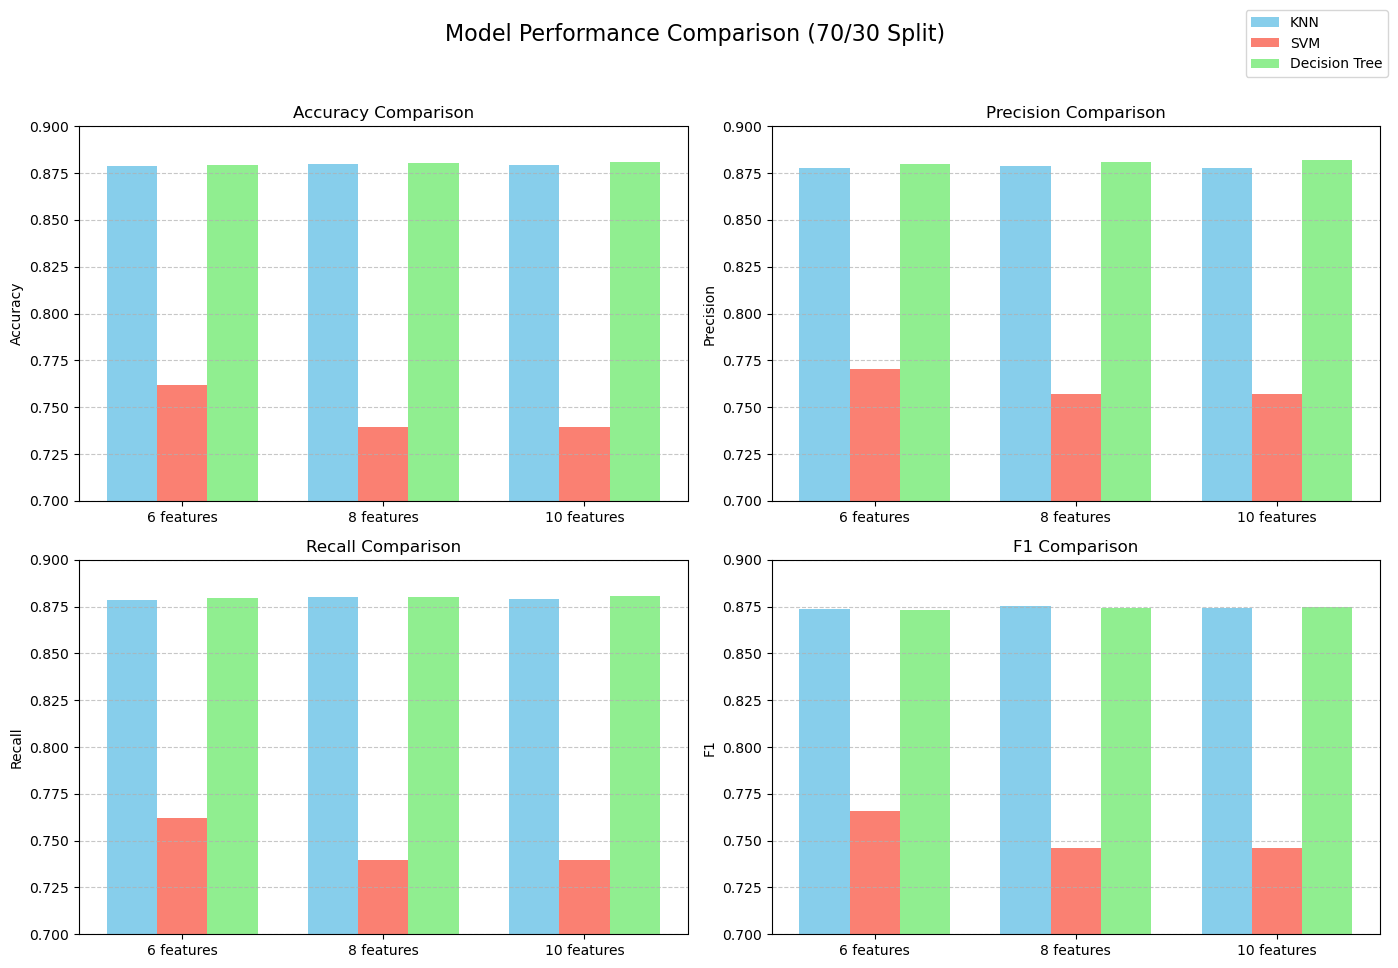

In [327]:
#Graphs to compare metrics of all model across 70/30 split
#feature counts
feature_counts = [6, 8, 10]
x = np.arange(len(feature_counts))
width = 0.25

#model metrics for 70/30 split
knn_metrics = {
    6: {"Accuracy": 0.878802, "Precision": 0.877876, "Recall": 0.878802, "F1": 0.873657},
    8: {"Accuracy": 0.879940, "Precision": 0.878814, "Recall": 0.879940, "F1": 0.875104},
    10: {"Accuracy": 0.879106, "Precision": 0.877988, "Recall": 0.879106, "F1": 0.874157}
}

svm_metrics = {
    6: {"Accuracy": 0.762060, "Precision": 0.770603, "Recall": 0.762060, "F1": 0.765604},
    8: {"Accuracy": 0.739646, "Precision": 0.757249, "Recall": 0.739646, "F1": 0.746151},
    10: {"Accuracy": 0.739534, "Precision": 0.757188, "Recall": 0.739534, "F1": 0.746055}
}

dt_metrics = {
    6: {"Accuracy": 0.879412, "Precision": 0.879874, "Recall": 0.879412, "F1": 0.873401},
    8: {"Accuracy": 0.880354, "Precision": 0.880890, "Recall": 0.880354, "F1": 0.874417},
    10: {"Accuracy": 0.880746, "Precision": 0.881780, "Recall": 0.880746, "F1": 0.874577}
}

metrics = ["Accuracy", "Precision", "Recall", "F1"]
colors = ['skyblue', 'salmon', 'lightgreen']

#set up 2x2 plot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel()

#create each subplot
for i, metric in enumerate(metrics):
    knn_values = [knn_metrics[f][metric] for f in feature_counts]
    svm_values = [svm_metrics[f][metric] for f in feature_counts]
    dt_values = [dt_metrics[f][metric] for f in feature_counts]

    axs[i].bar(x - width, knn_values, width, label='KNN', color=colors[0])
    axs[i].bar(x, svm_values, width, label='SVM', color=colors[1])
    axs[i].bar(x + width, dt_values, width, label='Decision Tree', color=colors[2])

    axs[i].set_xticks(x)
    axs[i].set_xticklabels([f"{f} features" for f in feature_counts])
    axs[i].set_title(f"{metric} Comparison")
    axs[i].set_ylim(0.7, 0.9)
    axs[i].set_ylabel(metric)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

#add legend
fig.legend(
    labels=['KNN', 'SVM', 'Decision Tree'],
    loc='upper right',
    bbox_to_anchor=(1, 1),
    bbox_transform=fig.transFigure
)

fig.suptitle("Model Performance Comparison (70/30 Split)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 6.5 Recommendation

**Retrain Champion model**

In [139]:
# 1. Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

top_10_features = ['BLOCK', 'IUCR', 'FBI_CODE', 'DESCRIPTION', 'BEAT',
                    'PRIMARY_TYPE', 'LOCATION_DESCRIPTION', 'DOMESTIC', 'WARD', 'DISTRICT']  
target = 'ARREST' 

X = df[top_10_features]
y = df[target]

# 3. Split the data (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)

# 4. Retrain the Decision Tree with best depth (depth=10)
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# 5. Make predictions and evaluate
y_pred = clf.predict(X_test)

# 6. Display results
print("📌 Retrained Champion Model Evaluation")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Weighted Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Weighted Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Weighted F1 Score:", f1_score(y_test, y_pred, average='weighted'))


📌 Retrained Champion Model Evaluation
Confusion Matrix:
 [[1795712   56976]
 [ 249589  475164]]
Accuracy: 0.8810583831016888
Weighted Precision: 0.882176414591368
Weighted Recall: 0.8810583831016888
Weighted F1 Score: 0.874883415140099
